In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import interp
sns.set(style='whitegrid')
from sklearn.metrics import accuracy_score,recall_score, f1_score
import glob
import os
import pathlib
from multi_center_tools.multi_tools import open_pickle, select_df

import scienceplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
def make_score(df):
    df['score'] =df['Proba']
    df.loc[df['Predicted_label']==0, 'score'] = 1 -df['Proba']
    return df

def get_response_score(location):
    f = open(location)
    result = json.load(f)
    return np.array(result['response'])/4

def make_score_with_fold(df, folds):
    for i in range(folds):
        proba_name = 'Proba_fold%d'%i
        score_name = 'Score_fold%d'%i
        label_name = 'Predicted_label_fold%d'%i
        df[score_name] =df[proba_name]
        df.loc[df[label_name]==0, score_name] = 1 -df[proba_name]
    return df

def get_fpr_tpr(label, score):
    y_true =np.array(label)
    y_score =np.array(score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    score = roc_auc_score(y_true, y_score)
    return fpr, tpr, score

### Prepartion dataset

In [3]:
#Load TCGA Result
TCGA_test = pd.read_csv(
    '/Users/satoc/Dropbox/programing/python/HvsAI/make_label/make_dataset_for_clinical/data/TCGA_test_sampled_with_predicted.csv')

#Load JC Result
csv_loc = '/Users/satoc/Dropbox/programing/python/vit_experiment/label_data/All_japan.csv'

test_list = open_pickle(
    '/Users/satoc/Dropbox/programing/python/vit_experiment/label_data/ALL_Japan_test.pickle')
test_list = [int(n) for n in test_list]

df =pd.read_csv(csv_loc)
JC_test= select_df(df,'ID',test_list )

#JC sampled
JC_test_sampled_with_predicted =  pd.read_csv(
    '/Users/satoc/Dropbox/programing/python/HvsAI/make_label/make_dataset_for_clinical/data/JC_test_sampled_with_predicted_list3.csv')

cnn_TCGA_predicted = pd.read_csv(
    '/Users/satoc/Dropbox/programing/python/HvsAI/Lr_ken/TCGA/Predict/BS32_10folds/normal_list1/data/TCGA_predicted.csv')
cnn_JC_test_predicted = pd.read_csv(
    '/Users/satoc/Dropbox/programing/python/HvsAI/Lr_ken/TCGA/Predict/BS32_10folds/normal_list1/data/JC_test_predicted.csv')
cnn_TCGA_merged = pd.merge(TCGA_test, cnn_TCGA_predicted, on='ID')
cnn_JC_test_merged = pd.merge(JC_test, cnn_JC_test_predicted, on='ID')
cnn_JC_test_sampled_merged = pd.merge(JC_test_sampled_with_predicted, cnn_JC_test_predicted, on='ID')

In [4]:
cnn_TCGA_predicted = pd.read_csv(
    '/Users/satoc/Dropbox/programing/python/HvsAI/Lr_ken/TCGA/Predict/BS32_10folds/normal_list1_width3/data/TCGA_predicted.csv')
cnn_JC_test_predicted = pd.read_csv(
    '/Users/satoc/Dropbox/programing/python/HvsAI/Lr_ken/TCGA/Predict/BS32_10folds/normal_list1_width3/data/JC_test_predicted.csv')
cnn_TCGA_merged = pd.merge(TCGA_test, cnn_TCGA_predicted, on='ID')
cnn_JC_test_merged = pd.merge(JC_test, cnn_JC_test_predicted, on='ID')
cnn_JC_test_sampled_merged = pd.merge(JC_test_sampled_with_predicted, cnn_JC_test_predicted, on='ID')

In [5]:
cnn_JC_test_sampled_merged

ID Institute histological_type  age_at_initial_pathologic_diagnosis  \
0   9037       YCU               GBM                                   49   
1  31061       NCC                DA                                   31   
2  31028       NCC                DA                                   72   
3  31006       NCC                OL                                   39   
4  30048       NCC               GBM                                   58   
5   7049        OU                DA                                   38   
6   7014        OU                DA                                   42   
7   3025       SMU                DA                                   21   
8   8068     KNBTG               GBM                                   70   
9  31036       NCC                DA                                   33   

  gender operation   start_day  WHO_grade LGG_or_GBM IDH/TERT  ...  \
0      F       GTR   2010/8/10        4.0        GBM  Group C  ...   
1      F       NaN         NaN        2.0        LGG  Group B  ...   
2      F       NaN         NaN        2.0        LGG  Group C  ...   
3      F       NaN         NaN        2.0        LGG  Group A  ...   
4      F       NaN         NaN        NaN        GBM  Group D  ...   
5      F    Biopsy  2013/11/11        2.0        LGG  Group C  ...   
6      F    Biopsy   2012/4/26        2.0        LGG  Group C  ...   
7      F       90%   2010/2/12        2.0        LGG  Group B  ...   
8      F    Biopsy  2012/11/30        4.0        GBM  Group D  ...   
9      M       NaN         NaN        2.0        LGG  Group B  ...   

   Predicted_label_fold5  Proba_fold5 Predicted_label_fold6  Proba_fold6  \
0                      0     0.995505                     0     0.774972   
1                      1     0.999711                     1     0.804009   
2                      0     0.999119                     0     0.737349   
3                      0     0.999033                     1     0.649664   
4                      0     0.565116                     1     0.568384   
5                      0     0.790159                     1     0.517532   
6                      0     0.992222                     0     0.926007   
7                      0     0.828482                     1     0.568999   
8                      0     0.999659                     0     0.960394   
9                      0     0.999661                     0     0.948962   

   Predicted_label_fold7  Proba_fold7  Predicted_label_fold8  Proba_fold8  \
0                      1     0.999782                      0     0.997510   
1                      1     0.999968                      1     0.986003   
2                      0     0.998668                      0     0.999952   
3                      1     0.985147                      0     0.663089   
4                      1     0.999587                      0     0.986475   
5                      0     0.870874                      0     0.942908   
6                      0     0.949142                      0     0.955480   
7                      1     0.999629                      1     0.947112   
8                      1     0.994324                      0     0.999993   
9                      0     0.946053                      0     0.993616   

   Predicted_label_fold9  Proba_fold9  
0                      0     0.770849  
1                      1     0.929530  
2                      0     0.948673  
3                      0     0.822282  
4                      1     0.625730  
5                      0     0.524840  
6                      0     0.995389  
7                      1     0.587637  
8                      0     0.916226  
9                      0     0.835136  

[10 rows x 36 columns]

In [6]:
vi_TCGA_predicted = pd.read_csv('/Users/satoc/Dropbox/programing/python/vit_experiment/TCGA/predict/BS32_normal_list1/data/TCGA_predicted.csv')
vi_JC_test_predicted = pd.read_csv('/Users/satoc/Dropbox/programing/python/vit_experiment/TCGA/predict/BS32_normal_list1/data/JC_test_predicted.csv')
vi_TCGA_merged = pd.merge(TCGA_test, vi_TCGA_predicted, on='ID')
vi_JC_test_merged = pd.merge(JC_test, vi_JC_test_predicted, on='ID')
vi_JC_test_sampled_merged = pd.merge(JC_test_sampled_with_predicted, vi_JC_test_predicted, on='ID')

vi_JC_test_merged.to_csv('../attention_map/data/for_attentionmap.csv')

In [7]:
cnn_TCGA_merged = make_score_with_fold(cnn_TCGA_merged, 10)
cnn_JC_test_merged = make_score_with_fold(cnn_JC_test_merged, 10)
cnn_JC_test_sampled_merged = make_score_with_fold(cnn_JC_test_sampled_merged, 10)

vi_TCGA_merged = make_score_with_fold(vi_TCGA_merged, 10)
vi_JC_test_merged = make_score_with_fold(vi_JC_test_merged, 10)
vi_JC_test_sampled_merged = make_score_with_fold(vi_JC_test_sampled_merged, 10)

In [8]:
vi_JC_test_sampled_merged

ID Institute histological_type  age_at_initial_pathologic_diagnosis  \
0   9037       YCU               GBM                                   49   
1  31061       NCC                DA                                   31   
2  31028       NCC                DA                                   72   
3  31006       NCC                OL                                   39   
4  30048       NCC               GBM                                   58   
5   7049        OU                DA                                   38   
6   7014        OU                DA                                   42   
7   3025       SMU                DA                                   21   
8   8068     KNBTG               GBM                                   70   
9  31036       NCC                DA                                   33   

  gender operation   start_day  WHO_grade LGG_or_GBM IDH/TERT  ...  \
0      F       GTR   2010/8/10        4.0        GBM  Group C  ...   
1      F       NaN         NaN        2.0        LGG  Group B  ...   
2      F       NaN         NaN        2.0        LGG  Group C  ...   
3      F       NaN         NaN        2.0        LGG  Group A  ...   
4      F       NaN         NaN        NaN        GBM  Group D  ...   
5      F    Biopsy  2013/11/11        2.0        LGG  Group C  ...   
6      F    Biopsy   2012/4/26        2.0        LGG  Group C  ...   
7      F       90%   2010/2/12        2.0        LGG  Group B  ...   
8      F    Biopsy  2012/11/30        4.0        GBM  Group D  ...   
9      M       NaN         NaN        2.0        LGG  Group B  ...   

   Score_fold0  Score_fold1 Score_fold2  Score_fold3  Score_fold4  \
0     0.982997     0.453824    0.901836     0.479328     0.665061   
1     0.999386     0.996130    0.998789     0.823549     0.954021   
2     0.176929     0.992615    0.767068     0.782248     0.482663   
3     0.729738     0.948552    0.999296     0.792640     0.400368   
4     0.045850     0.160883    0.891158     0.667634     0.365321   
5     0.998425     0.999181    0.996583     0.712193     0.707024   
6     0.913087     0.997955    0.998770     0.827077     0.729394   
7     0.999161     0.999090    0.999896     0.793802     0.977313   
8     0.003058     0.000527    0.000264     0.186646     0.029950   
9     0.998527     0.999066    0.999405     0.747081     0.796167   

   Score_fold5  Score_fold6  Score_fold7  Score_fold8  Score_fold9  
0     0.529054     0.629265     0.871282     0.634417     0.968783  
1     0.741494     0.972225     0.999338     0.831220     0.999805  
2     0.652049     0.756667     0.368791     0.317826     0.425889  
3     0.641800     0.858159     0.908728     0.532760     0.995236  
4     0.535977     0.747977     0.616562     0.339458     0.531515  
5     0.627185     0.871769     0.998500     0.712043     0.990137  
6     0.735690     0.931558     0.984578     0.619050     0.988244  
7     0.764534     0.989180     0.999839     0.956106     0.999816  
8     0.222689     0.035326     0.001118     0.044067     0.000986  
9     0.616047     0.895469     0.994178     0.714486     0.990278  

[10 rows x 46 columns]

In [9]:
JC_test_true =np.array(JC_test['IDH1_2'])
JC_test_sampled_true =np.array(JC_test_sampled_with_predicted ['IDH1_2'])

TCGA_test_true =np.array(TCGA_test['IDH1_2'])

In [10]:
TCGA_test_true

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [11]:
JC_test_true

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0])

In [12]:
JC_test_sampled_true

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

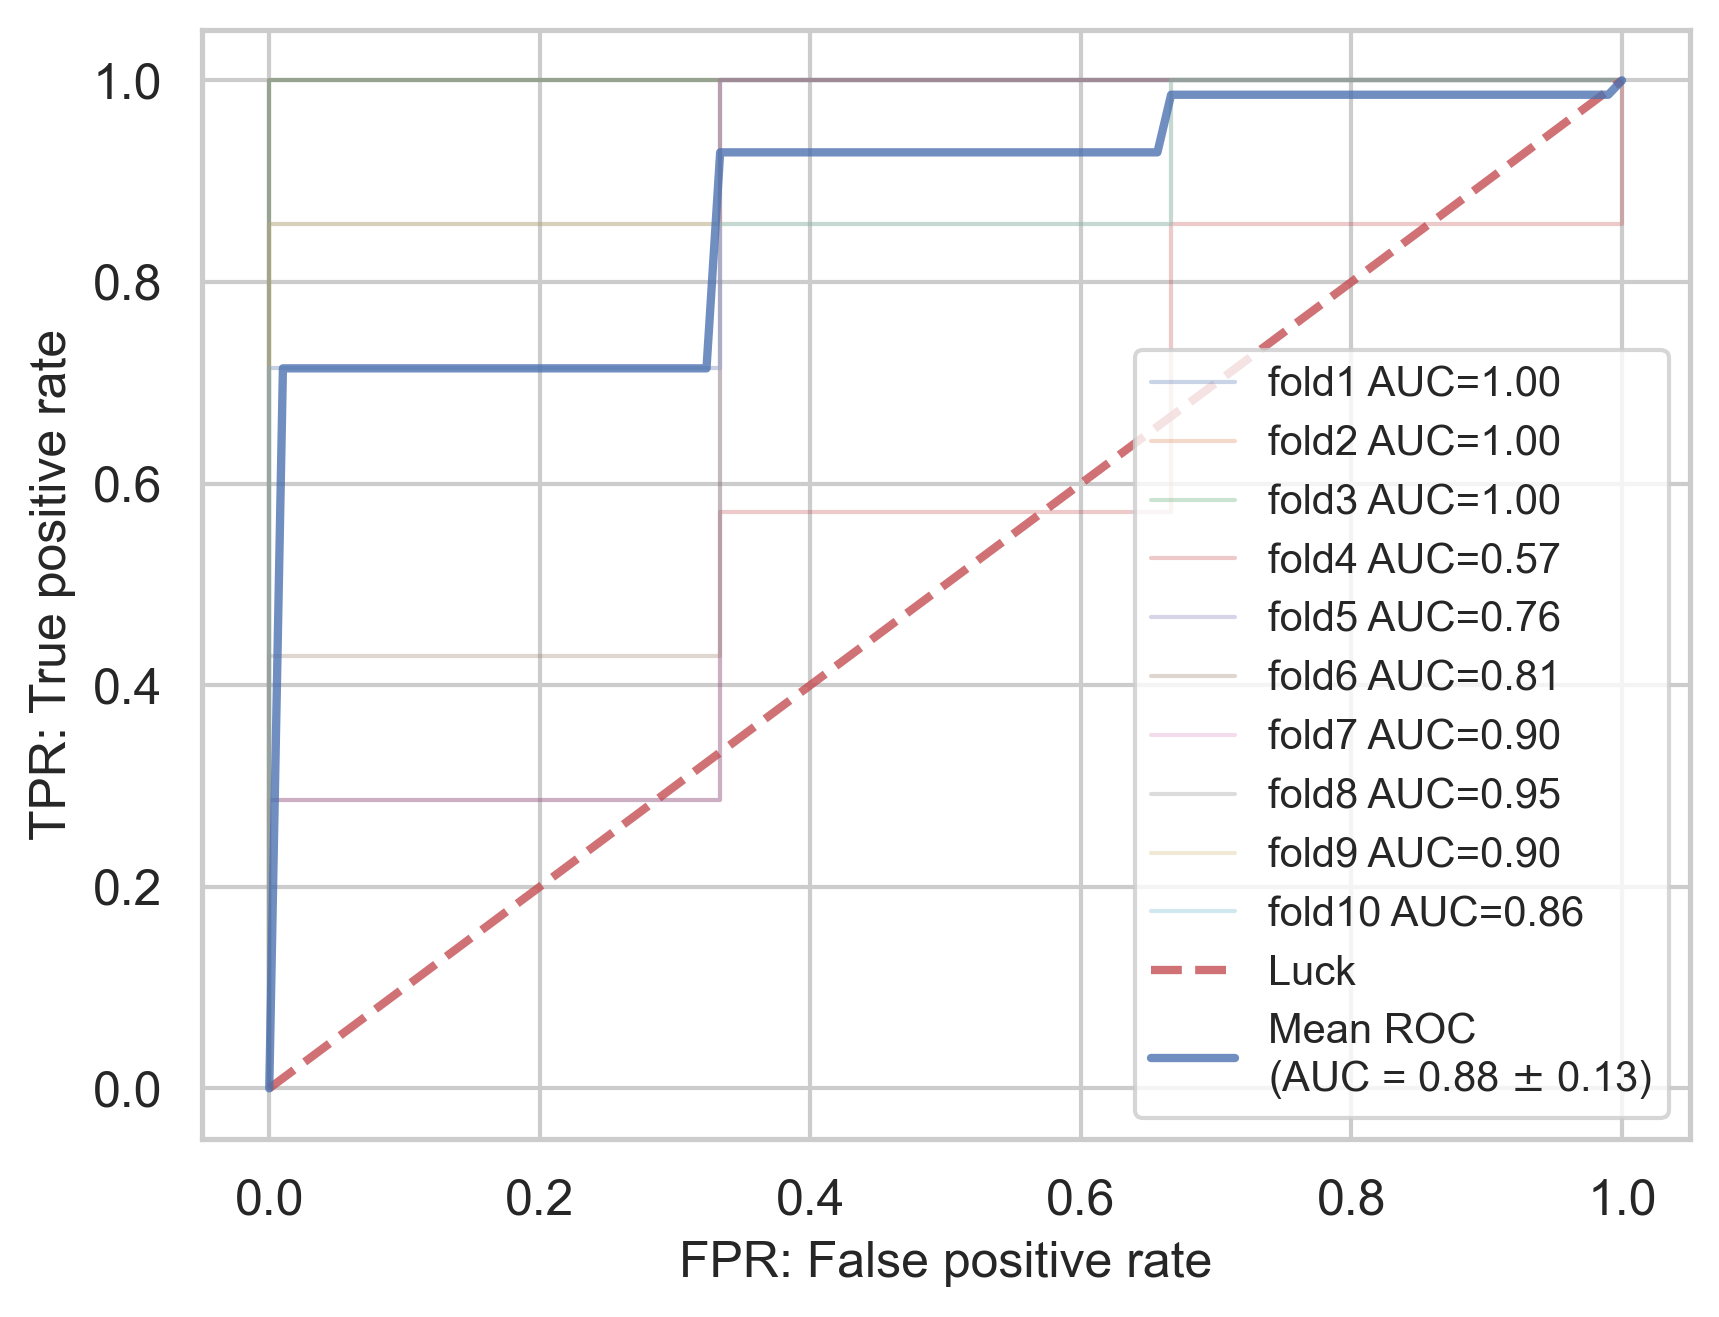

In [13]:
TPRS = []
AUCS = []
mean_fpr = np.linspace(0, 1, 100)
plt.rcParams['font.family']='Arial'
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 30

for i in range(10):
    score_name = 'Score_fold%d'%i
    fpr, tpr, score = get_fpr_tpr(TCGA_test_true, cnn_TCGA_merged[score_name])
    ax.plot(fpr, tpr,lw=1, alpha=0.3,label='fold%d AUC=%0.2f'%(i+1, score))
    TPRS.append(interp(mean_fpr, fpr, tpr))
    TPRS[-1][0] = 0.0
    AUCS.append(score)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
cnn_TCGA_mean_tpr = np.mean(TPRS, axis=0)
cnn_TCGA_mean_tpr[-1] = 1.0
cnn_TCGA_mean_auc = np.array(AUCS).mean()
cnn_TCGA_std_auc = np.std(AUCS)

ax.plot(mean_fpr, cnn_TCGA_mean_tpr, color='b',
             label=r'Mean ROC'+"\n"+'(AUC = %0.2f $\pm$ %0.2f)' % (cnn_TCGA_mean_auc, cnn_TCGA_std_auc),
             lw=2, alpha=.8)

#ax.xlim([-0.05, 1.05])
#ax.ylim([-0.05, 1.05])
ax.tick_params(labelsize=12)
ax.legend(fontsize =10)
ax.set_xlabel('FPR: False positive rate',fontsize=12)
ax.set_ylabel('TPR: True positive rate',fontsize=12)

cnn_TCGA_aucs = AUCS

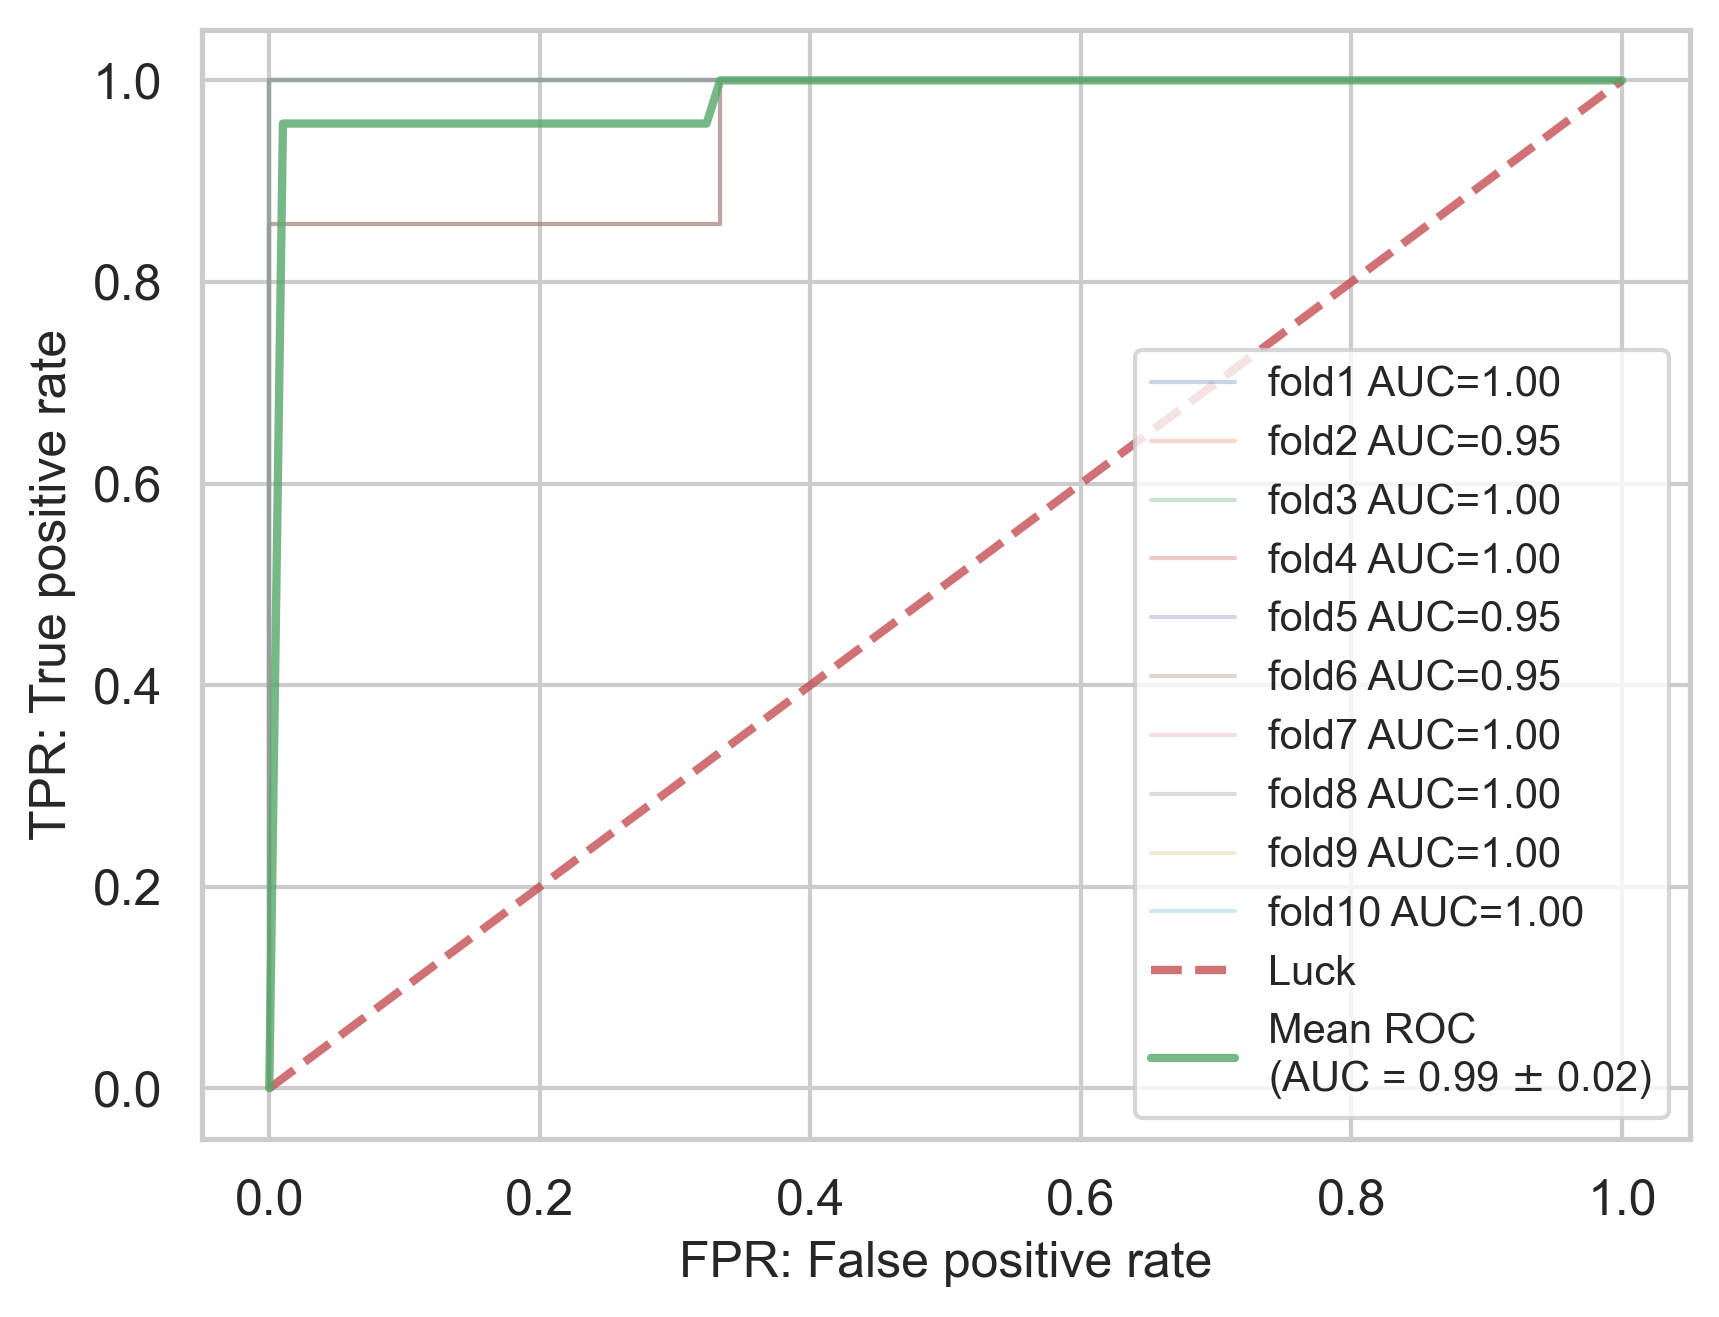

In [14]:
TPRS = []
AUCS = []
mean_fpr = np.linspace(0, 1, 100)
plt.rcParams['font.family']='Arial'
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 30

for i in range(10):
    score_name = 'Score_fold%d'%i
    fpr, tpr, score = get_fpr_tpr(TCGA_test_true, vi_TCGA_merged[score_name])
    ax.plot(fpr, tpr,lw=1, alpha=0.3,label='fold%d AUC=%0.2f'%(i+1, score))
    TPRS.append(interp(mean_fpr, fpr, tpr))
    TPRS[-1][0] = 0.0
    AUCS.append(score)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
vi_TCGA_mean_tpr = np.mean(TPRS, axis=0)
vi_TCGA_mean_tpr[-1] = 1.0
vi_TCGA_mean_auc = np.array(AUCS).mean()
vi_TCGA_std_auc = np.std(AUCS)
ax.plot(mean_fpr, vi_TCGA_mean_tpr, color='g',
             label=r'Mean ROC'+"\n"+'(AUC = %0.2f $\pm$ %0.2f)' % (vi_TCGA_mean_auc, vi_TCGA_std_auc),
             lw=2, alpha=.8)

#ax.xlim([-0.05, 1.05])
#ax.ylim([-0.05, 1.05])
ax.tick_params(labelsize=12)
ax.legend(fontsize =10)
ax.set_xlabel('FPR: False positive rate',fontsize=12)
ax.set_ylabel('TPR: True positive rate',fontsize=12)

vit_TCGA_aucs = AUCS

Text(0, 0.5, 'TPR: True positive rate')

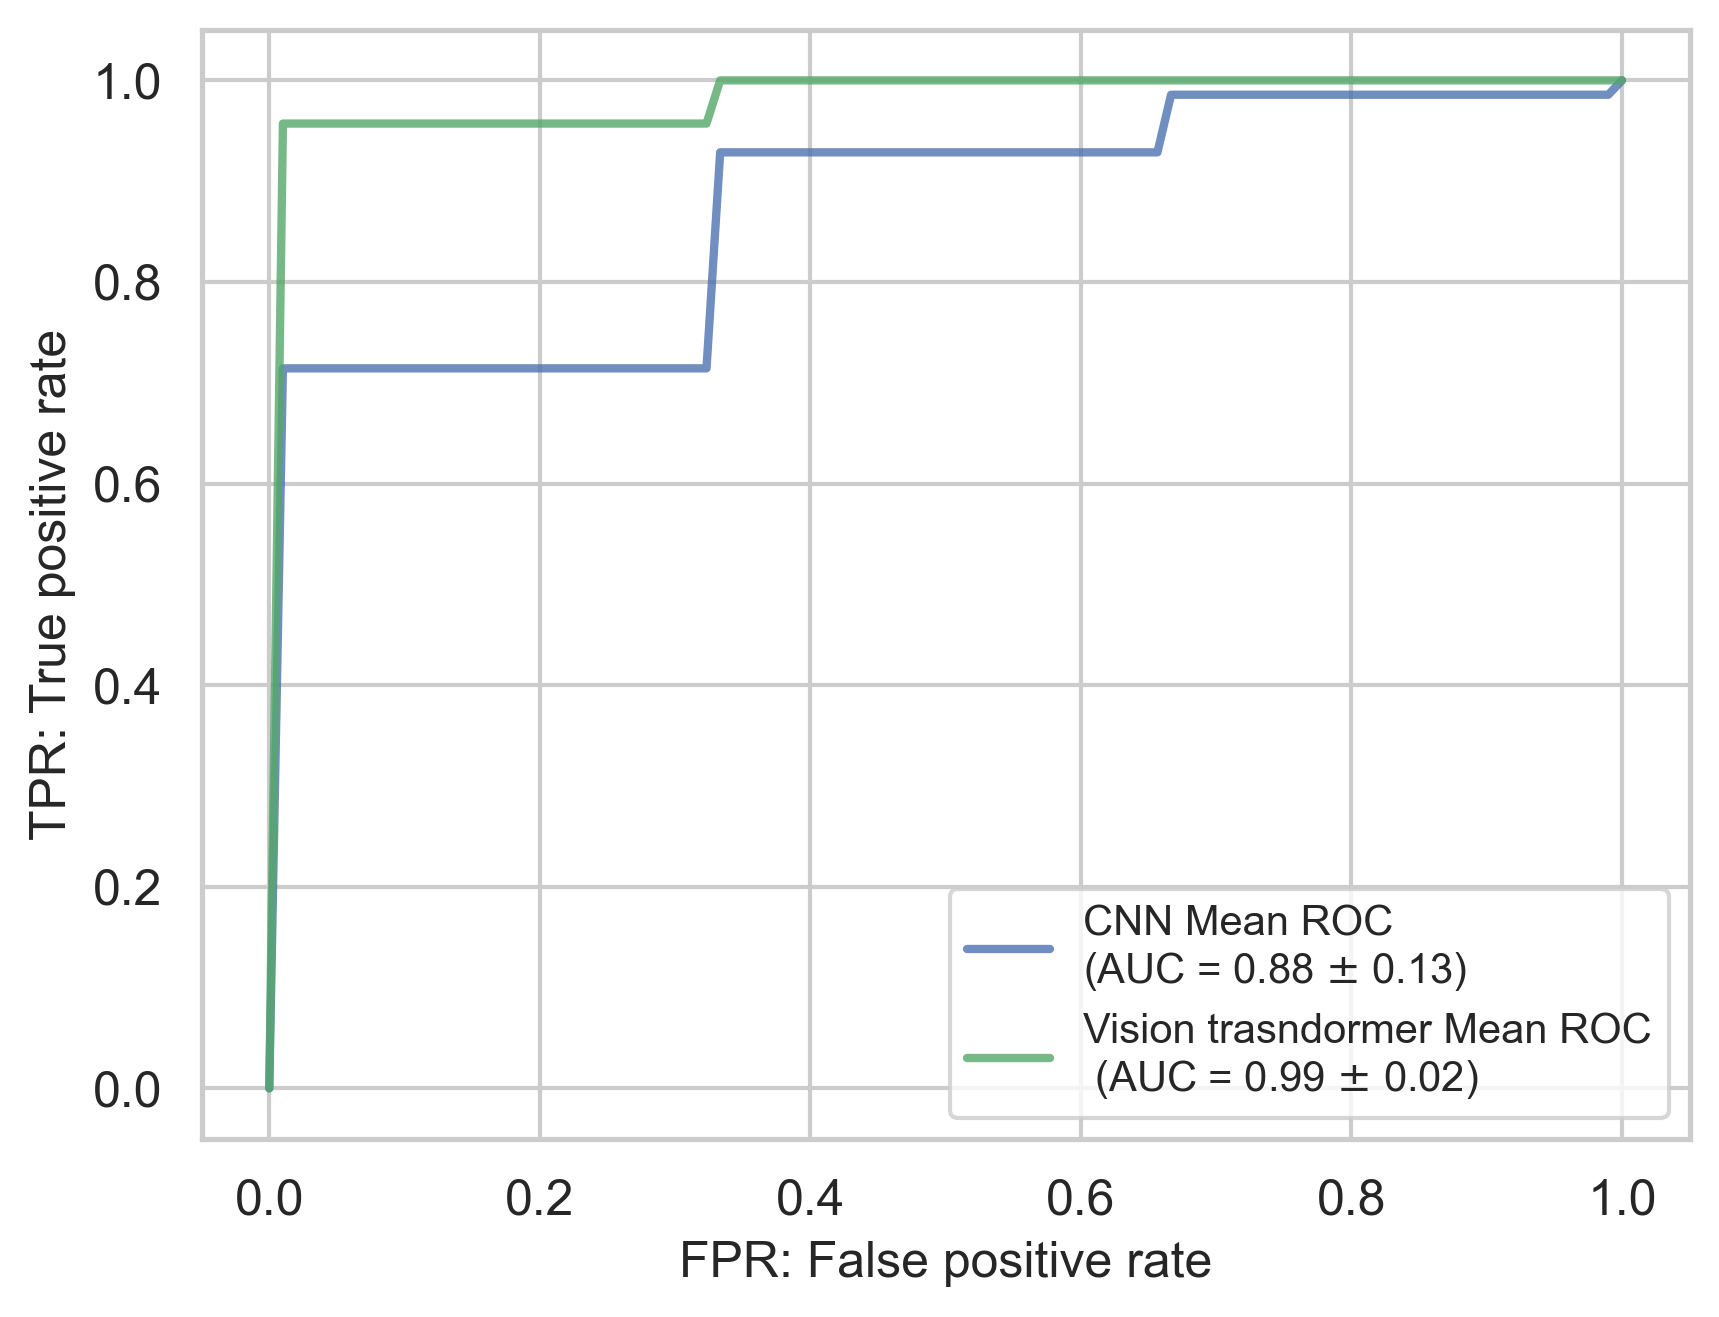

In [70]:
mean_fpr = np.linspace(0, 1, 100)
mean_fpr = np.linspace(0, 1, 100)
plt.rcParams['font.family']='Arial'
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 30

ax.plot(mean_fpr, cnn_TCGA_mean_tpr, color='b',
             label=r'CNN Mean ROC '+"\n"+'(AUC = %0.2f $\pm$ %0.2f)' % (cnn_TCGA_mean_auc, cnn_TCGA_std_auc),
             lw=2, alpha=.8)
ax.plot(mean_fpr, vi_TCGA_mean_tpr, color='g',
             label=r'Vision trasndormer Mean ROC'+"\n"+' (AUC = %0.2f $\pm$ %0.2f)' % (vi_TCGA_mean_auc, vi_TCGA_std_auc),
             lw=2, alpha=.8)
#ax.xlim([-0.05, 1.05])
#ax.ylim([-0.05, 1.05])
ax.tick_params(labelsize=12)
ax.legend(fontsize =10)
ax.set_xlabel('FPR: False positive rate',fontsize=12)
ax.set_ylabel('TPR: True positive rate',fontsize=12)

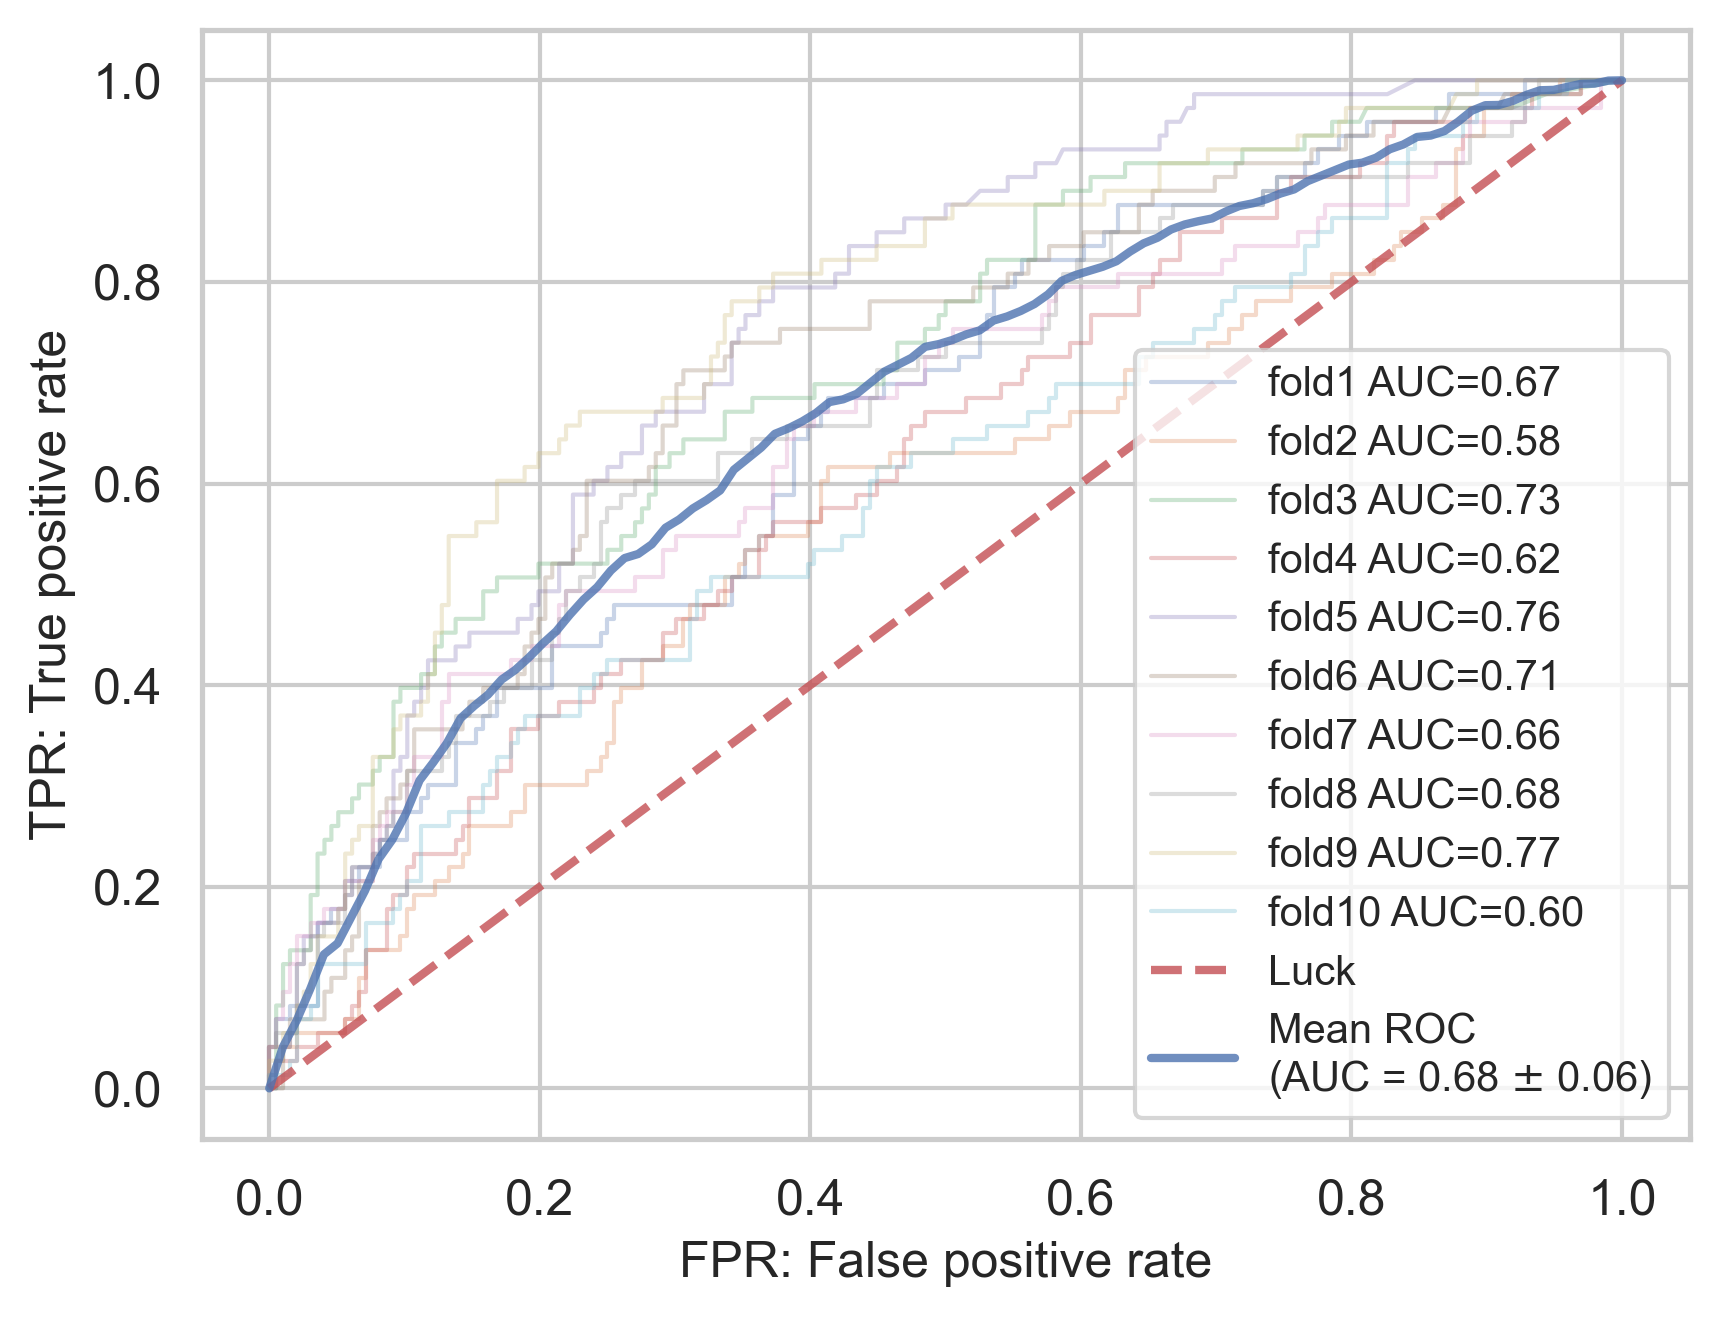

In [63]:
TPRS = []
AUCS = []
mean_fpr = np.linspace(0, 1, 100)
plt.rcParams['font.family']='Arial'
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 30

for i in range(10):
    score_name = 'Score_fold%d'%i
    fpr, tpr, score = get_fpr_tpr(JC_test_true, cnn_JC_test_merged[score_name])
    ax.plot(fpr, tpr,lw=1, alpha=0.3,label='fold%d AUC=%0.2f'%(i+1, score))
    TPRS.append(interp(mean_fpr, fpr, tpr))
    TPRS[-1][0] = 0.0
    AUCS.append(score)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
cnn_JC_mean_tpr = np.mean(TPRS, axis=0)
cnn_JC_mean_tpr[-1] = 1.0
cnn_JC_mean_auc = np.array(AUCS).mean()
cnn_JC_std_auc = np.std(AUCS)
ax.plot(mean_fpr, cnn_JC_mean_tpr, color='b',
             label=r'Mean ROC'+"\n"+'(AUC = %0.2f $\pm$ %0.2f)' % (cnn_JC_mean_auc, cnn_JC_std_auc),
             lw=2, alpha=.8)

#ax.xlim([-0.05, 1.05])
#ax.ylim([-0.05, 1.05])
ax.tick_params(labelsize=12)
ax.legend(fontsize =10)
ax.set_xlabel('FPR: False positive rate',fontsize=12)
ax.set_ylabel('TPR: True positive rate',fontsize=12)

cnn_JC_aucs = AUCS

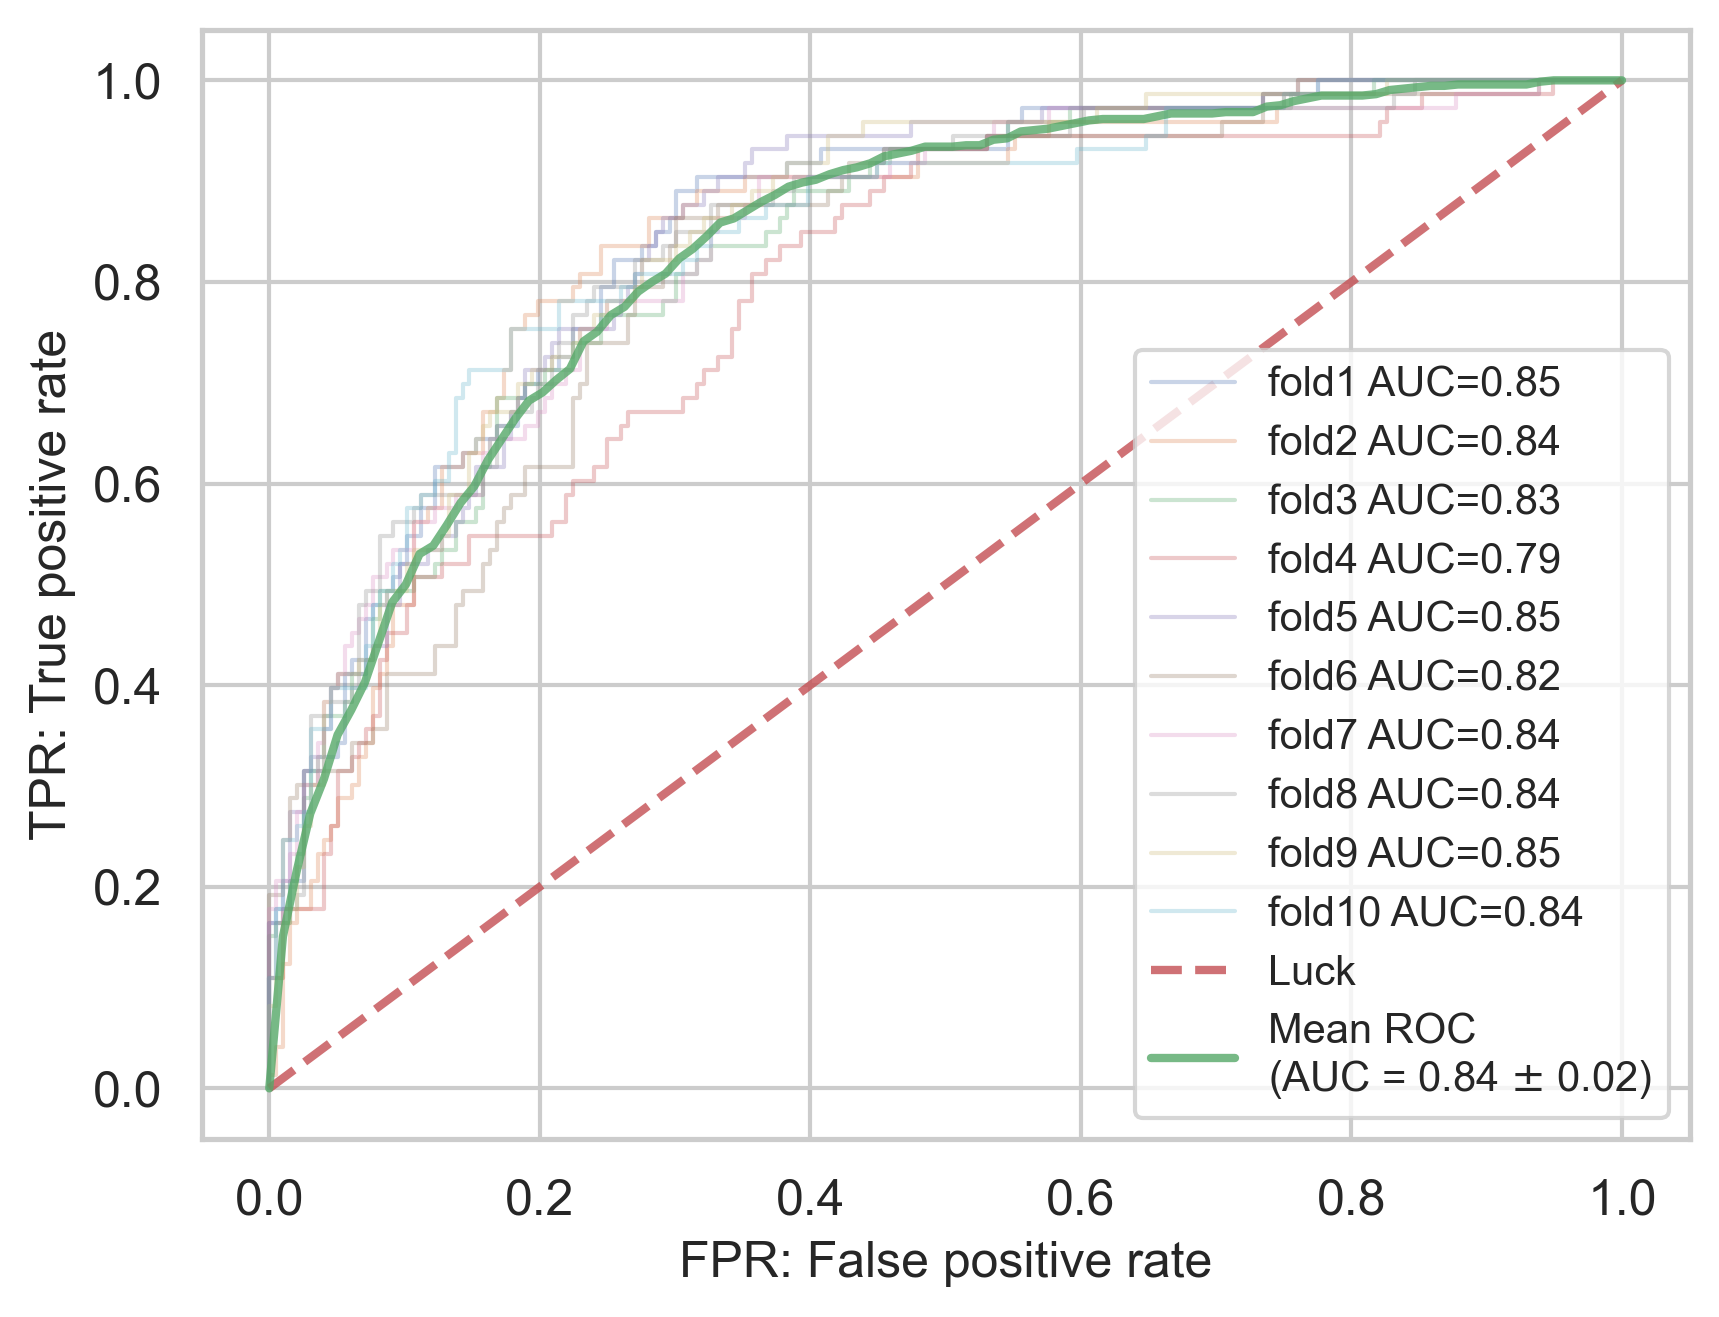

In [62]:
TPRS = []
AUCS = []
mean_fpr = np.linspace(0, 1, 100)
plt.rcParams['font.family']='Arial'
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 30

for i in range(10):
    score_name = 'Score_fold%d'%i
    fpr, tpr, score = get_fpr_tpr(JC_test_true, vi_JC_test_merged[score_name])
    ax.plot(fpr, tpr,lw=1, alpha=0.3,label='fold%d AUC=%0.2f'%(i+1, score))
    TPRS.append(interp(mean_fpr, fpr, tpr))
    TPRS[-1][0] = 0.0
    AUCS.append(score)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
vi_JC_mean_tpr = np.mean(TPRS, axis=0)
vi_JC_mean_tpr[-1] = 1.0
vi_JC_mean_auc = np.array(AUCS).mean()
vi_JC_std_auc = np.std(AUCS)
ax.plot(mean_fpr, vi_JC_mean_tpr, color='g',
             label=r'Mean ROC'+"\n"+'(AUC = %0.2f $\pm$ %0.2f)' % (vi_JC_mean_auc, vi_JC_std_auc),
             lw=2, alpha=.8)

#ax.xlim([-0.05, 1.05])
#ax.ylim([-0.05, 1.05])
ax.tick_params(labelsize=12)
ax.legend(fontsize =10)
ax.set_xlabel('FPR: False positive rate',fontsize=12)
ax.set_ylabel('TPR: True positive rate',fontsize=12)

vit_JC_aucs = AUCS

Text(0, 0.5, 'TPR: True positive rate')

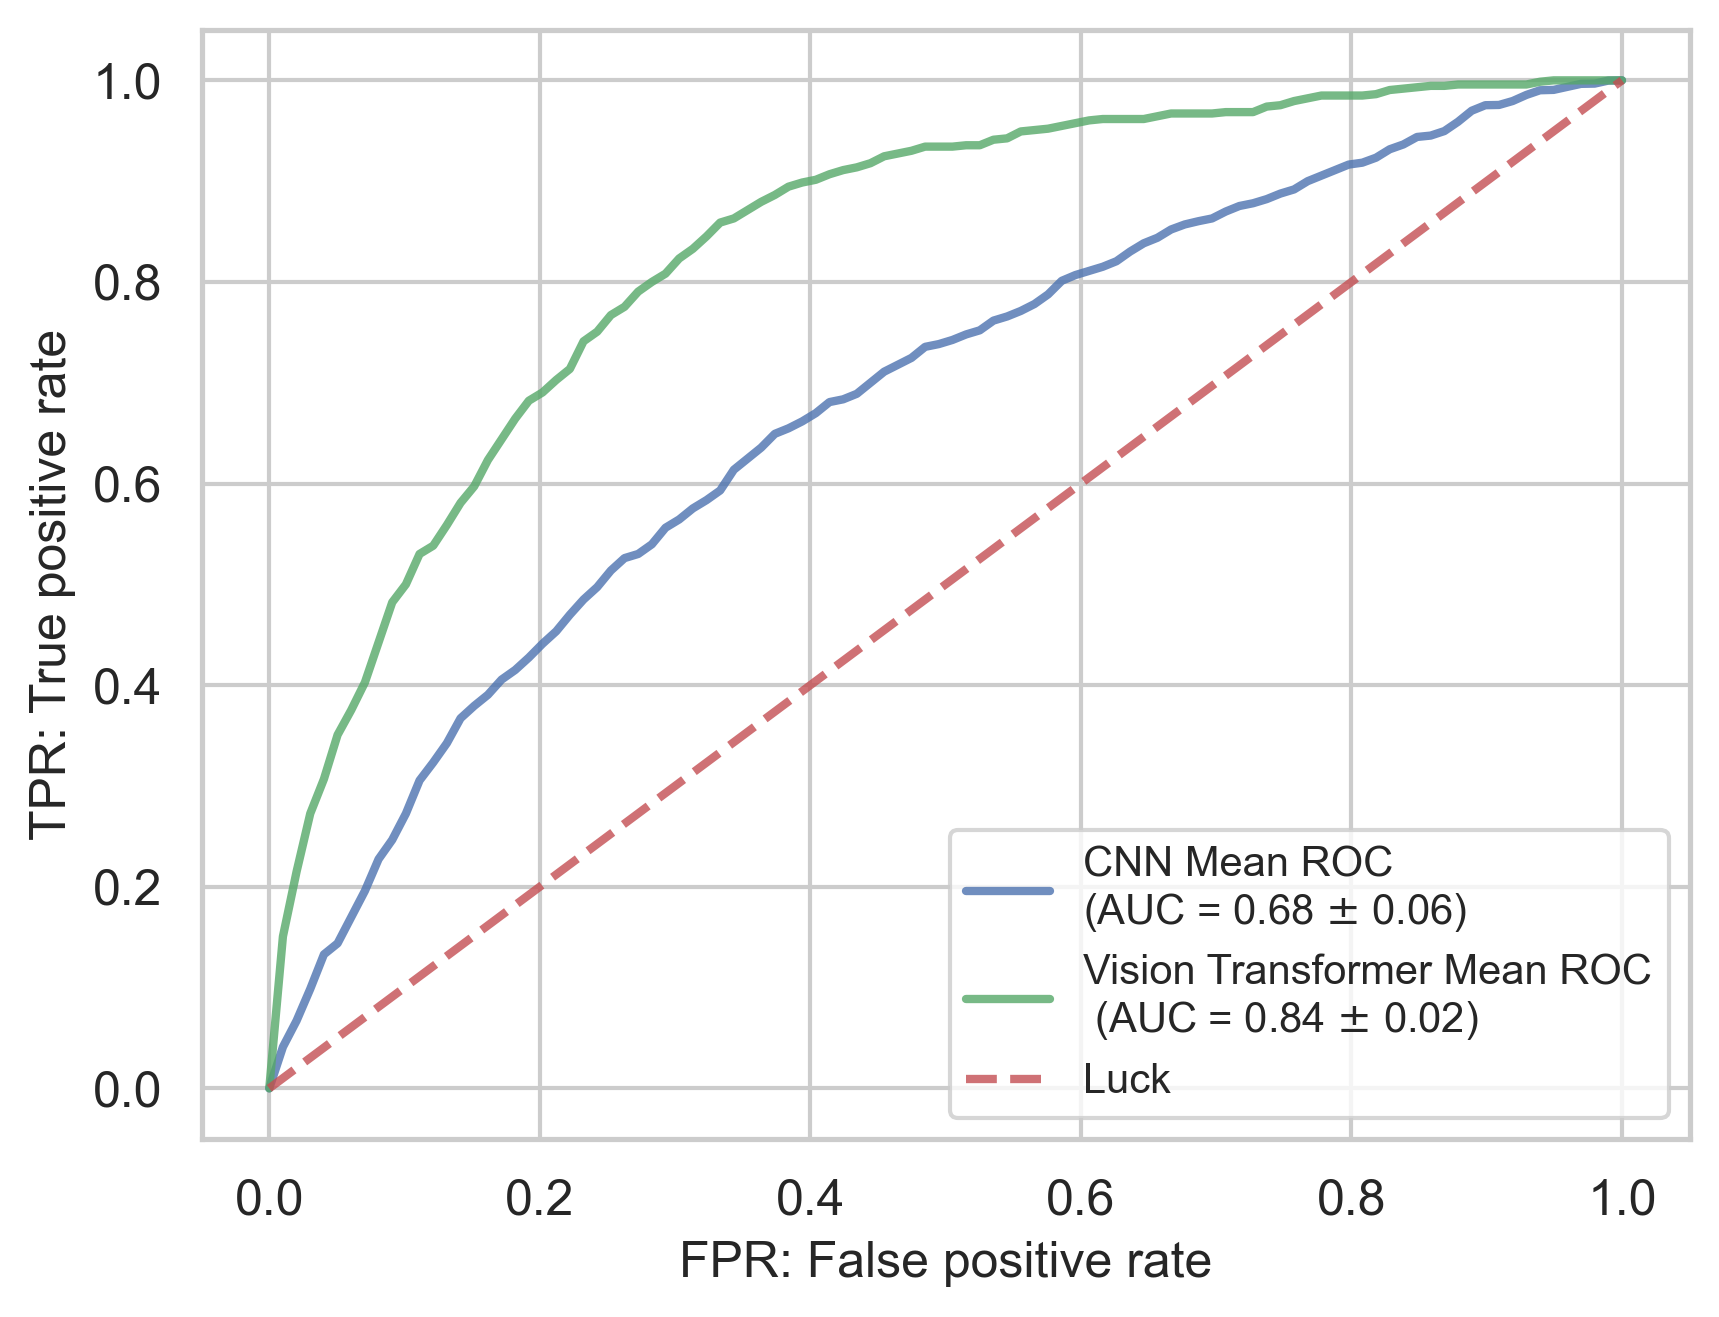

In [65]:
mean_fpr = np.linspace(0, 1, 100)
plt.rcParams['font.family']='Arial'
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 30

ax.plot(mean_fpr, cnn_JC_mean_tpr, color='b',
             label=r'CNN Mean ROC '+"\n"+'(AUC = %0.2f $\pm$ %0.2f)' % (cnn_JC_mean_auc, cnn_JC_std_auc),
             lw=2, alpha=.8)

ax.plot(mean_fpr, vi_JC_mean_tpr, color='g',
             label=r'Vision Transformer Mean ROC'+"\n"+' (AUC = %0.2f $\pm$ %0.2f)' % (vi_JC_mean_auc, vi_JC_std_auc),
             lw=2, alpha=.8)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
ax.tick_params(labelsize=12)
ax.legend(fontsize =10)
ax.set_xlabel('FPR: False positive rate',fontsize=12)
ax.set_ylabel('TPR: True positive rate',fontsize=12)

In [50]:
import scipy
scipy.stats.mannwhitneyu(cnn_TCGA_aucs, vit_TCGA_aucs)

MannwhitneyuResult(statistic=21.0, pvalue=0.0207856540232793)

In [51]:
import scipy
scipy.stats.mannwhitneyu(cnn_JC_aucs, vit_JC_aucs)

MannwhitneyuResult(statistic=0.0, pvalue=0.0001816511460914649)

In [52]:
json_base = '/Users/satoc/Dropbox/programing/python/HvsAI/Clinicians_result/Tokyo_U/'
TCGA_UT_jsons = glob.glob(json_base+ '*_TCGA_result.json')
JC_UT_jsons = glob.glob(json_base+ '*_JC_result.json')
os.path.split(TCGA_UT_jsons[0])[1][:-17]

'Yuki_Kawaguchi'

In [53]:
Clinicians_TCGA = pd.DataFrame()
clinicians_names = []
clinicians_answers = []
for loc in TCGA_UT_jsons:
    clinicians_name = os.path.split(loc)[1][:-17]
    clinicians_answer = get_response_score(loc)
    clinicians_names.append(clinicians_name)
    clinicians_answers.append(clinicians_answer)
Clinicians_TCGA = pd.DataFrame(data=np.array(clinicians_answers), 
             index=np.array(clinicians_names))

In [54]:
Clinicians_TCGA=Clinicians_TCGA.sort_index()
Clinicians_TCGA

0     1     2     3     4     5     6     7     8  \
Makoto_Ohno          0.25  0.25  0.75  0.25  0.25  0.25  0.25  0.75  0.25   
Shota_Tanaka         0.75  0.25  1.00  0.25  0.00  0.00  0.75  1.00  1.00   
Shunsuke_Yanagisawa  0.00  0.50  0.00  0.75  1.00  0.75  0.00  1.00  0.25   
Takaya_Tazawa        1.00  1.00  1.00  0.75  0.00  0.00  0.00  0.25  1.00   
Takayuki_Mukai       1.00  1.00  0.75  1.00  0.00  0.00  0.00  0.75  0.25   
Yasuji_Miyakita      0.00  0.75  1.00  1.00  0.00  0.25  0.00  1.00  0.75   
Yuki_Kawaguchi       0.25  0.25  0.25  0.25  0.75  0.75  0.25  0.25  0.25   
Yuki_Nakamura        1.00  0.00  1.00  0.00  0.00  0.00  0.00  1.00  0.00   
daisuke_sato         0.25  1.00  0.00  0.75  1.00  0.00  0.00  0.25  0.00   
shunsaku_takayanagi  1.00  1.00  1.00  1.00  0.00  0.00  0.00  0.75  0.25   

                        9  
Makoto_Ohno          0.75  
Shota_Tanaka         0.00  
Shunsuke_Yanagisawa  0.00  
Takaya_Tazawa        0.00  
Takayuki_Mukai       0.25  
Yasuji_Miyakita      0.00  
Yuki_Kawaguchi       0.75  
Yuki_Nakamura        1.00  
daisuke_sato         0.00  
shunsaku_takayanagi  0.00

In [23]:
Clinicians_JC = pd.DataFrame()
clinicians_names = []
clinicians_answers = []
for loc in JC_UT_jsons:
    clinicians_name = os.path.split(loc)[1][:-15]
    clinicians_answer = get_response_score(loc)
    clinicians_names.append(clinicians_name)
    clinicians_answers.append(clinicians_answer)
Clinicians_JC = pd.DataFrame(data=np.array(clinicians_answers), 
             index=np.array(clinicians_names))

In [24]:
Clinicians_JC = Clinicians_JC.sort_index()
Clinicians_JC

0     1     2     3     4     5     6     7     8  \
Makoto _Ohno         0.75  0.25  0.25  0.25  0.25  0.25  0.75  0.75  0.25   
Shota_Tanaka         0.00  0.75  0.25  1.00  0.75  0.75  1.00  1.00  0.00   
Shunsuke_Yanagisawa  0.00  0.25  1.00  0.25  0.00  1.00  1.00  0.00  0.00   
Takaya_Tazawa        0.25  1.00  1.00  1.00  0.00  1.00  1.00  0.75  0.00   
Takayuki_Mukai       0.00  0.75  1.00  1.00  0.00  1.00  0.50  0.75  0.00   
Yasuji_Miyakita      0.00  0.75  0.25  1.00  0.00  1.00  1.00  0.00  0.25   
Yuki_Kawaguchi       0.75  0.25  0.25  0.25  0.75  0.25  0.25  0.25  0.75   
Yuki_Nakamura        1.00  1.00  0.50  1.00  0.00  1.00  0.50  1.00  0.00   
daisuke_sato         0.25  0.00  0.00  0.00  0.00  0.75  0.75  0.25  0.25   
shunsaku_takayanagi  0.00  0.75  1.00  1.00  0.00  1.00  1.00  0.75  0.00   

                        9  
Makoto _Ohno         1.00  
Shota_Tanaka         1.00  
Shunsuke_Yanagisawa  0.75  
Takaya_Tazawa        1.00  
Takayuki_Mukai       0.25  
Yasuji_Miyakita      0.00  
Yuki_Kawaguchi       0.25  
Yuki_Nakamura        1.00  
daisuke_sato         0.25  
shunsaku_takayanagi  1.00

In [25]:
idx_pro = [0,1,2,5,9]
idx_big =[3,4,6,7,8]

In [26]:
Clinicians_JC.iloc[idx_pro,:]

0     1     2     3     4     5     6     7     8  \
Makoto _Ohno         0.75  0.25  0.25  0.25  0.25  0.25  0.75  0.75  0.25   
Shota_Tanaka         0.00  0.75  0.25  1.00  0.75  0.75  1.00  1.00  0.00   
Shunsuke_Yanagisawa  0.00  0.25  1.00  0.25  0.00  1.00  1.00  0.00  0.00   
Yasuji_Miyakita      0.00  0.75  0.25  1.00  0.00  1.00  1.00  0.00  0.25   
shunsaku_takayanagi  0.00  0.75  1.00  1.00  0.00  1.00  1.00  0.75  0.00   

                        9  
Makoto _Ohno         1.00  
Shota_Tanaka         1.00  
Shunsuke_Yanagisawa  0.75  
Yasuji_Miyakita      0.00  
shunsaku_takayanagi  1.00

In [27]:
Clinicians_TCGA.iloc[idx_big,:]

0     1     2     3     4     5     6     7     8     9
Takaya_Tazawa   1.00  1.00  1.00  0.75  0.00  0.00  0.00  0.25  1.00  0.00
Takayuki_Mukai  1.00  1.00  0.75  1.00  0.00  0.00  0.00  0.75  0.25  0.25
Yuki_Kawaguchi  0.25  0.25  0.25  0.25  0.75  0.75  0.25  0.25  0.25  0.75
Yuki_Nakamura   1.00  0.00  1.00  0.00  0.00  0.00  0.00  1.00  0.00  1.00
daisuke_sato    0.25  1.00  0.00  0.75  1.00  0.00  0.00  0.25  0.00  0.00

In [28]:
pro_TCGA = Clinicians_TCGA.iloc[idx_pro,:]
pro_JC = Clinicians_JC.iloc[idx_pro,:]
big_TCGA = Clinicians_TCGA.iloc[idx_big,:]
big_JC= Clinicians_JC.iloc[idx_big,:]

In [29]:
def get_fpr_tpr(label, score):
    y_true =np.array(label)
    y_score =np.array(score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    score = roc_auc_score(y_true, y_score)
    return fpr, tpr, score

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3980846706.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TCGA_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3980846706.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TCGA_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3980846706.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TCGA_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3980846706.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TCGA_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipy

Text(0, 0.5, 'TPR: True positive rate')

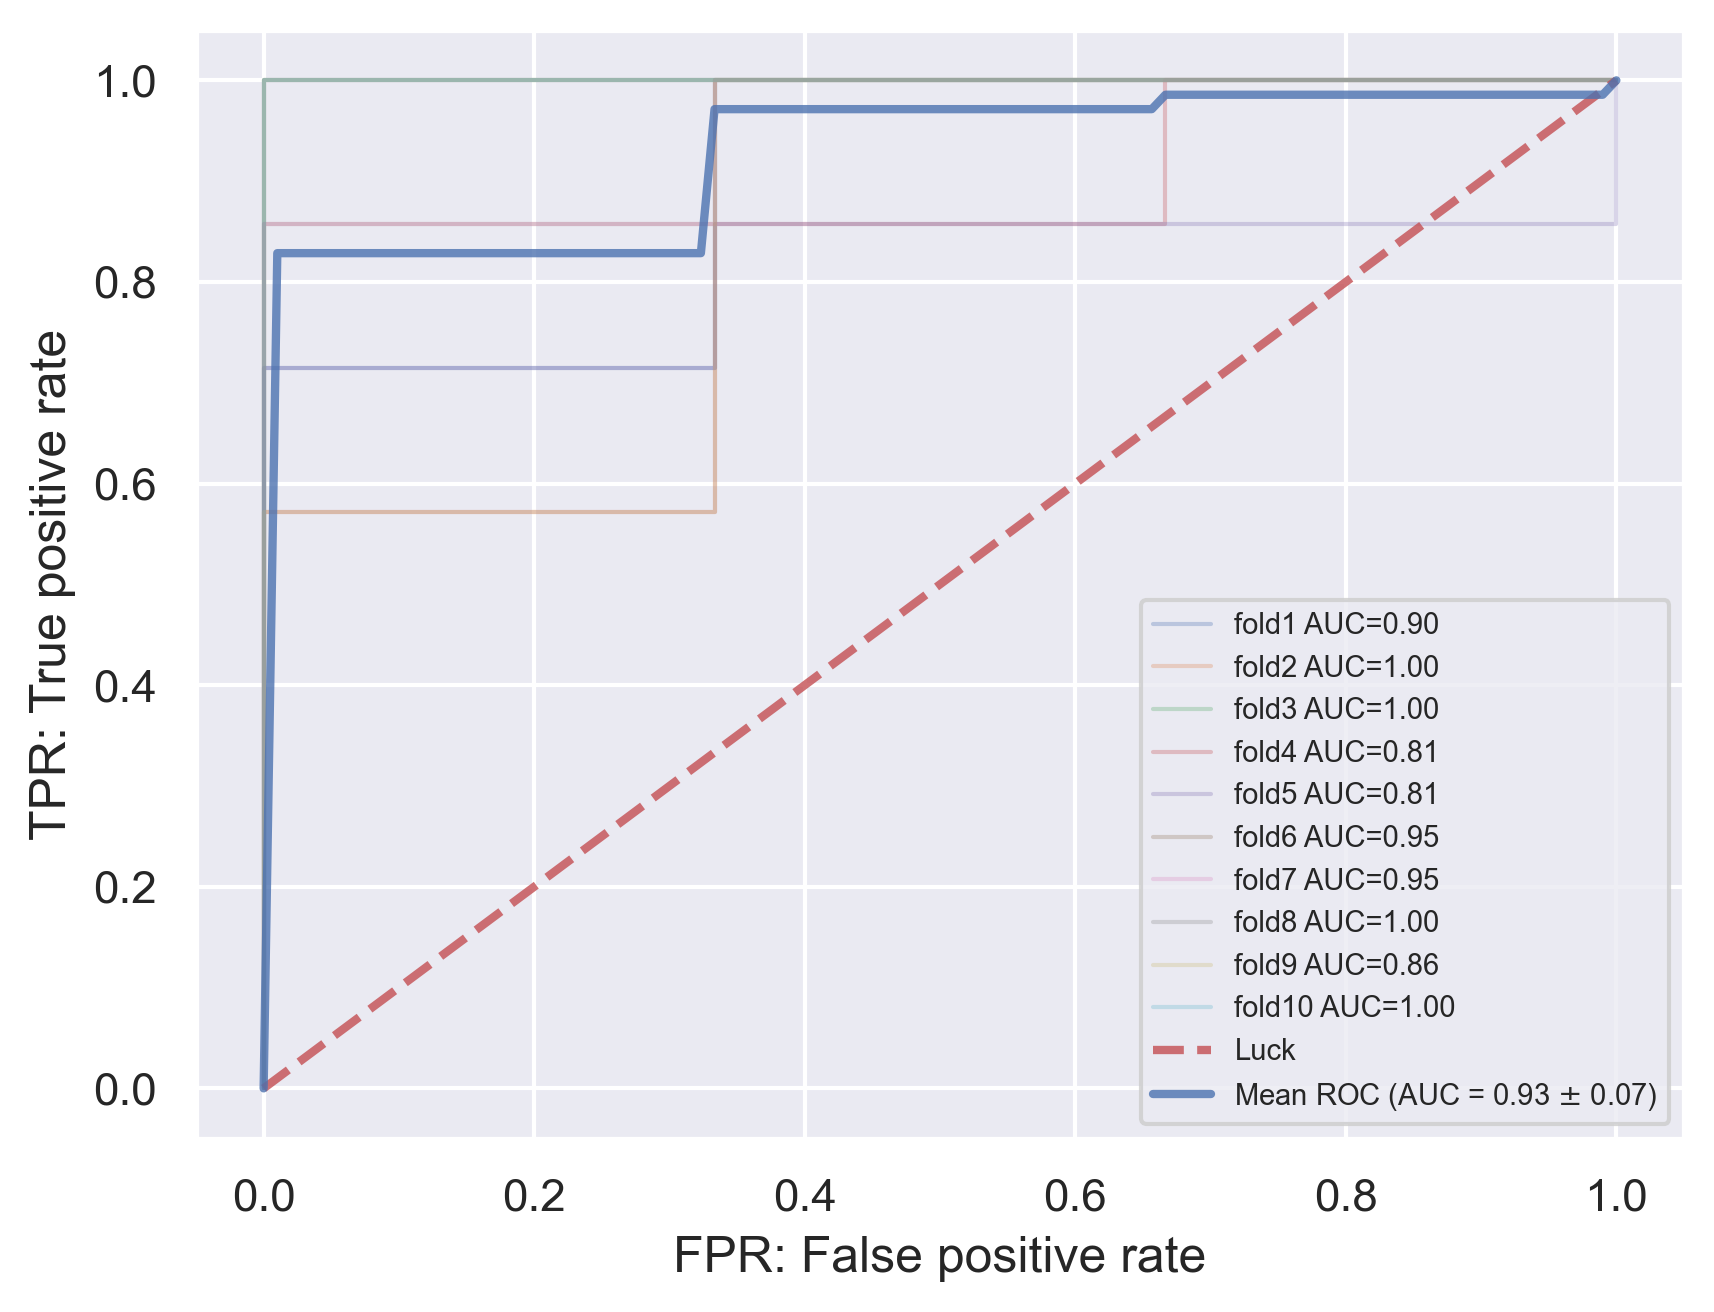

In [30]:
TPRS = []
AUCS = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(dpi=300)
for i in range(10):
    score_name = 'Score_fold%d'%i
    fpr, tpr, score = get_fpr_tpr(TCGA_test_true, cnn_TCGA_merged[score_name])
    plt.plot(fpr, tpr,lw=1, alpha=0.3,label='fold%d AUC=%0.2f'%(i+1, score))
    TPRS.append(interp(mean_fpr, fpr, tpr))
    TPRS[-1][0] = 0.0
    AUCS.append(score)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(TPRS, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(AUCS).mean()
std_auc = np.std(AUCS)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

Text(0, 0.5, 'TPR: True positive rate')

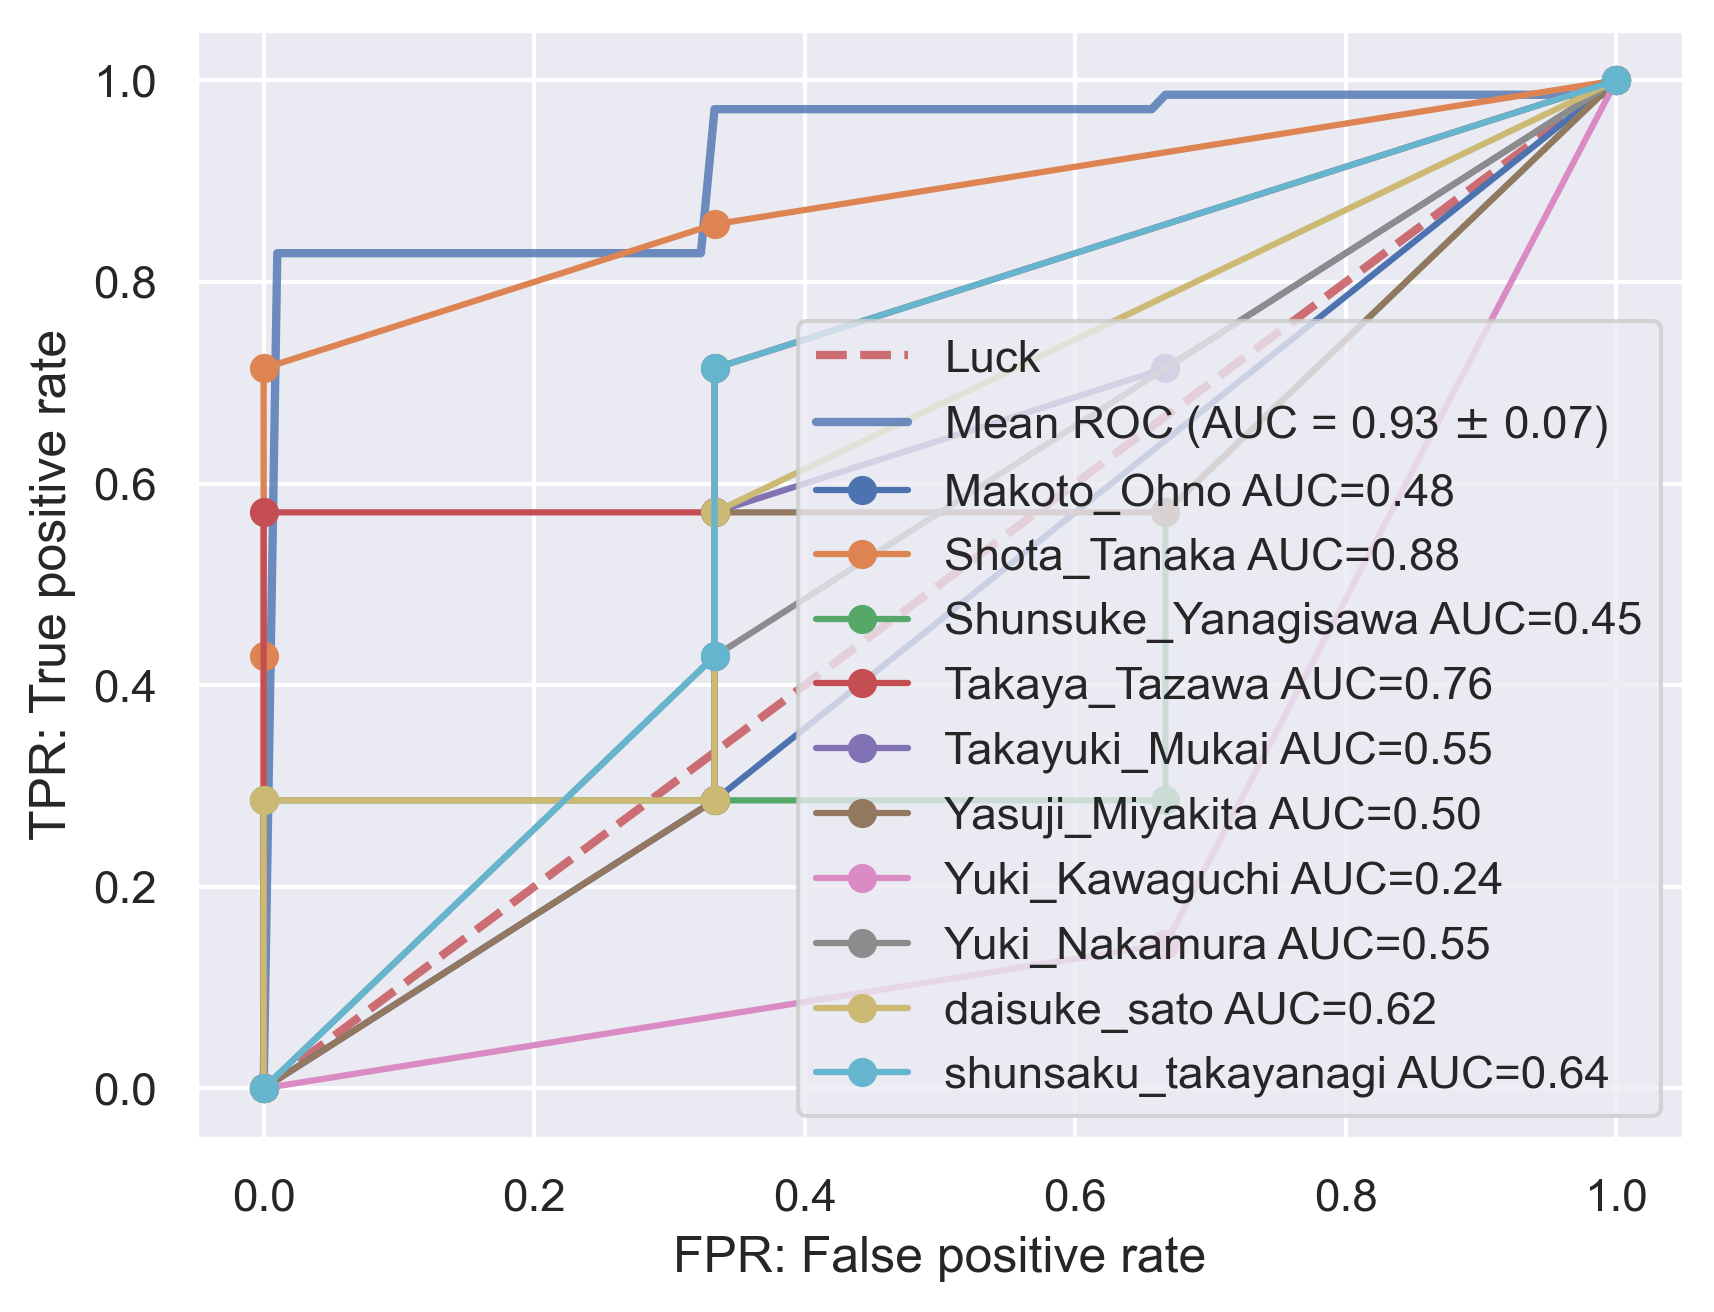

In [31]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(TPRS, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(AUCS).mean()
std_auc = np.std(AUCS)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

for i in range(len(Clinicians_TCGA)):
    cl_name = Clinicians_TCGA.index[i]
    cl_answer = np.array(Clinicians_TCGA.iloc[i,:]) 
    plt.plot(get_fpr_tpr(TCGA_test_true, cl_answer)[0], 
         get_fpr_tpr(TCGA_test_true, cl_answer)[1], marker='o',
        label='%s AUC=%0.2f'%(cl_name, get_fpr_tpr(TCGA_test_true, cl_answer)[2]))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2100935527.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_TCGA_tprs.append(interp(doctor_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2100935527.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_TCGA_tprs.append(interp(doctor_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2100935527.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_TCGA_tprs.append(interp(doctor_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2100935527.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_TCGA_tprs.append(interp(doctor_mean_fpr, fpr

Text(0, 0.5, 'TPR: True positive rate')

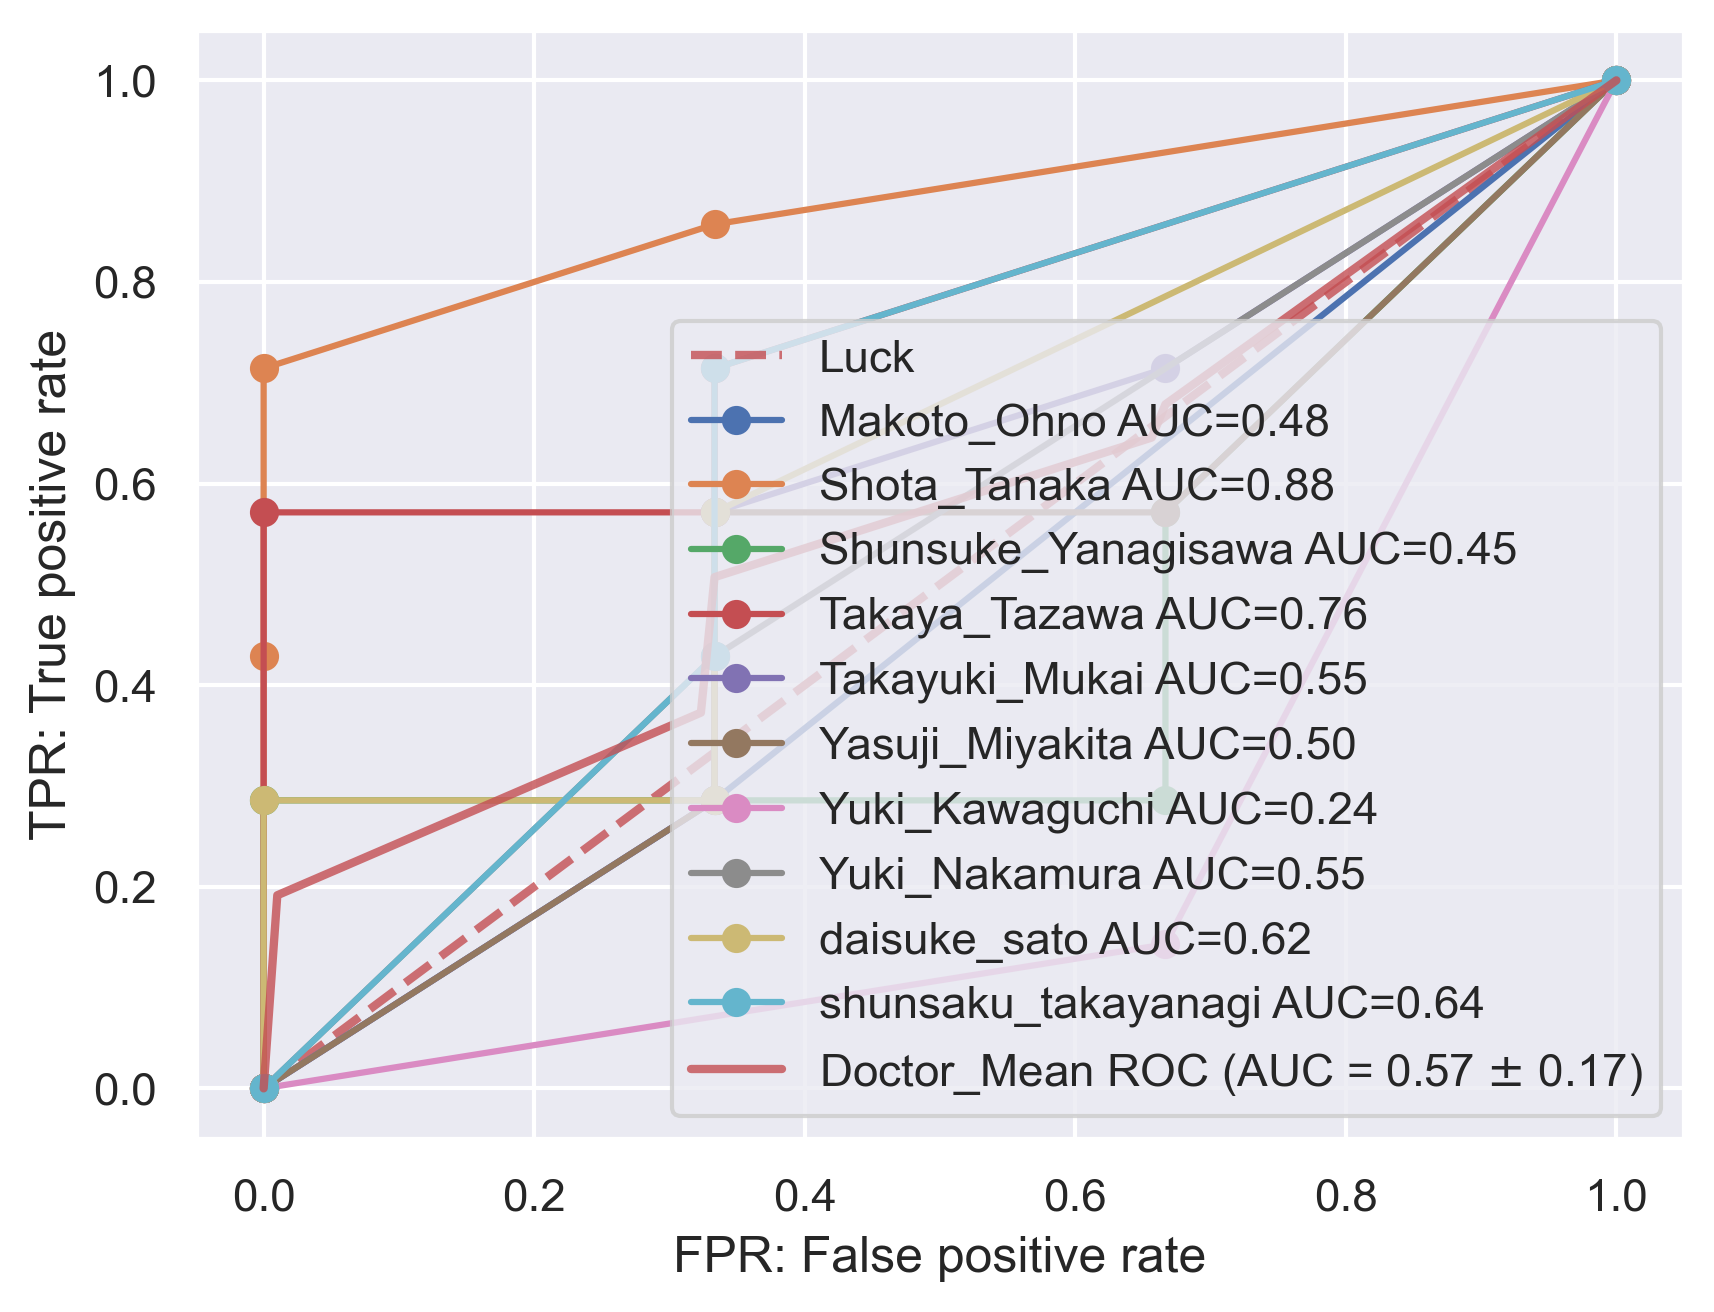

In [32]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

doctor_TPRS = []
doctor_AUCS = []
doctor_mean_fpr = np.linspace(0, 1, 100)
for i in range(len(Clinicians_TCGA)):
    cl_name = Clinicians_TCGA.index[i]
    cl_answer = np.array(Clinicians_TCGA.iloc[i,:])
    fpr, tpr, score = get_fpr_tpr(TCGA_test_true, cl_answer)
    plt.plot(fpr, tpr, marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))
    doctor_TPRS.append(interp(doctor_mean_fpr, fpr, tpr))
    doctor_TPRS[-1][0] = 0.0
    doctor_AUCS.append(score)

doctor_TCGA_mean_tpr = np.mean(doctor_TPRS, axis=0)
doctor_TCGA_mean_tpr[-1] = 1.0
doctor_TCGA_mean_auc = np.array(doctor_AUCS).mean()
doctor_TCGA_std = np.std(doctor_AUCS)
plt.plot(doctor_mean_fpr, doctor_TCGA_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_TCGA_mean_auc,
                                                            doctor_TCGA_std),
             lw=2, alpha=.8)    
    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

Text(0, 0.5, 'TPR: True positive rate')

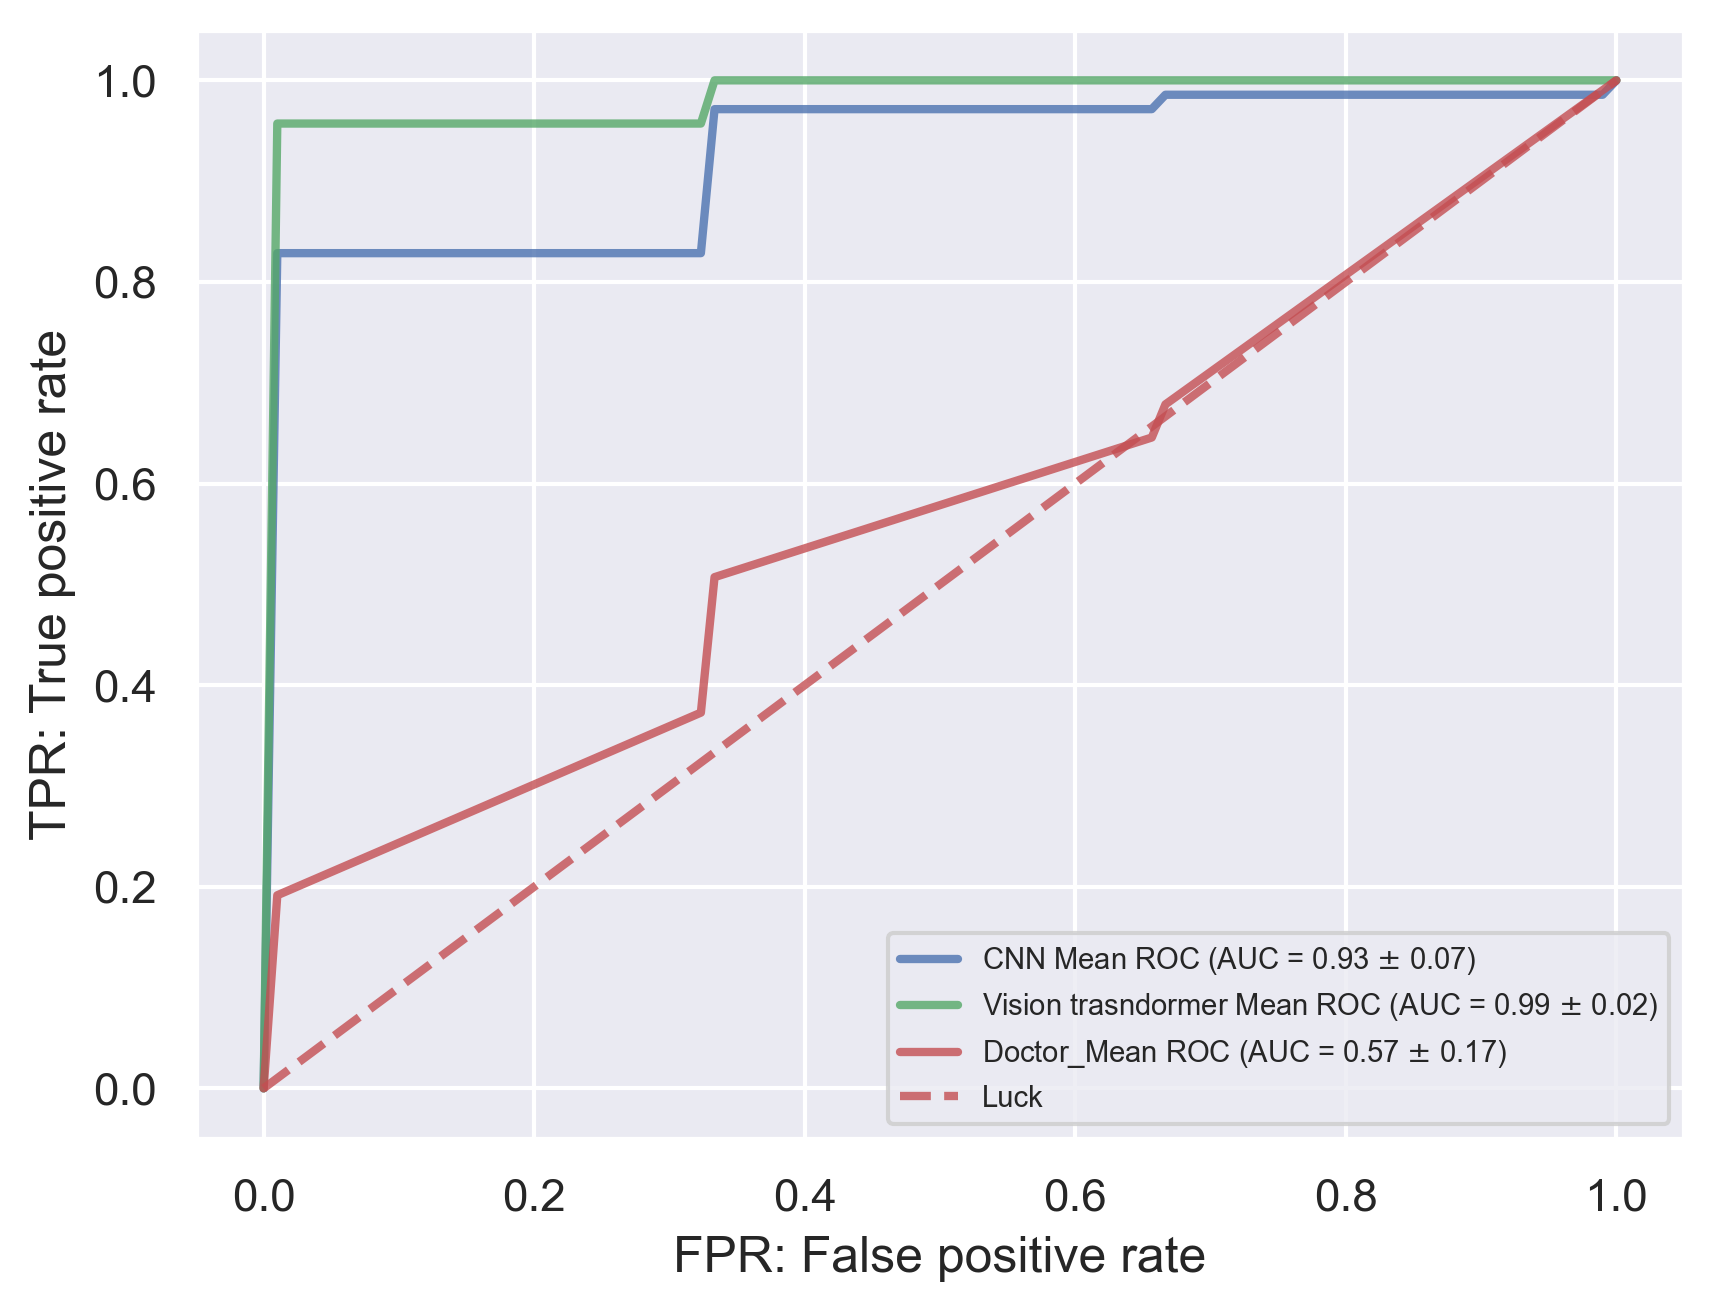

In [33]:
mean_fpr = np.linspace(0, 1, 100)
plt.figure(dpi=300)
plt.plot(mean_fpr, cnn_TCGA_mean_tpr, color='b',
             label=r'CNN Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (cnn_TCGA_mean_auc, cnn_TCGA_std_auc),
             lw=2, alpha=.8)
plt.plot(mean_fpr, vi_TCGA_mean_tpr, color='g',
             label=r'Vision trasndormer Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (vi_TCGA_mean_auc, vi_TCGA_std_auc),
             lw=2, alpha=.8)
plt.plot(doctor_mean_fpr, doctor_TCGA_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_TCGA_mean_auc,
                                                            doctor_TCGA_std),
             lw=2, alpha=.8)    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/1663906565.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_TCGA_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/1663906565.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_TCGA_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/1663906565.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_TCGA_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/1663906565.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_TCGA_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/

Text(0, 0.5, 'TPR: True positive rate')

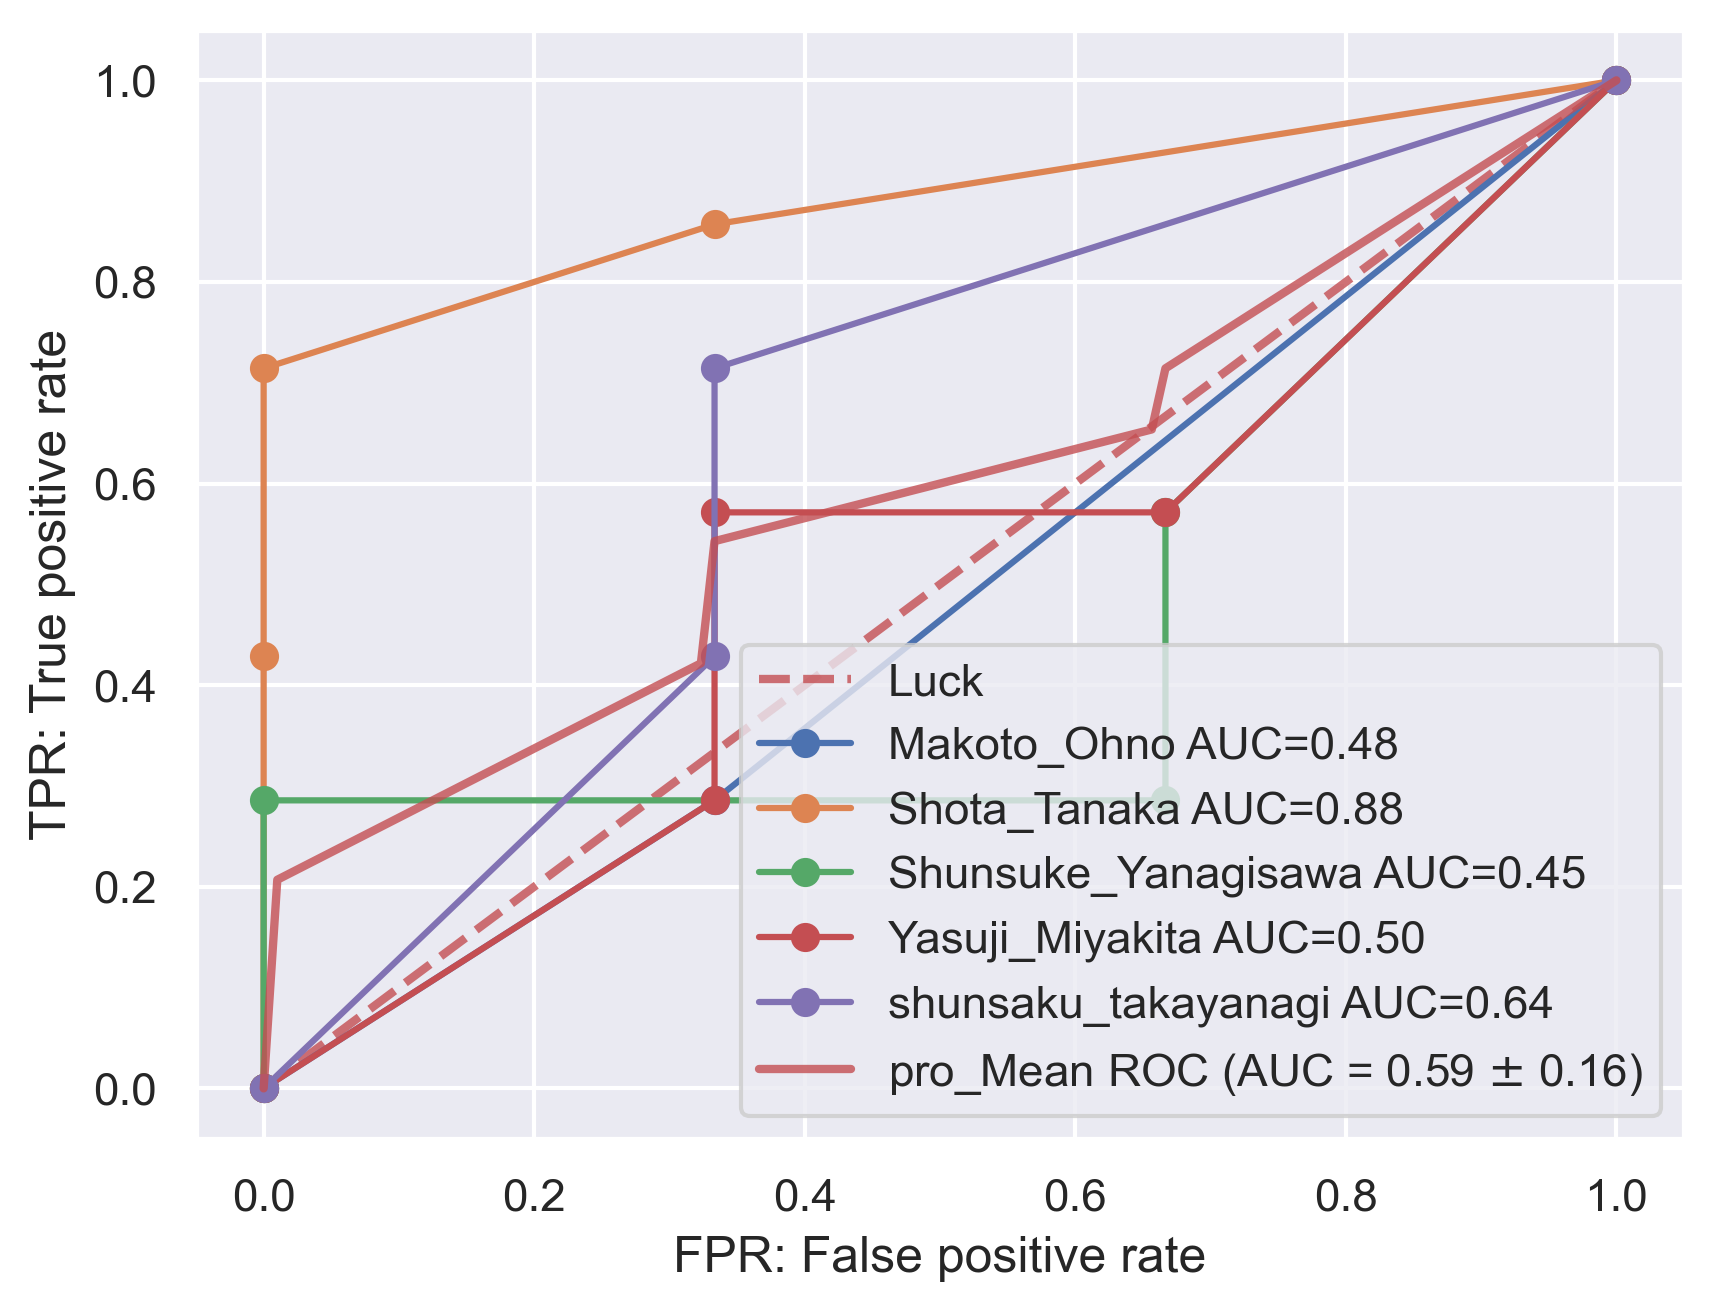

In [34]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

pro_TPRS = []
pro_AUCS = []
pro_mean_fpr = np.linspace(0, 1, 100)
for i in range(len(pro_TCGA)):
    cl_name = pro_TCGA.index[i]
    cl_answer = np.array(pro_TCGA.iloc[i,:])
    fpr, tpr, score = get_fpr_tpr(TCGA_test_true, cl_answer)
    plt.plot(fpr, tpr, marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))
    pro_TPRS.append(interp(pro_mean_fpr, fpr, tpr))
    pro_TPRS[-1][0] = 0.0
    pro_AUCS.append(score)

pro_mean_tpr = np.mean(pro_TPRS, axis=0)
pro_mean_tpr[-1] = 1.0
pro_mean_auc = np.array(pro_AUCS).mean()
pro_std_auc = np.std(pro_AUCS)
plt.plot(pro_mean_fpr, pro_mean_tpr, color='r',
             label=r'pro_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (pro_mean_auc,
                                                            pro_std_auc),
             lw=2, alpha=.8)    
    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2030717919.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_TCGA_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2030717919.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_TCGA_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2030717919.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_TCGA_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2030717919.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_TCGA_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/

Text(0, 0.5, 'TPR: True positive rate')

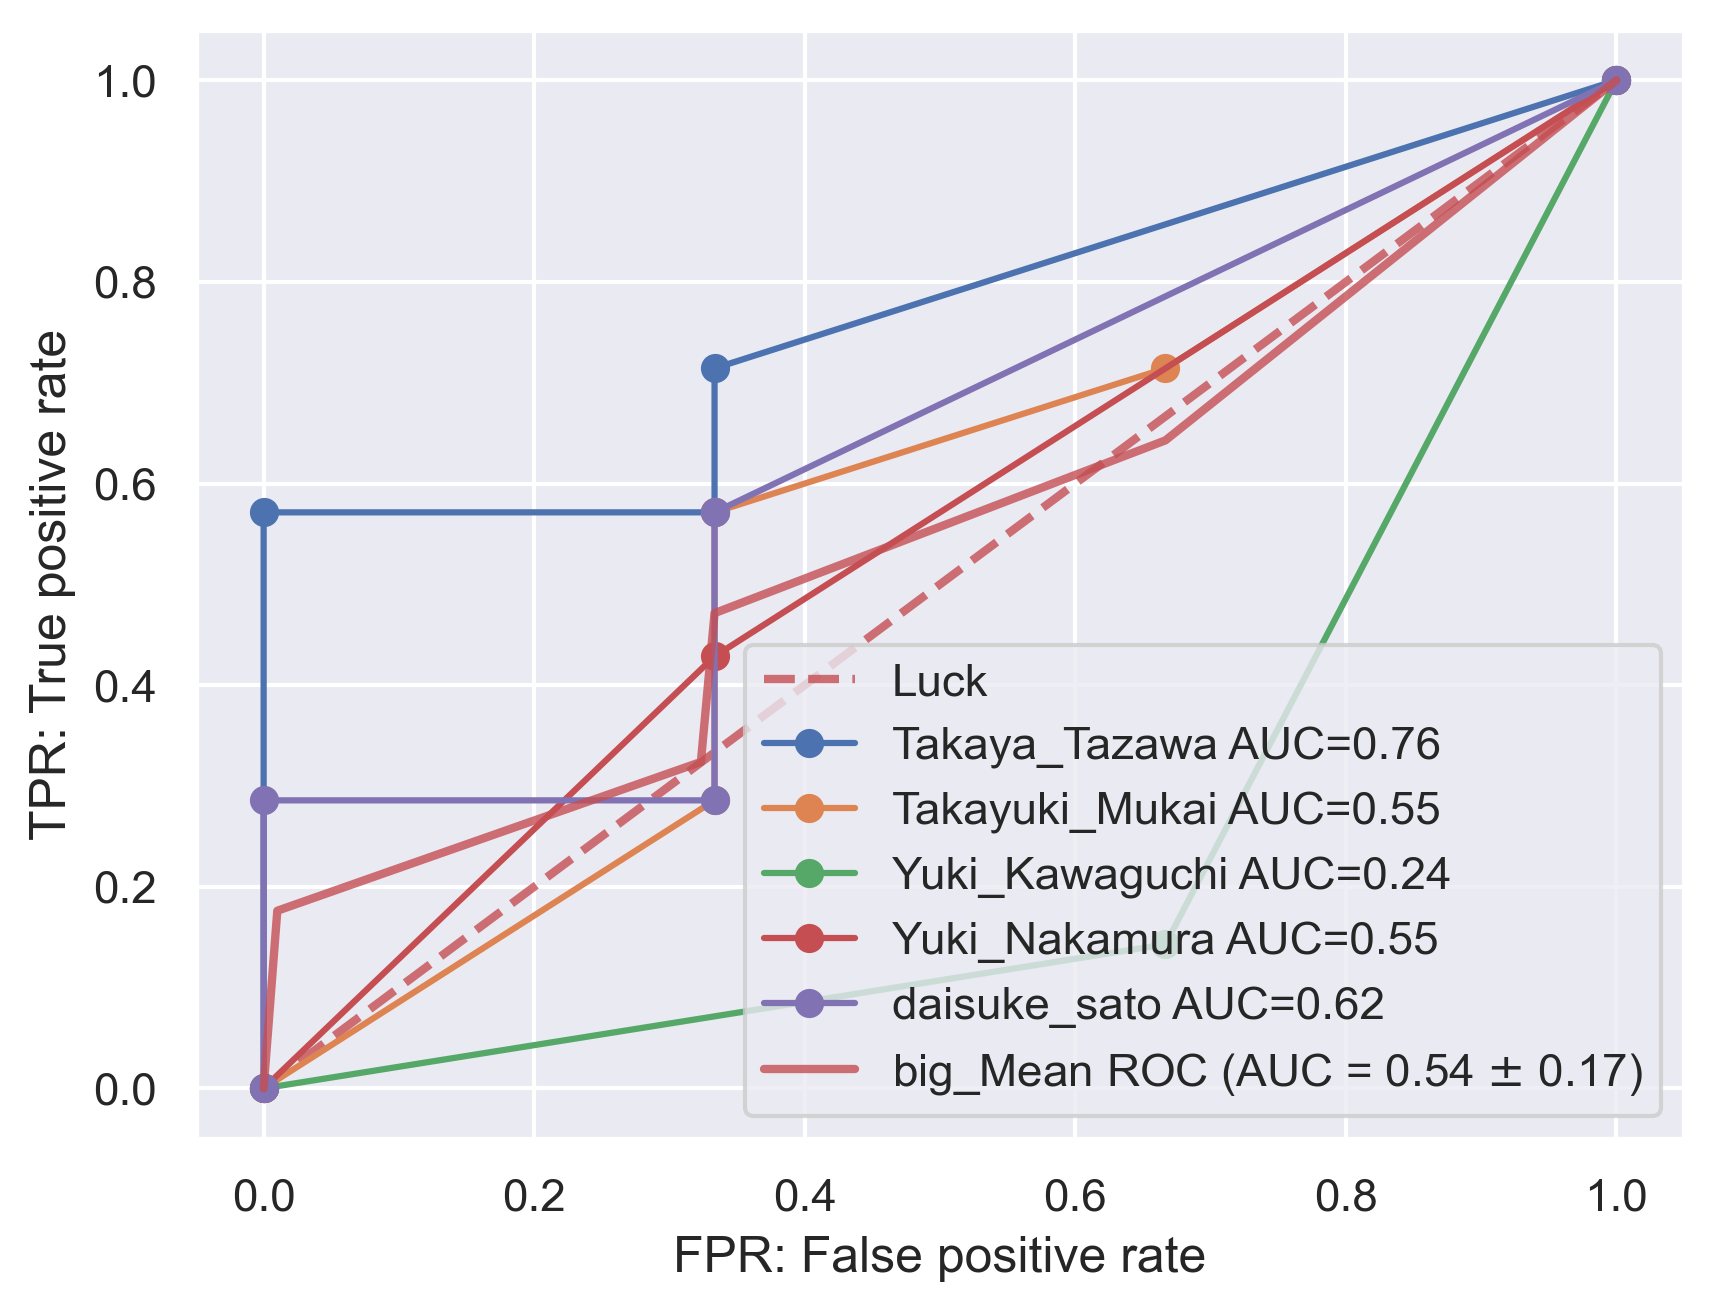

In [35]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

big_TPRS = []
big_AUCS = []
big_mean_fpr = np.linspace(0, 1, 100)
for i in range(len(big_TCGA)):
    cl_name = big_TCGA.index[i]
    cl_answer = np.array(big_TCGA.iloc[i,:])
    fpr, tpr, score = get_fpr_tpr(TCGA_test_true, cl_answer)
    plt.plot(fpr, tpr, marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))
    big_TPRS.append(interp(big_mean_fpr, fpr, tpr))
    big_TPRS[-1][0] = 0.0
    big_AUCS.append(score)

big_mean_tpr = np.mean(big_TPRS, axis=0)
big_mean_tpr[-1] = 1.0
big_mean_auc = np.array(big_AUCS).mean()
big_std_auc = np.std(big_AUCS)
plt.plot(big_mean_fpr, big_mean_tpr, color='r',
             label=r'big_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (big_mean_auc,
                                                            big_std_auc),
             lw=2, alpha=.8)    
    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

# For clinicians letter

In [36]:
Clinicians_TCGA

0     1     2     3     4     5     6     7     8  \
Makoto_Ohno          0.25  0.25  0.75  0.25  0.25  0.25  0.25  0.75  0.25   
Shota_Tanaka         0.75  0.25  1.00  0.25  0.00  0.00  0.75  1.00  1.00   
Shunsuke_Yanagisawa  0.00  0.50  0.00  0.75  1.00  0.75  0.00  1.00  0.25   
Takaya_Tazawa        1.00  1.00  1.00  0.75  0.00  0.00  0.00  0.25  1.00   
Takayuki_Mukai       1.00  1.00  0.75  1.00  0.00  0.00  0.00  0.75  0.25   
Yasuji_Miyakita      0.00  0.75  1.00  1.00  0.00  0.25  0.00  1.00  0.75   
Yuki_Kawaguchi       0.25  0.25  0.25  0.25  0.75  0.75  0.25  0.25  0.25   
Yuki_Nakamura        1.00  0.00  1.00  0.00  0.00  0.00  0.00  1.00  0.00   
daisuke_sato         0.25  1.00  0.00  0.75  1.00  0.00  0.00  0.25  0.00   
shunsaku_takayanagi  1.00  1.00  1.00  1.00  0.00  0.00  0.00  0.75  0.25   

                        9  
Makoto_Ohno          0.75  
Shota_Tanaka         0.00  
Shunsuke_Yanagisawa  0.00  
Takaya_Tazawa        0.00  
Takayuki_Mukai       0.25  
Yasuji_Miyakita      0.00  
Yuki_Kawaguchi       0.75  
Yuki_Nakamura        1.00  
daisuke_sato         0.00  
shunsaku_takayanagi  0.00

Text(0, 0.5, 'TPR: True positive rate')

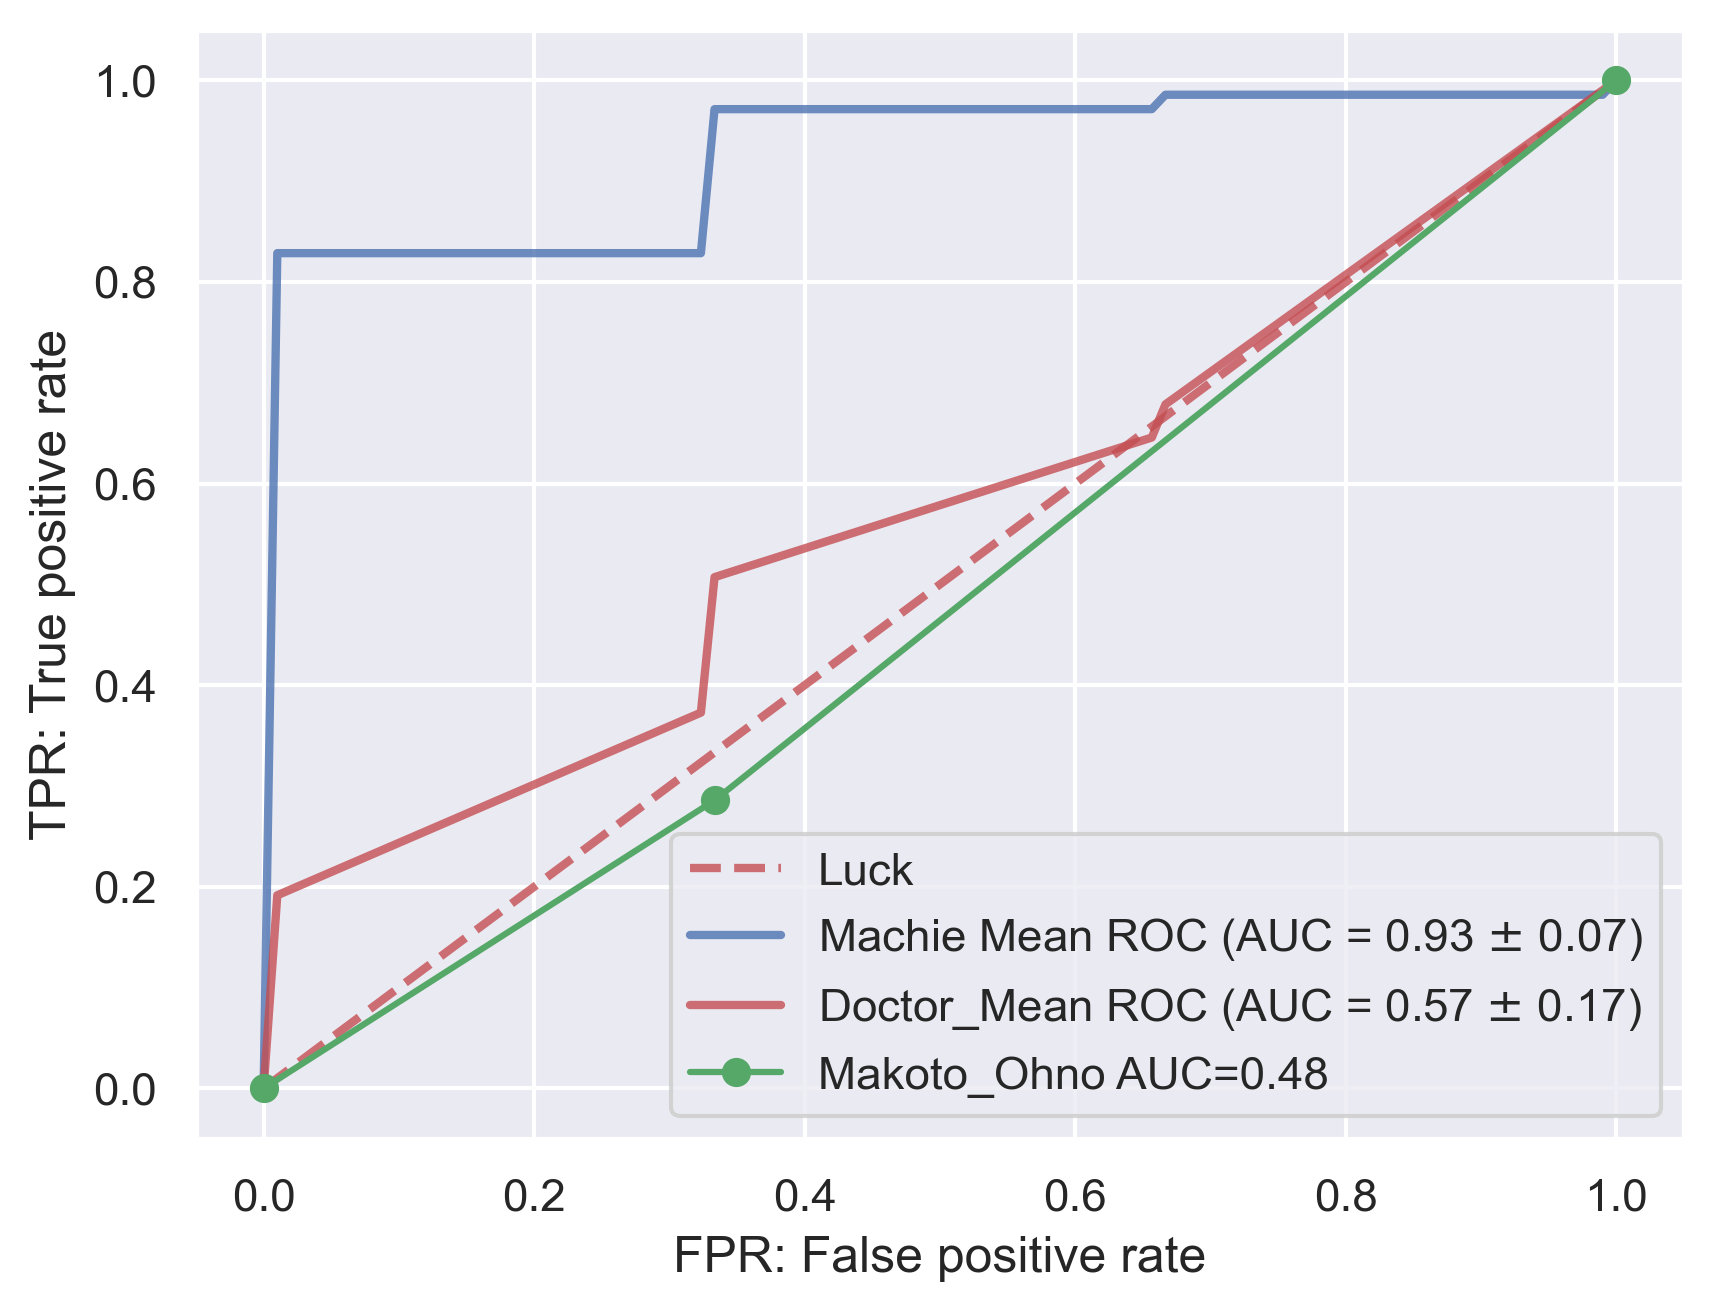

In [37]:
i=0

plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(TPRS, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(AUCS).mean()
std_auc = np.std(AUCS)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Machie Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

plt.plot(doctor_mean_fpr, doctor_TCGA_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_TCGA_mean_auc,
                                                            doctor_TCGA_std),
             lw=2, alpha=.8)   

cl_name = Clinicians_TCGA.index[i]
cl_answer = np.array(Clinicians_TCGA.iloc[i,:])
fpr, tpr, score = get_fpr_tpr(TCGA_test_true, cl_answer)
plt.plot(fpr, tpr, color='g',marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

Text(0, 0.5, 'TPR: True positive rate')

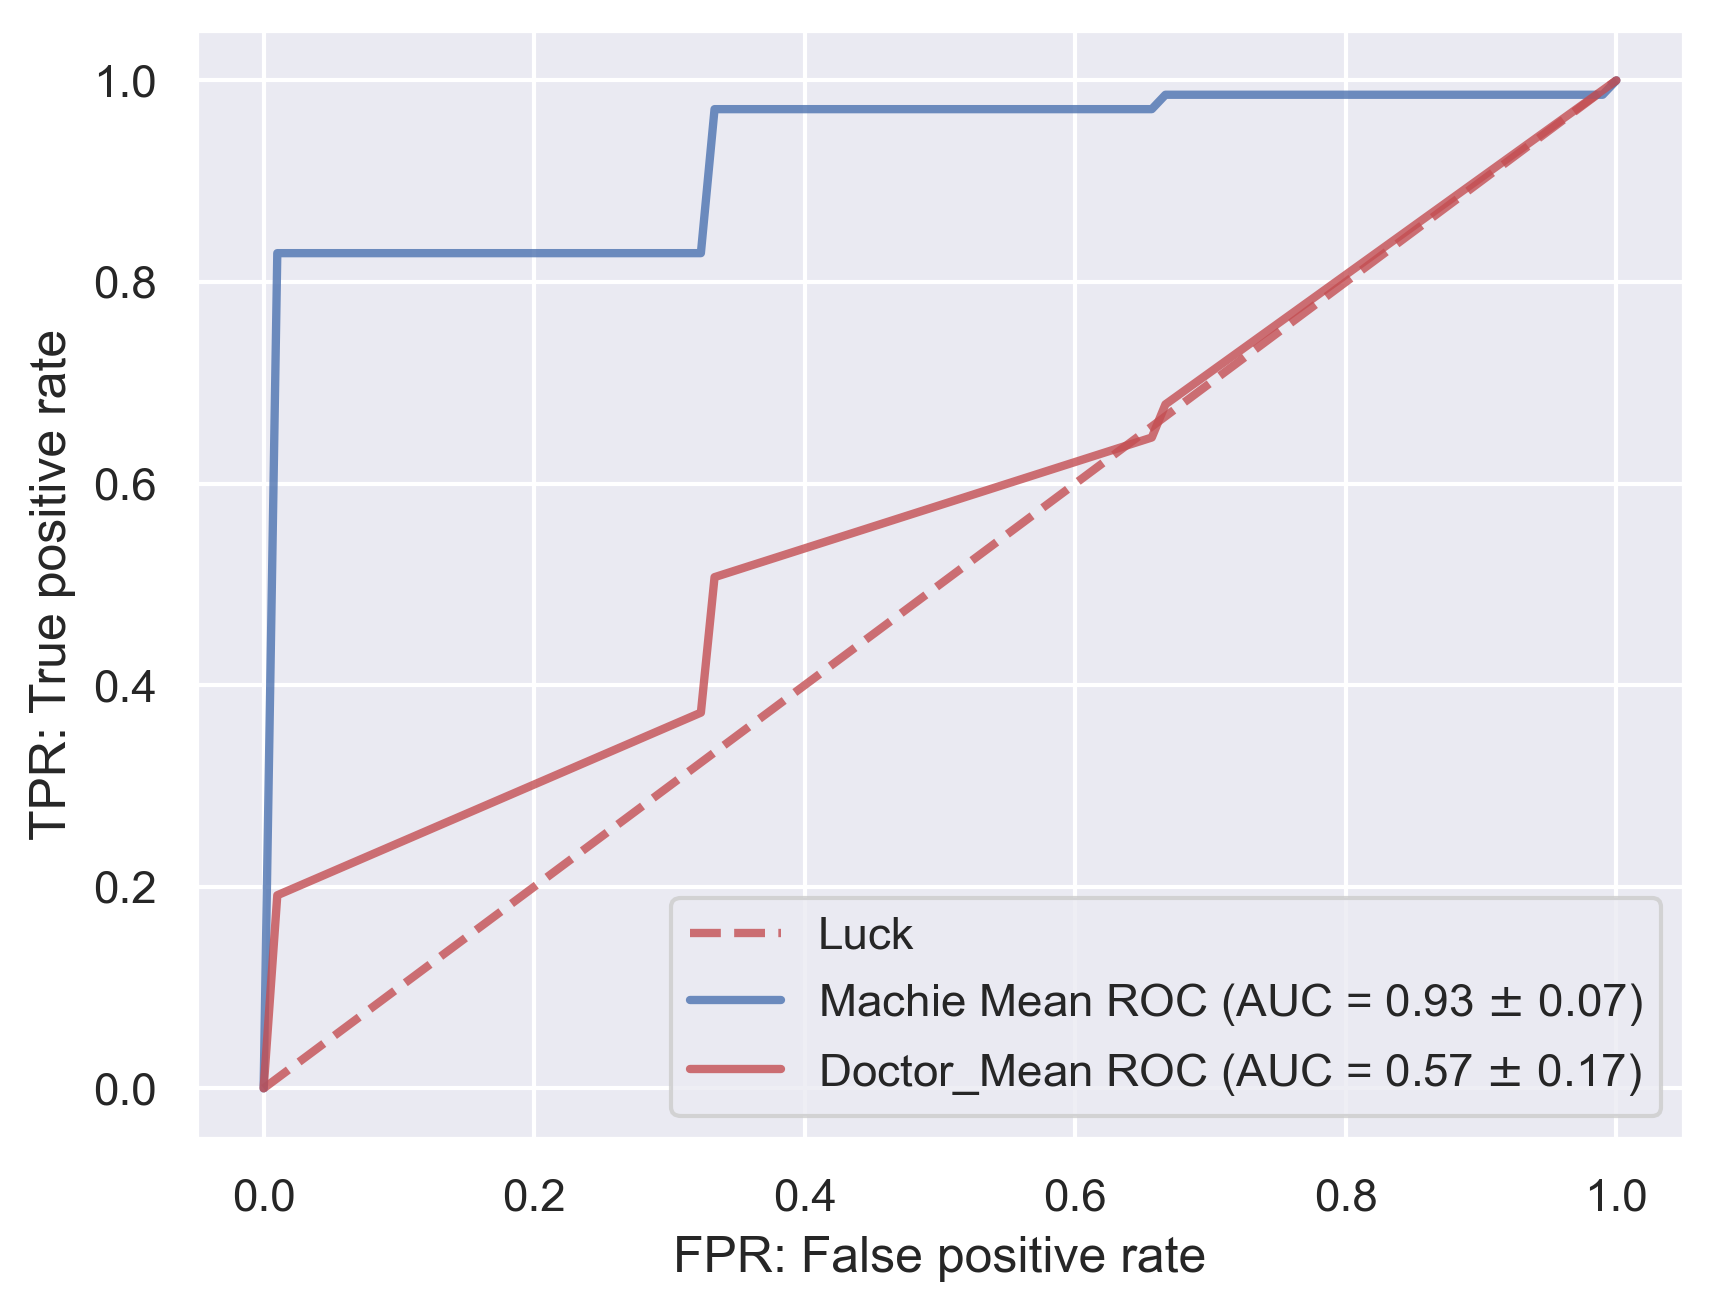

In [38]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(TPRS, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(AUCS).mean()
std_auc = np.std(AUCS)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Machie Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

plt.plot(doctor_mean_fpr, doctor_TCGA_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_TCGA_mean_auc,
                                                            doctor_TCGA_std),
             lw=2, alpha=.8)   

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/479984716.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/479984716.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/479984716.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/479984716.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486

Text(0, 0.5, 'TPR: True positive rate')

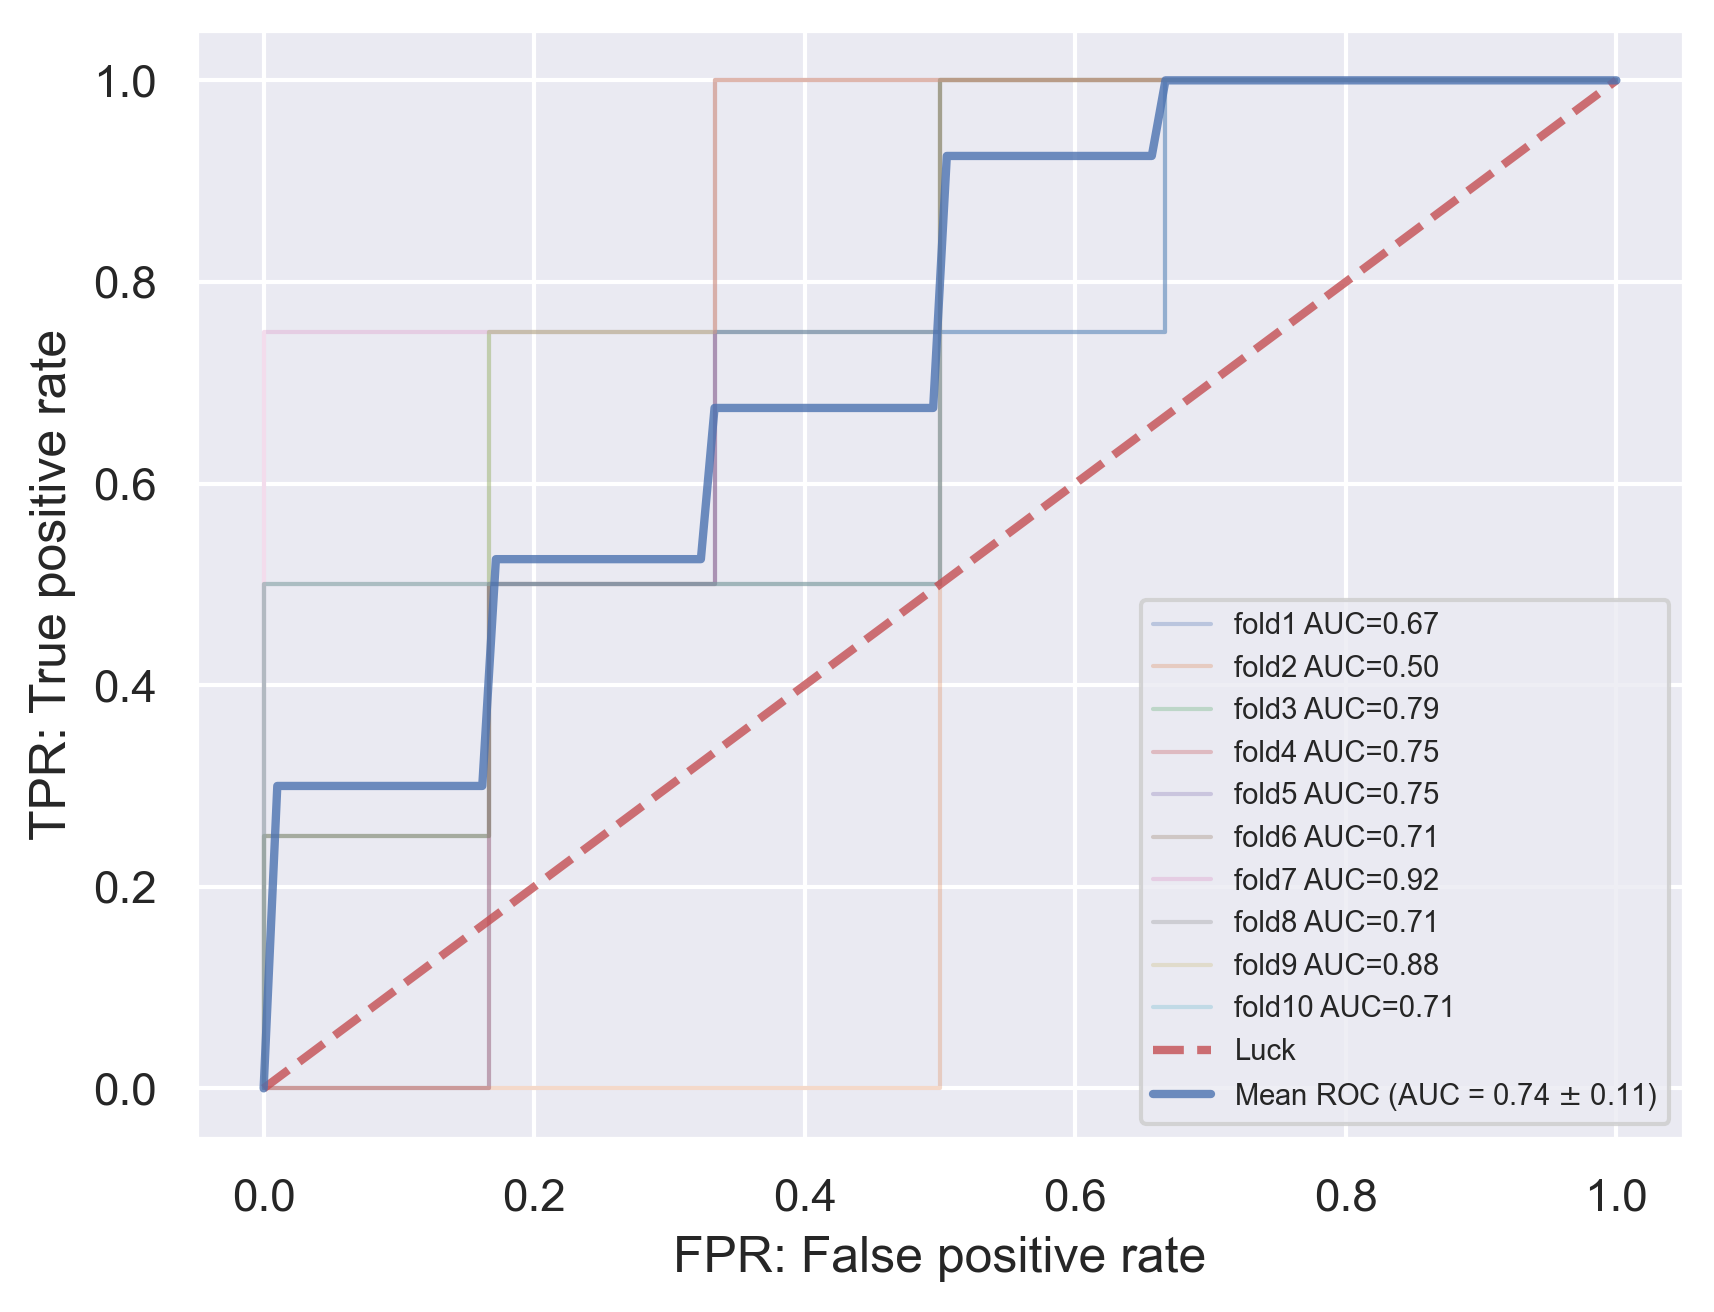

In [39]:
JC_tprs = []
JC_aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(dpi=300)
for i in range(10):
    score_name = 'Score_fold%d'%i
    fpr, tpr, score = get_fpr_tpr(JC_test_sampled_true,cnn_JC_test_sampled_merged[score_name])
    plt.plot(fpr, tpr,lw=1, alpha=0.3,label='fold%d AUC=%0.2f'%(i+1, score))
    JC_tprs.append(interp(mean_fpr, fpr, tpr))
    JC_tprs[-1][0] = 0.0
    JC_aucs.append(score)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
cnn_JC_sampled_mean_tpr = np.mean(JC_tprs, axis=0)
cnn_JC_sampled_mean_tpr[-1] = 1.0
cnn_JC_sampled_mean_auc = np.array(JC_aucs).mean()
cnn_JC_sampled_mean_std = np.std(JC_aucs)
plt.plot(mean_fpr, cnn_JC_sampled_mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (cnn_JC_sampled_mean_auc, cnn_JC_sampled_mean_std),
             lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/814826692.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/814826692.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/814826692.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/814826692.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  JC_tprs.append(interp(mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486

Text(0, 0.5, 'TPR: True positive rate')

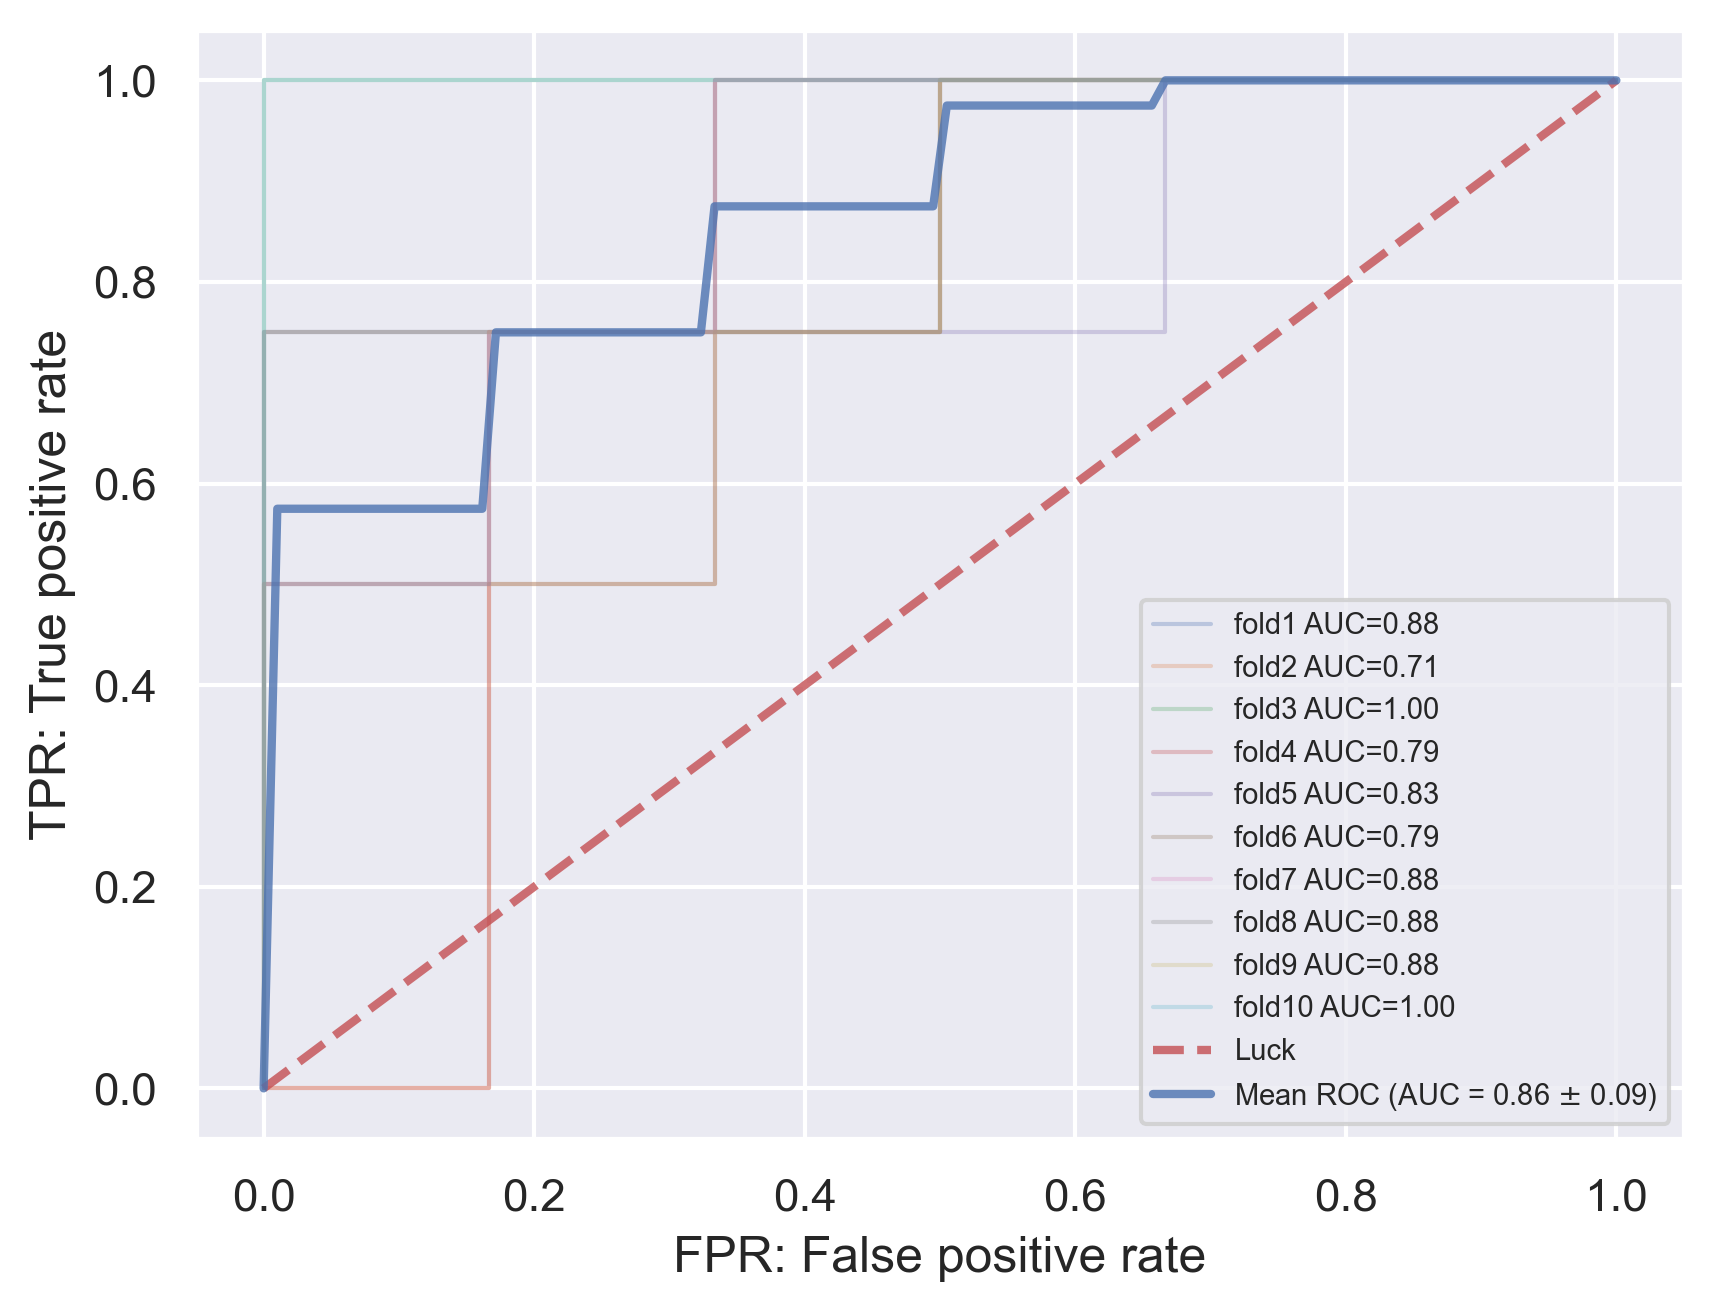

In [40]:
JC_tprs = []
JC_aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(dpi=300)
for i in range(10):
    score_name = 'Score_fold%d'%i
    fpr, tpr, score = get_fpr_tpr(JC_test_sampled_true,vi_JC_test_sampled_merged[score_name])
    plt.plot(fpr, tpr,lw=1, alpha=0.3,label='fold%d AUC=%0.2f'%(i+1, score))
    JC_tprs.append(interp(mean_fpr, fpr, tpr))
    JC_tprs[-1][0] = 0.0
    JC_aucs.append(score)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
vi_JC_sampled_mean_tpr = np.mean(JC_tprs, axis=0)
vi_JC_sampled_mean_tpr[-1] = 1.0
vi_JC_sampled_mean_auc = np.array(JC_aucs).mean()
vi_JC_sampled_mean_std = np.std(JC_aucs)
plt.plot(mean_fpr, vi_JC_sampled_mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (vi_JC_sampled_mean_auc, vi_JC_sampled_mean_std),
             lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

Text(0, 0.5, 'TPR: True positive rate')

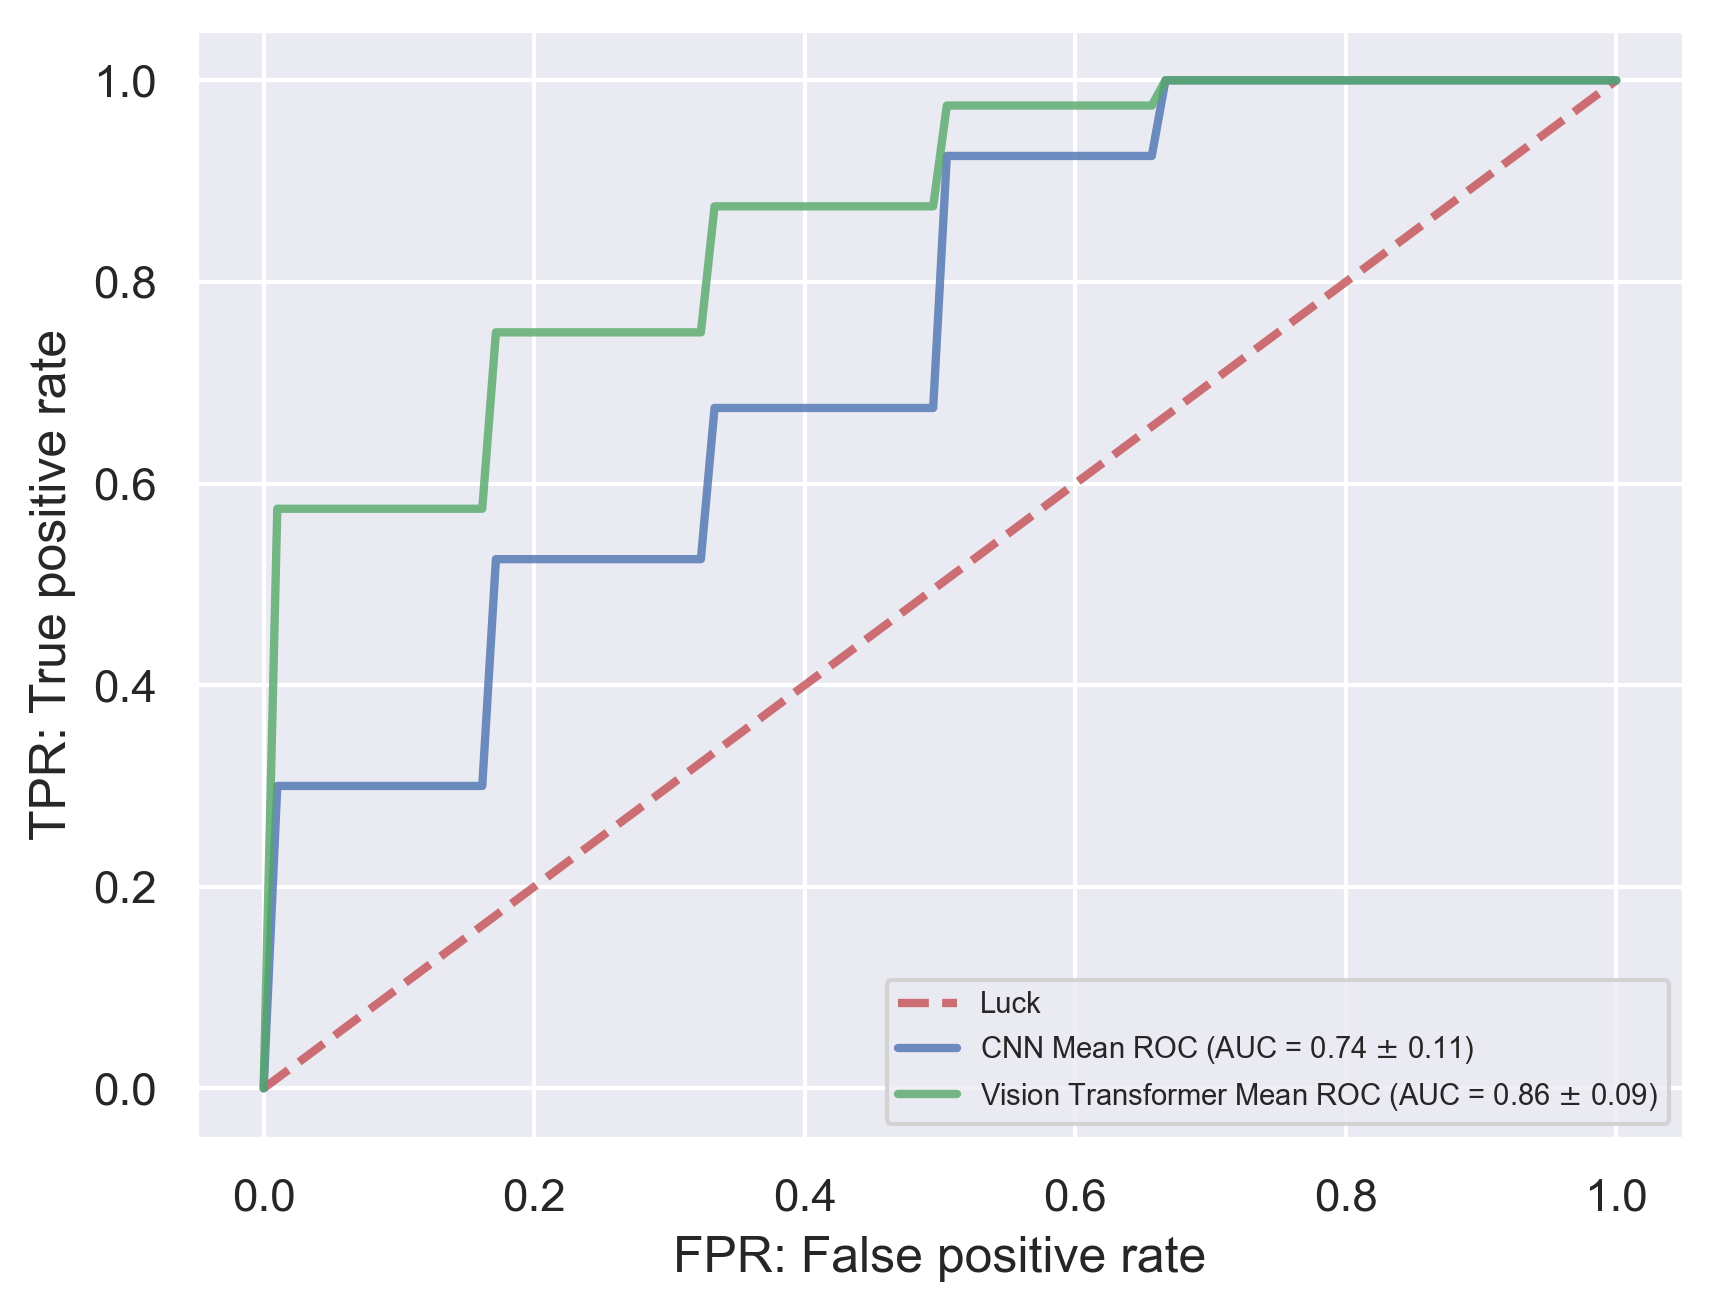

In [41]:
mean_fpr = np.linspace(0, 1, 100)
plt.figure(dpi=300)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
plt.plot(mean_fpr, cnn_JC_sampled_mean_tpr, color='b',
             label=r'CNN Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (cnn_JC_sampled_mean_auc, cnn_JC_sampled_mean_std),
             lw=2, alpha=.8)
plt.plot(mean_fpr, vi_JC_sampled_mean_tpr, color='g',
             label=r'Vision Transformer Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (vi_JC_sampled_mean_auc, vi_JC_sampled_mean_std),
             lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

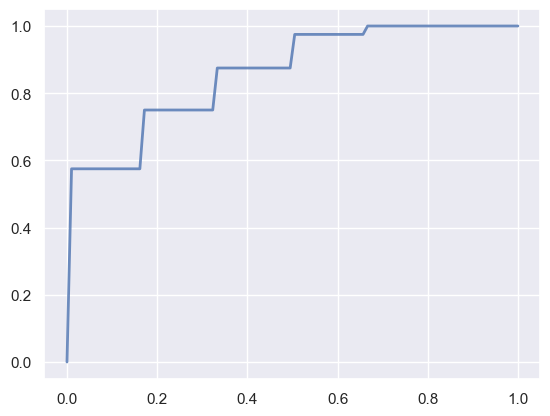

In [42]:
mean_tpr = np.mean(JC_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(JC_aucs).mean()
std_auc = np.std(JC_aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

Text(0, 0.5, 'TPR: True positive rate')

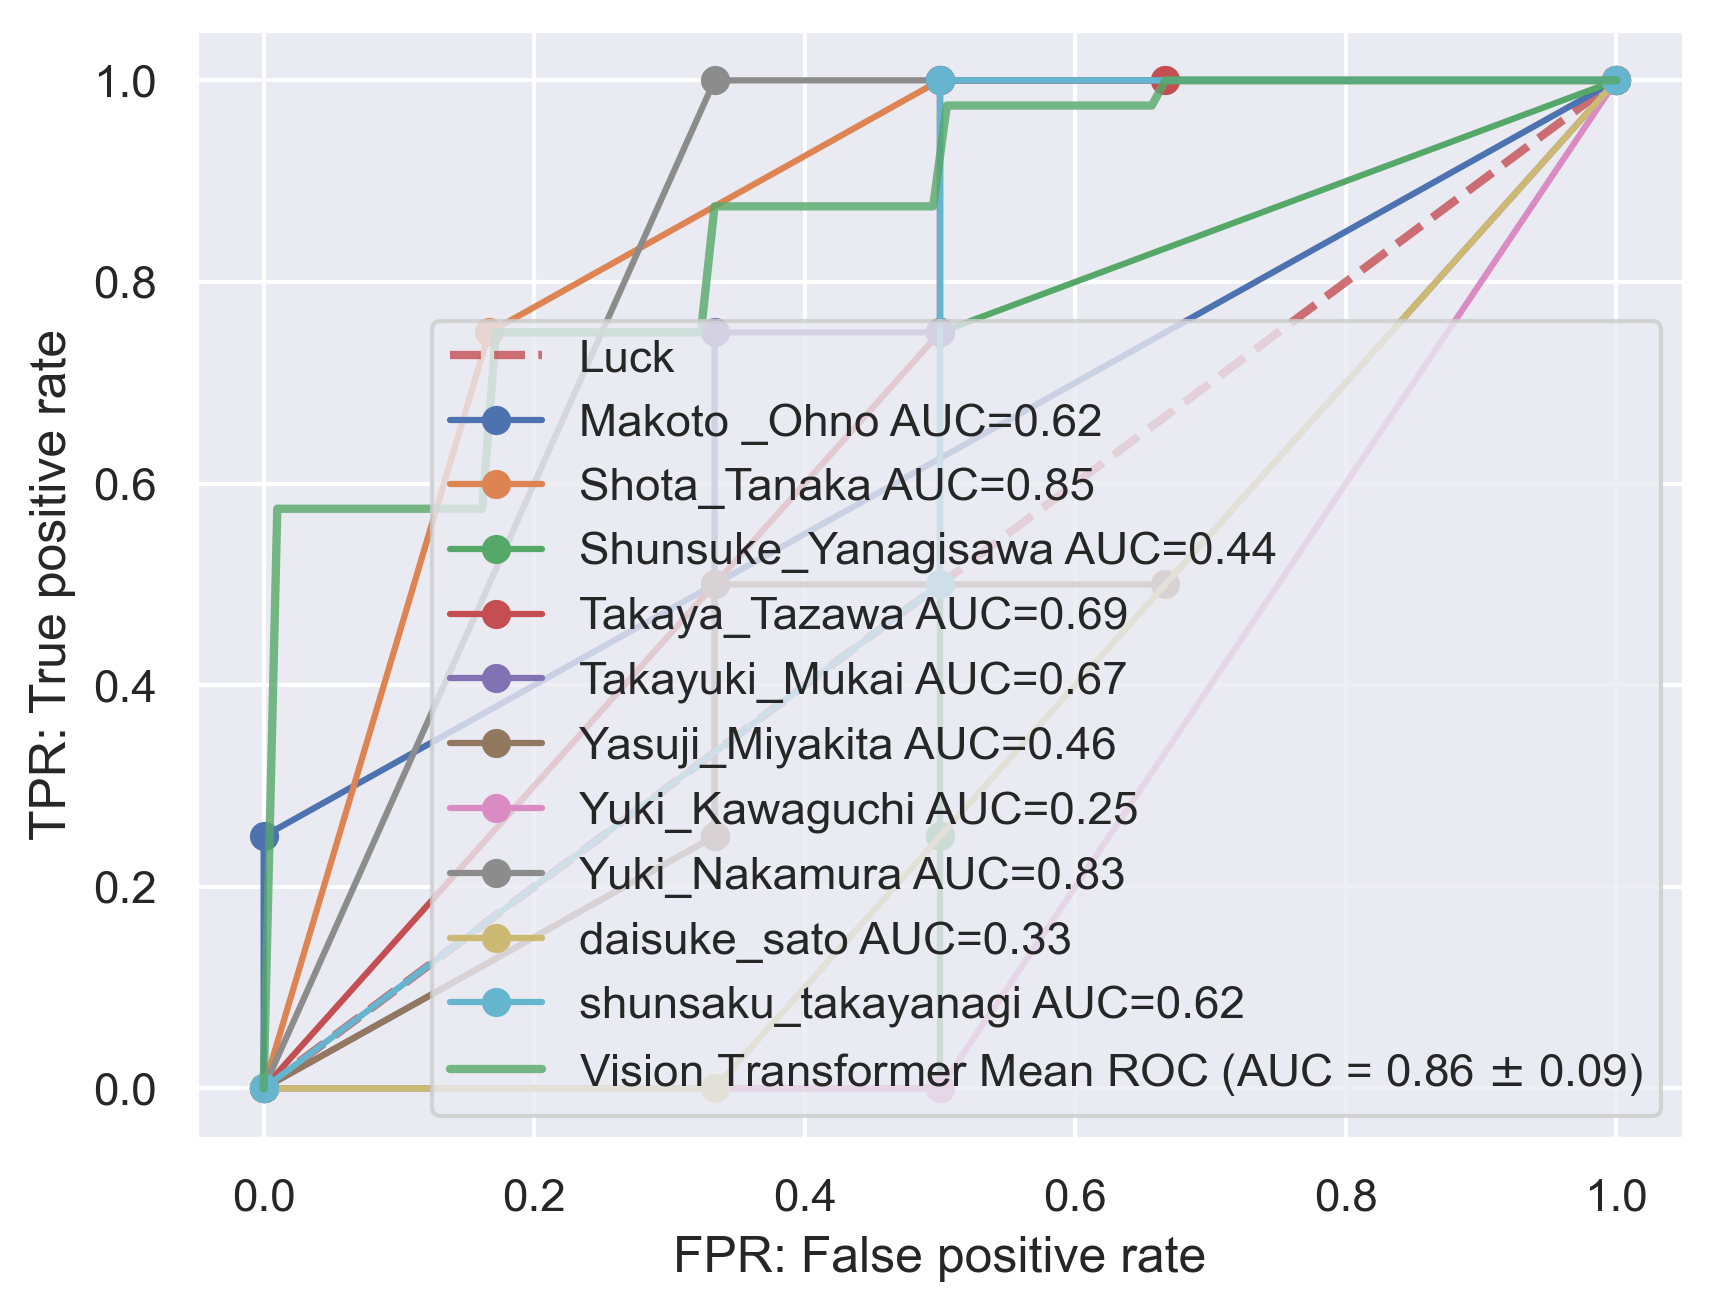

In [43]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    

for i in range(len(Clinicians_JC)):
    cl_name = Clinicians_JC.index[i]
    cl_answer = np.array(Clinicians_JC.iloc[i,:]) 
    plt.plot(get_fpr_tpr(JC_test_sampled_true, cl_answer)[0], 
         get_fpr_tpr(JC_test_sampled_true, cl_answer)[1], marker='o',
        label='%s AUC=%0.2f'%(cl_name, get_fpr_tpr(JC_test_sampled_true, cl_answer)[2]))
plt.plot(mean_fpr, vi_JC_sampled_mean_tpr, color='g',
             label=r'Vision Transformer Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (vi_JC_sampled_mean_auc, vi_JC_sampled_mean_std),
             lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3321598742.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_JC_tprs.append(interp(doctor_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3321598742.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_JC_tprs.append(interp(doctor_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3321598742.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_JC_tprs.append(interp(doctor_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/3321598742.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  doctor_JC_tprs.append(interp(doctor_mean_fpr, fpr, tpr))


Text(0, 0.5, 'TPR: True positive rate')

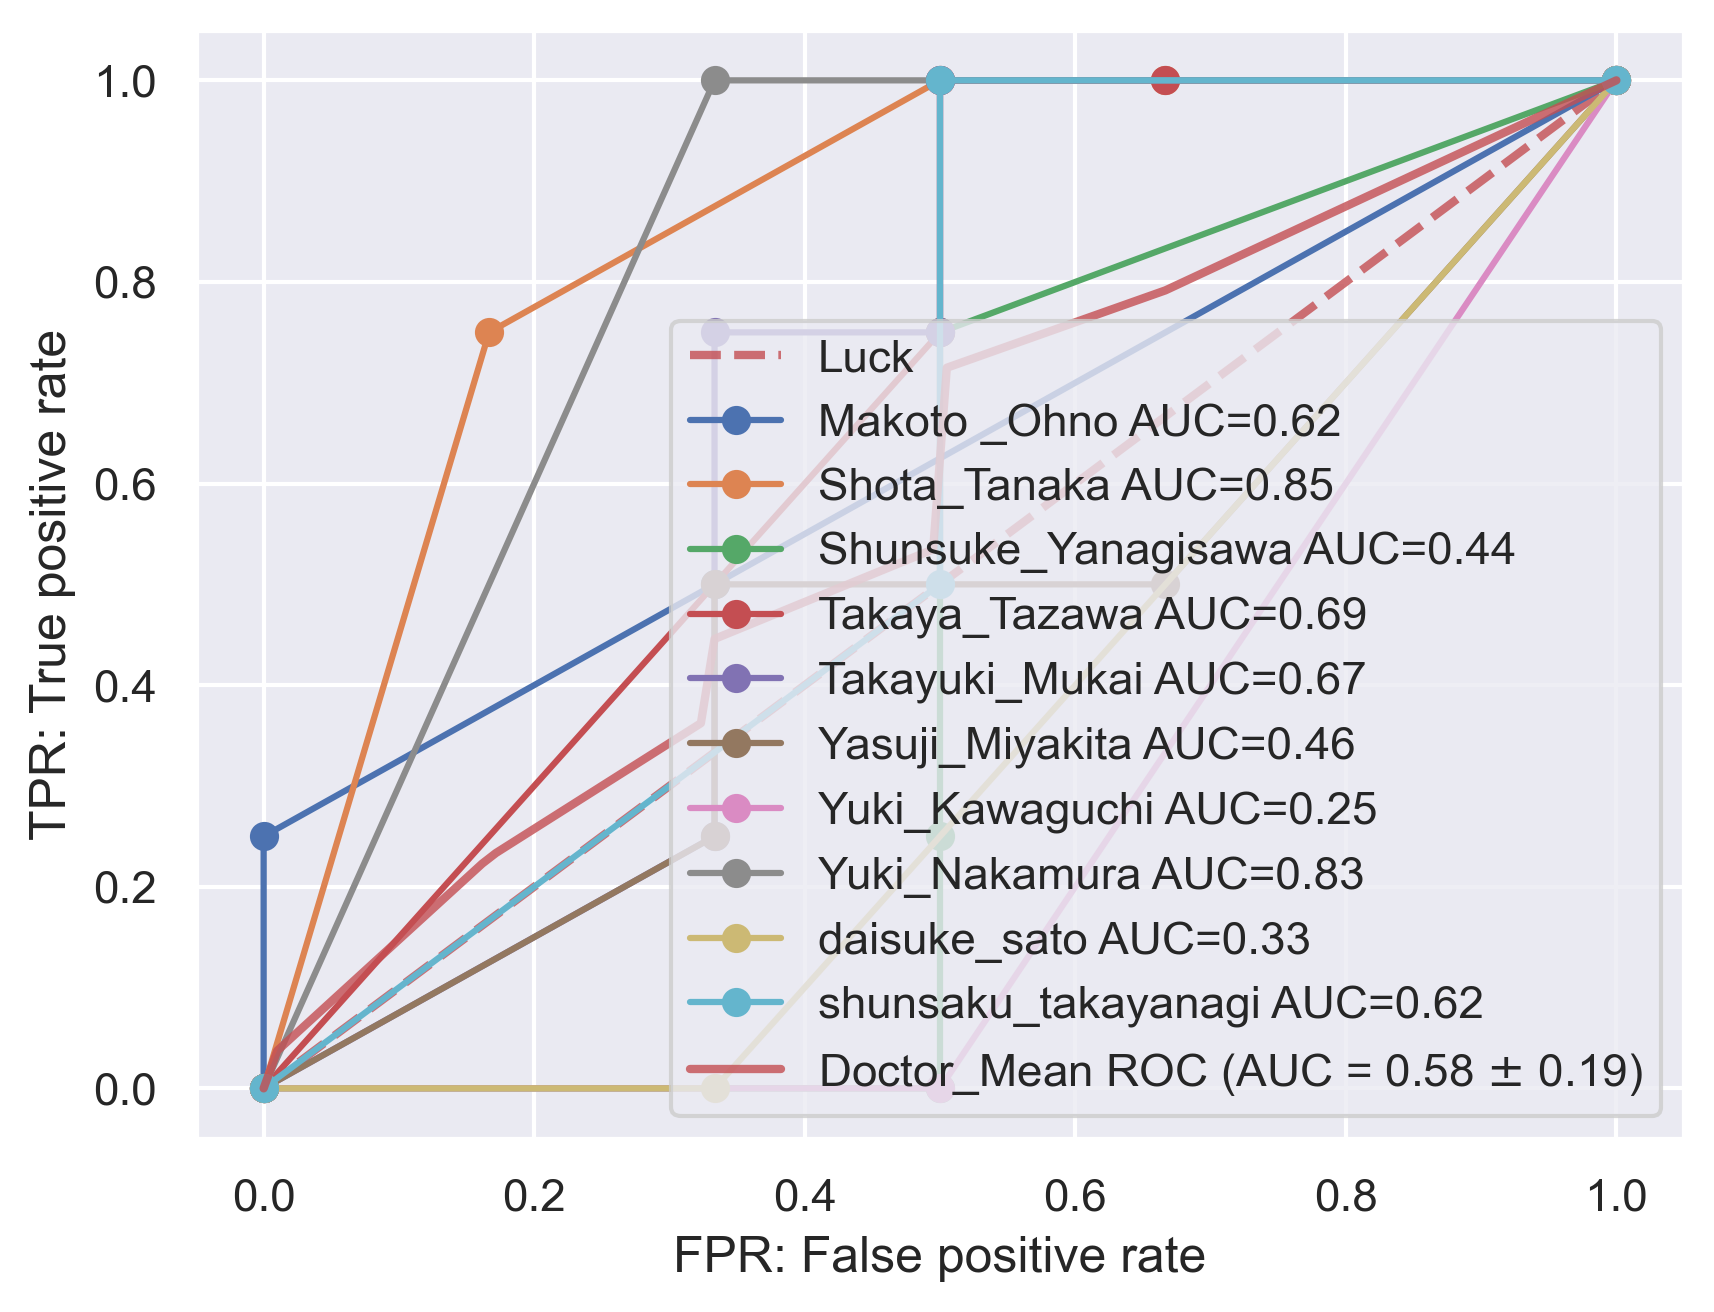

In [44]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

doctor_JC_tprs = []
doctor_JC_aucs = []
doctor_mean_fpr = np.linspace(0, 1, 100)
for i in range(len(Clinicians_JC)):
    cl_name = Clinicians_JC.index[i]
    cl_answer = np.array(Clinicians_JC.iloc[i,:])
    fpr, tpr, score = get_fpr_tpr(JC_test_sampled_true, cl_answer)
    plt.plot(fpr, tpr, marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))
    doctor_JC_tprs.append(interp(doctor_mean_fpr, fpr, tpr))
    doctor_JC_tprs[-1][0] = 0.0
    doctor_JC_aucs.append(score)

doctor_mean_tpr = np.mean(doctor_JC_tprs, axis=0)
doctor_mean_tpr[-1] = 1.0
doctor_mean_auc = np.array(doctor_JC_aucs).mean()
doctor_JC_sampled_std = np.std(doctor_JC_aucs)
plt.plot(doctor_mean_fpr, doctor_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_mean_auc,
                                                            doctor_JC_sampled_std),
             lw=2, alpha=.8)    
    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

Text(0, 0.5, 'TPR: True positive rate')

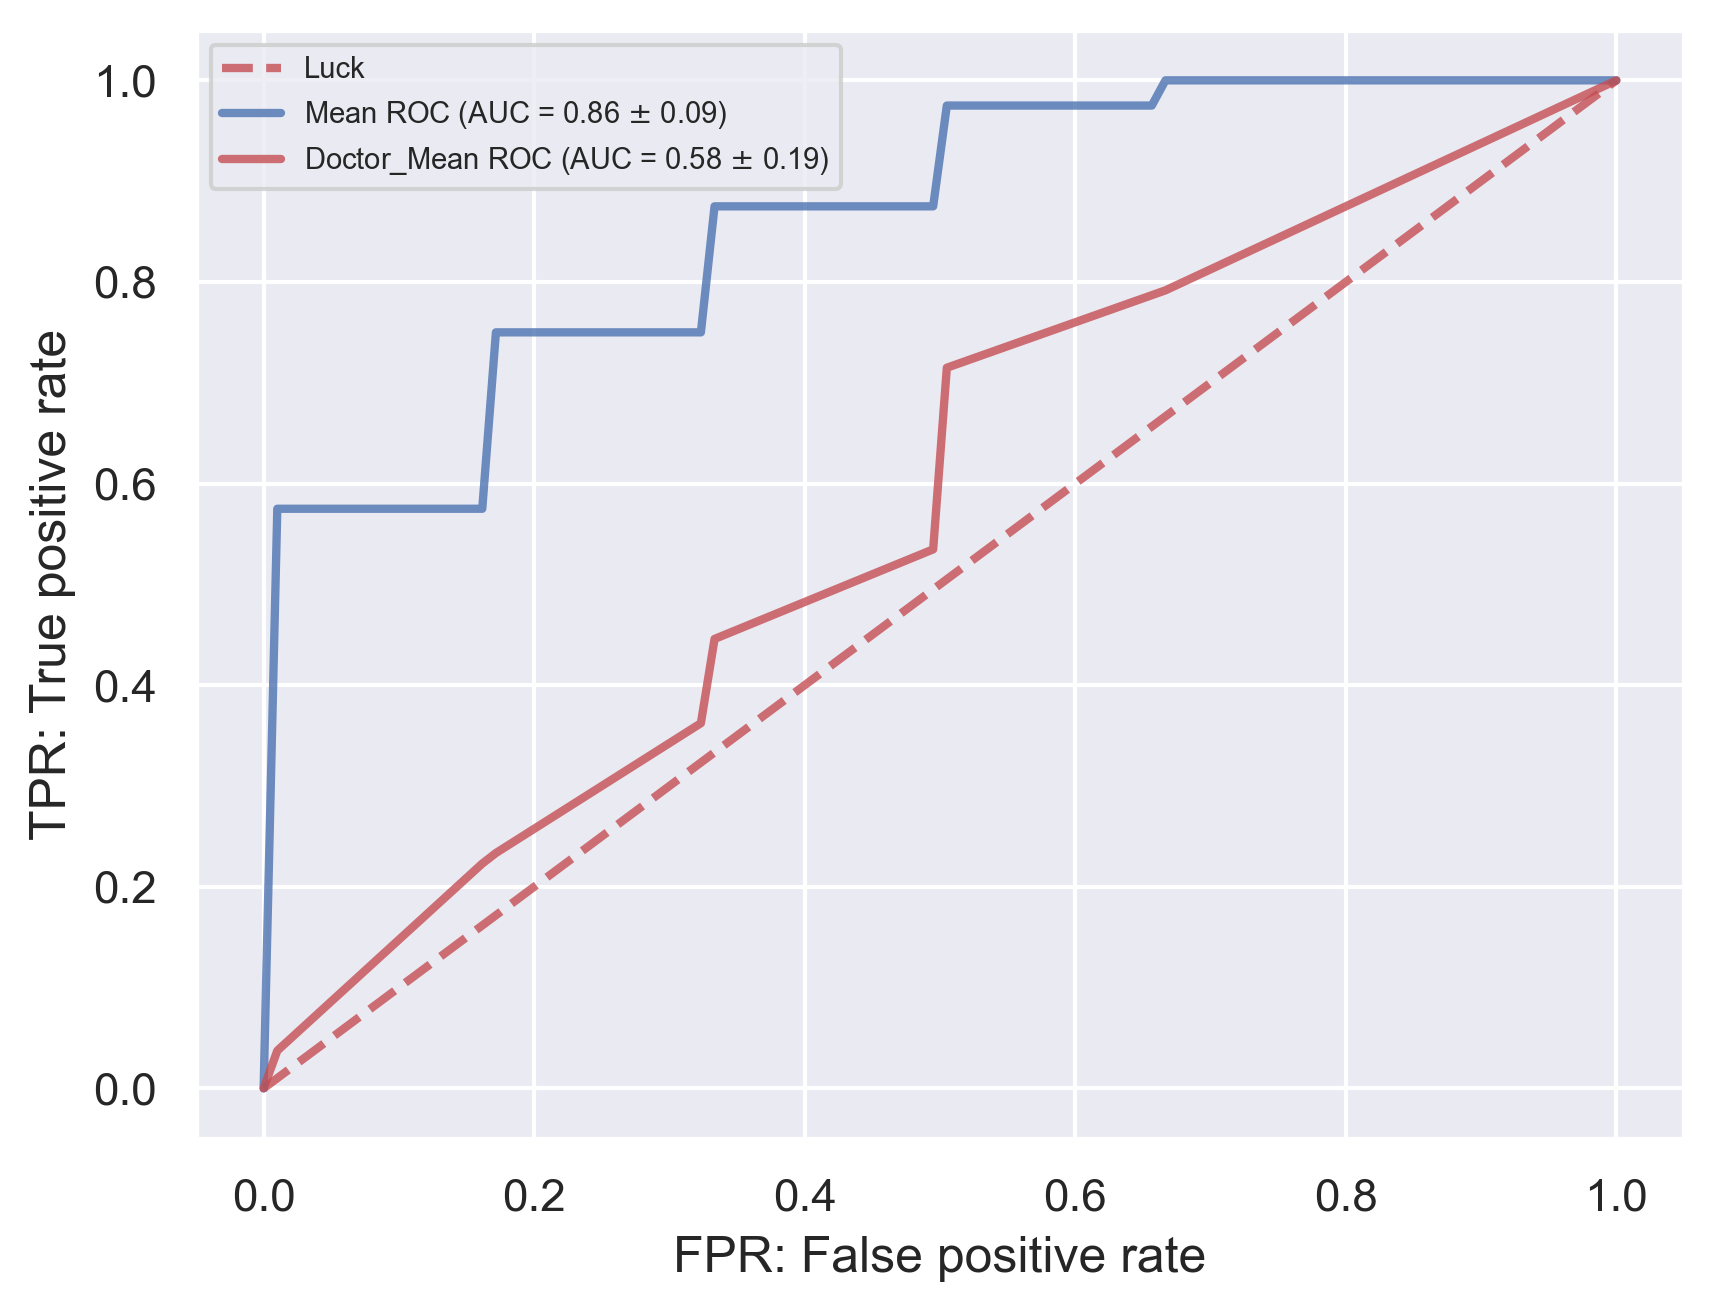

In [45]:
plt.figure(dpi=300)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(JC_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(JC_aucs).mean()
std_auc = np.std(JC_aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
doctor_JC_sampled_mean_tpr = np.mean(doctor_JC_tprs, axis=0)
doctor_JC_sampled_mean_tpr[-1] = 1.0
doctor_JC_sampled_mean_auc = np.array(doctor_JC_aucs).mean()
doctor_std_auc = np.std(doctor_JC_aucs)
plt.plot(doctor_mean_fpr, doctor_JC_sampled_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_JC_sampled_mean_auc,
                                                            doctor_std_auc),
             lw=2, alpha=.8) 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2900265298.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_JC_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2900265298.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_JC_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2900265298.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_JC_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/2900265298.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pro_JC_tprs.append(interp(pro_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d

Text(0, 0.5, 'TPR: True positive rate')

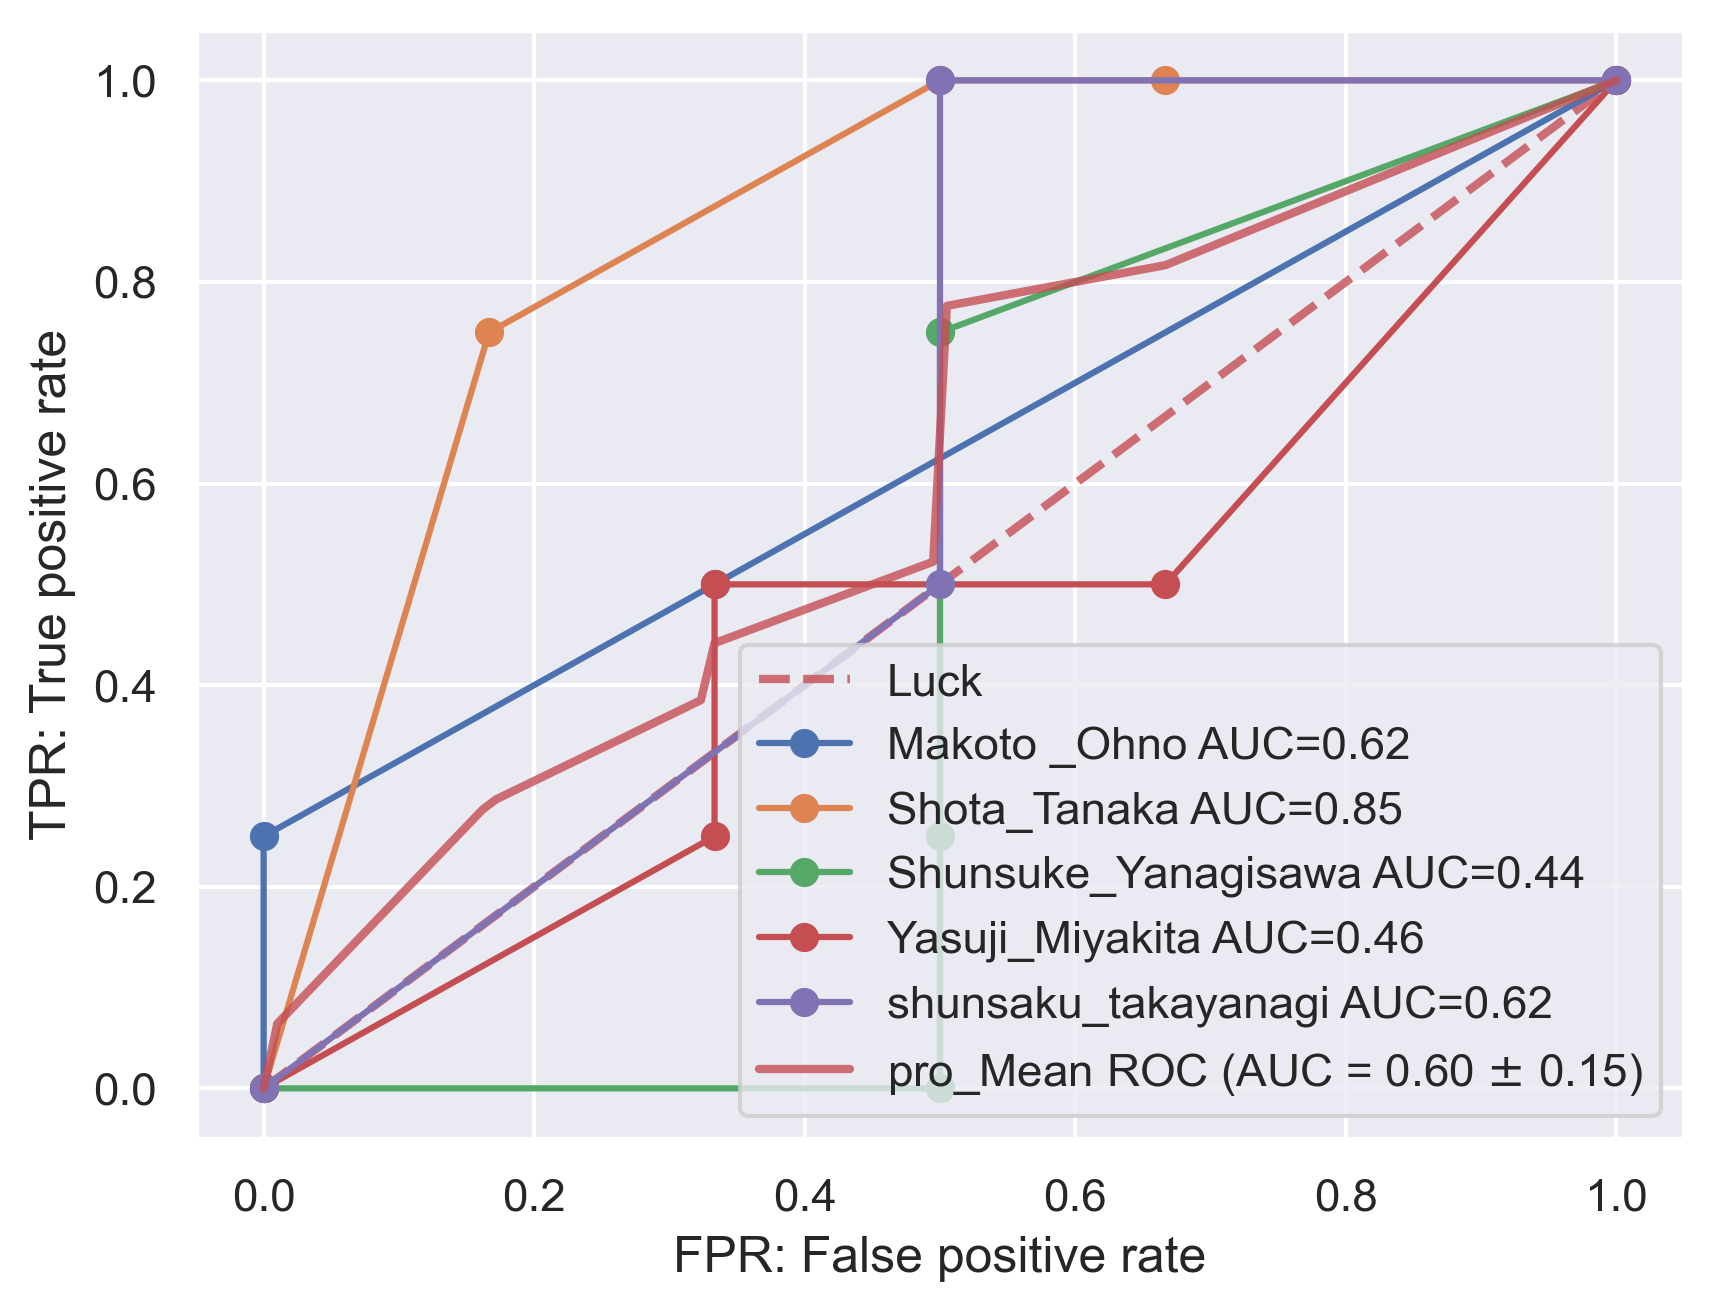

In [46]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

pro_JC_tprs = []
pro_JC_aucs = []
pro_mean_fpr = np.linspace(0, 1, 100)
for i in range(len(pro_JC)):
    cl_name = pro_JC.index[i]
    cl_answer = np.array(pro_JC.iloc[i,:])
    fpr, tpr, score = get_fpr_tpr(JC_test_sampled_true, cl_answer)
    plt.plot(fpr, tpr, marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))
    pro_JC_tprs.append(interp(pro_mean_fpr, fpr, tpr))
    pro_JC_tprs[-1][0] = 0.0
    pro_JC_aucs.append(score)

pro_mean_tpr = np.mean(pro_JC_tprs, axis=0)
pro_mean_tpr[-1] = 1.0
pro_mean_auc = np.array(pro_JC_aucs).mean()
pro_std_auc = np.std(pro_JC_aucs)
plt.plot(pro_mean_fpr, pro_mean_tpr, color='r',
             label=r'pro_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (pro_mean_auc,
                                                            pro_std_auc),
             lw=2, alpha=.8)    
    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/585684338.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_JC_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/585684338.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_JC_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/585684338.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_JC_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb98f7vm8dkhkvw0000gn/T/ipykernel_53486/585684338.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  big_JC_tprs.append(interp(big_mean_fpr, fpr, tpr))
/var/folders/yw/qz00x75d7kb9

Text(0, 0.5, 'TPR: True positive rate')

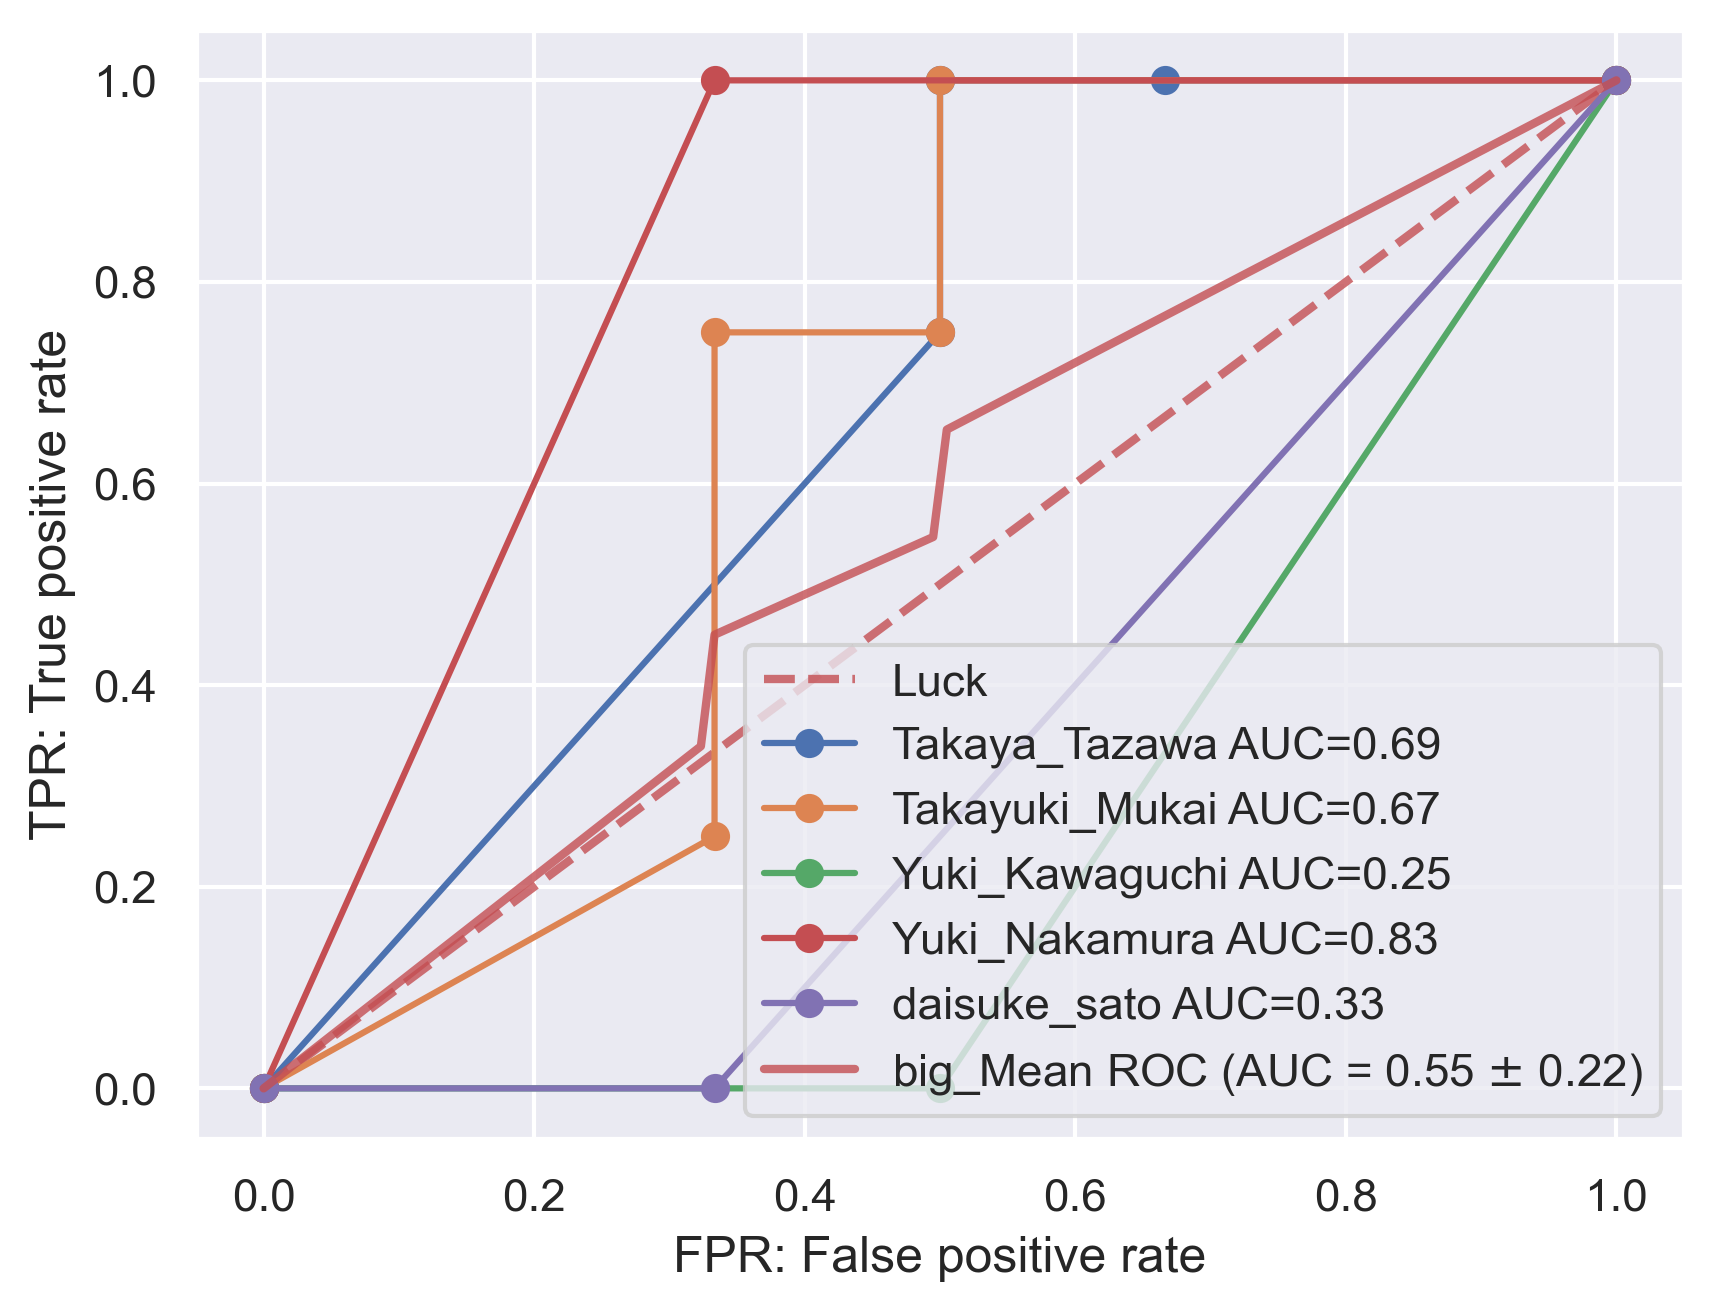

In [47]:
plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

big_JC_tprs = []
big_JC_aucs = []
big_mean_fpr = np.linspace(0, 1, 100)
for i in range(len(big_JC)):
    cl_name = big_JC.index[i]
    cl_answer = np.array(big_JC.iloc[i,:])
    fpr, tpr, score = get_fpr_tpr(JC_test_sampled_true, cl_answer)
    plt.plot(fpr, tpr, marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))
    big_JC_tprs.append(interp(big_mean_fpr, fpr, tpr))
    big_JC_tprs[-1][0] = 0.0
    big_JC_aucs.append(score)

big_mean_tpr = np.mean(big_JC_tprs, axis=0)
big_mean_tpr[-1] = 1.0
big_mean_auc = np.array(big_JC_aucs).mean()
big_std_auc = np.std(big_JC_aucs)
plt.plot(big_mean_fpr, big_mean_tpr, color='r',
             label=r'big_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (big_mean_auc,
                                                            big_std_auc),
             lw=2, alpha=.8)    
    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

Text(0, 0.5, 'TPR: True positive rate')

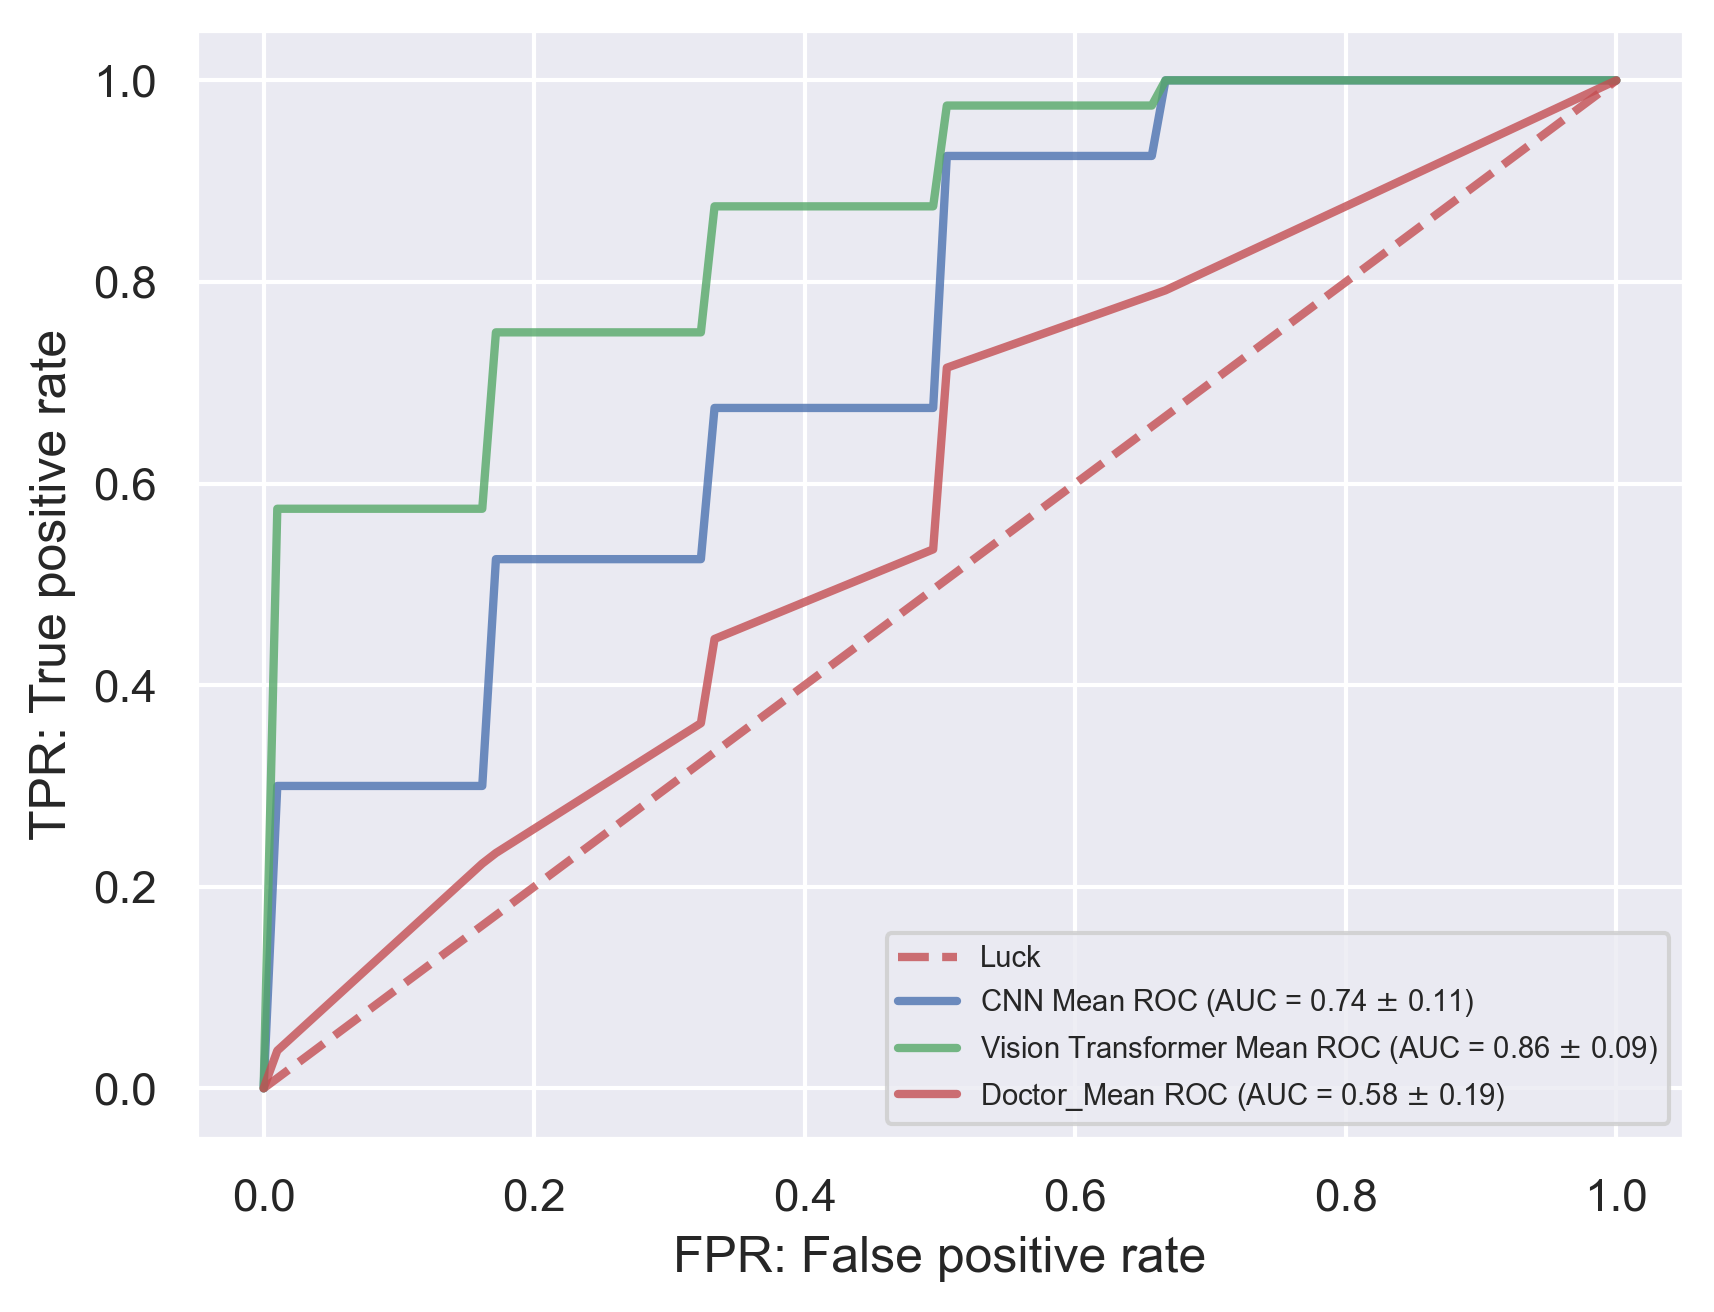

In [48]:
mean_fpr = np.linspace(0, 1, 100)
plt.figure(dpi=300)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
plt.plot(mean_fpr, cnn_JC_sampled_mean_tpr, color='b',
             label=r'CNN Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (cnn_JC_sampled_mean_auc, cnn_JC_sampled_mean_std),
             lw=2, alpha=.8)
plt.plot(mean_fpr, vi_JC_sampled_mean_tpr, color='g',
             label=r'Vision Transformer Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (vi_JC_sampled_mean_auc, vi_JC_sampled_mean_std),
             lw=2, alpha=.8)
plt.plot(doctor_mean_fpr, doctor_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_mean_auc,
                                                            doctor_JC_sampled_std),
             lw=2, alpha=.8)  
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

# For clinicians letter

In [49]:
Clinicians_JC

0     1     2     3     4     5     6     7     8  \
Makoto _Ohno         0.75  0.25  0.25  0.25  0.25  0.25  0.75  0.75  0.25   
Shota_Tanaka         0.00  0.75  0.25  1.00  0.75  0.75  1.00  1.00  0.00   
Shunsuke_Yanagisawa  0.00  0.25  1.00  0.25  0.00  1.00  1.00  0.00  0.00   
Takaya_Tazawa        0.25  1.00  1.00  1.00  0.00  1.00  1.00  0.75  0.00   
Takayuki_Mukai       0.00  0.75  1.00  1.00  0.00  1.00  0.50  0.75  0.00   
Yasuji_Miyakita      0.00  0.75  0.25  1.00  0.00  1.00  1.00  0.00  0.25   
Yuki_Kawaguchi       0.75  0.25  0.25  0.25  0.75  0.25  0.25  0.25  0.75   
Yuki_Nakamura        1.00  1.00  0.50  1.00  0.00  1.00  0.50  1.00  0.00   
daisuke_sato         0.25  0.00  0.00  0.00  0.00  0.75  0.75  0.25  0.25   
shunsaku_takayanagi  0.00  0.75  1.00  1.00  0.00  1.00  1.00  0.75  0.00   

                        9  
Makoto _Ohno         1.00  
Shota_Tanaka         1.00  
Shunsuke_Yanagisawa  0.75  
Takaya_Tazawa        1.00  
Takayuki_Mukai       0.25  
Yasuji_Miyakita      0.00  
Yuki_Kawaguchi       0.25  
Yuki_Nakamura        1.00  
daisuke_sato         0.25  
shunsaku_takayanagi  1.00

Text(0, 0.5, 'TPR: True positive rate')

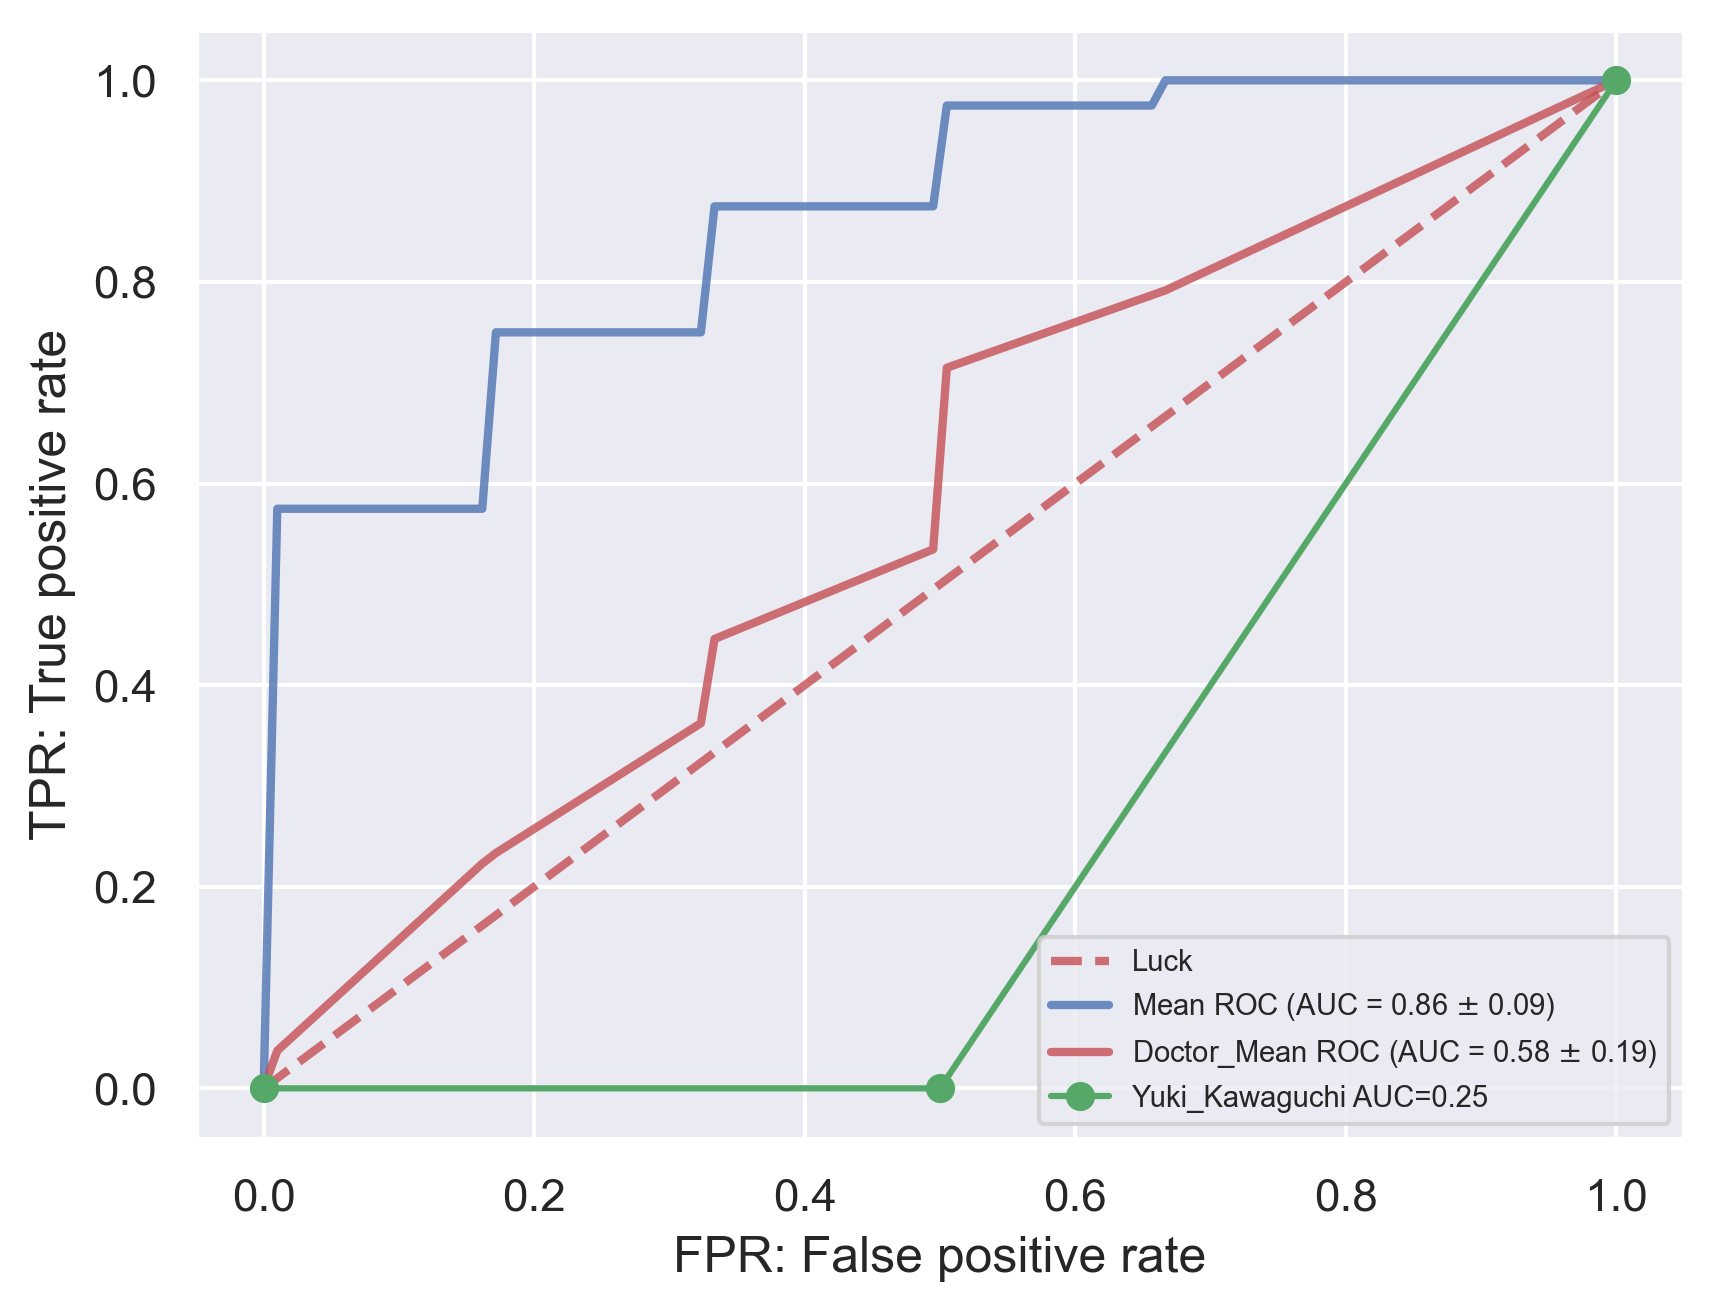

In [50]:
i=6

plt.figure(dpi=300)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(JC_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(JC_aucs).mean()
std_auc = np.std(JC_aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
doctor_mean_tpr = np.mean(doctor_JC_tprs, axis=0)
doctor_mean_tpr[-1] = 1.0
doctor_mean_auc = np.array(doctor_JC_aucs).mean()
doctor_std_auc = np.std(doctor_JC_aucs)
plt.plot(doctor_mean_fpr, doctor_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_mean_auc,
                                                            doctor_std_auc),
             lw=2, alpha=.8)

cl_name = Clinicians_JC.index[i]
cl_answer = np.array(Clinicians_JC.iloc[i,:])
fpr, tpr, score = get_fpr_tpr(JC_test_sampled_true, cl_answer)
plt.plot(fpr, tpr, color='g',marker='o',
        label='%s AUC=%0.2f'%(cl_name, score))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize =7)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

In [51]:
JC_aucs_on_JC_lw = [1.0,
 0.5416666666666667,
 0.75,
 1.0,
 0.75,
 0.875,
 0.9583333333333334,
 0.875,
 0.7083333333333333,
 0.8333333333333333]

JC_mean_tpr_on_JC_lw = np.array([0.   , 0.475, 0.475, 0.475, 0.475, 0.475, 0.475, 0.475, 0.475,
       0.475, 0.475, 0.475, 0.475, 0.475, 0.475, 0.475, 0.475, 0.75 ,
       0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.8  , 0.8  , 0.8  ,
       0.8  , 0.8  , 0.8  , 0.8  , 0.8  , 0.8  , 0.8  , 0.8  , 0.8  ,
       0.8  , 0.8  , 0.8  , 0.8  , 0.8  , 0.95 , 0.95 , 0.95 , 0.95 ,
       0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 ,
       0.95 , 0.95 , 0.95 , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [52]:
mean_fpr

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

Text(0, 0.5, 'TPR: True positive rate')

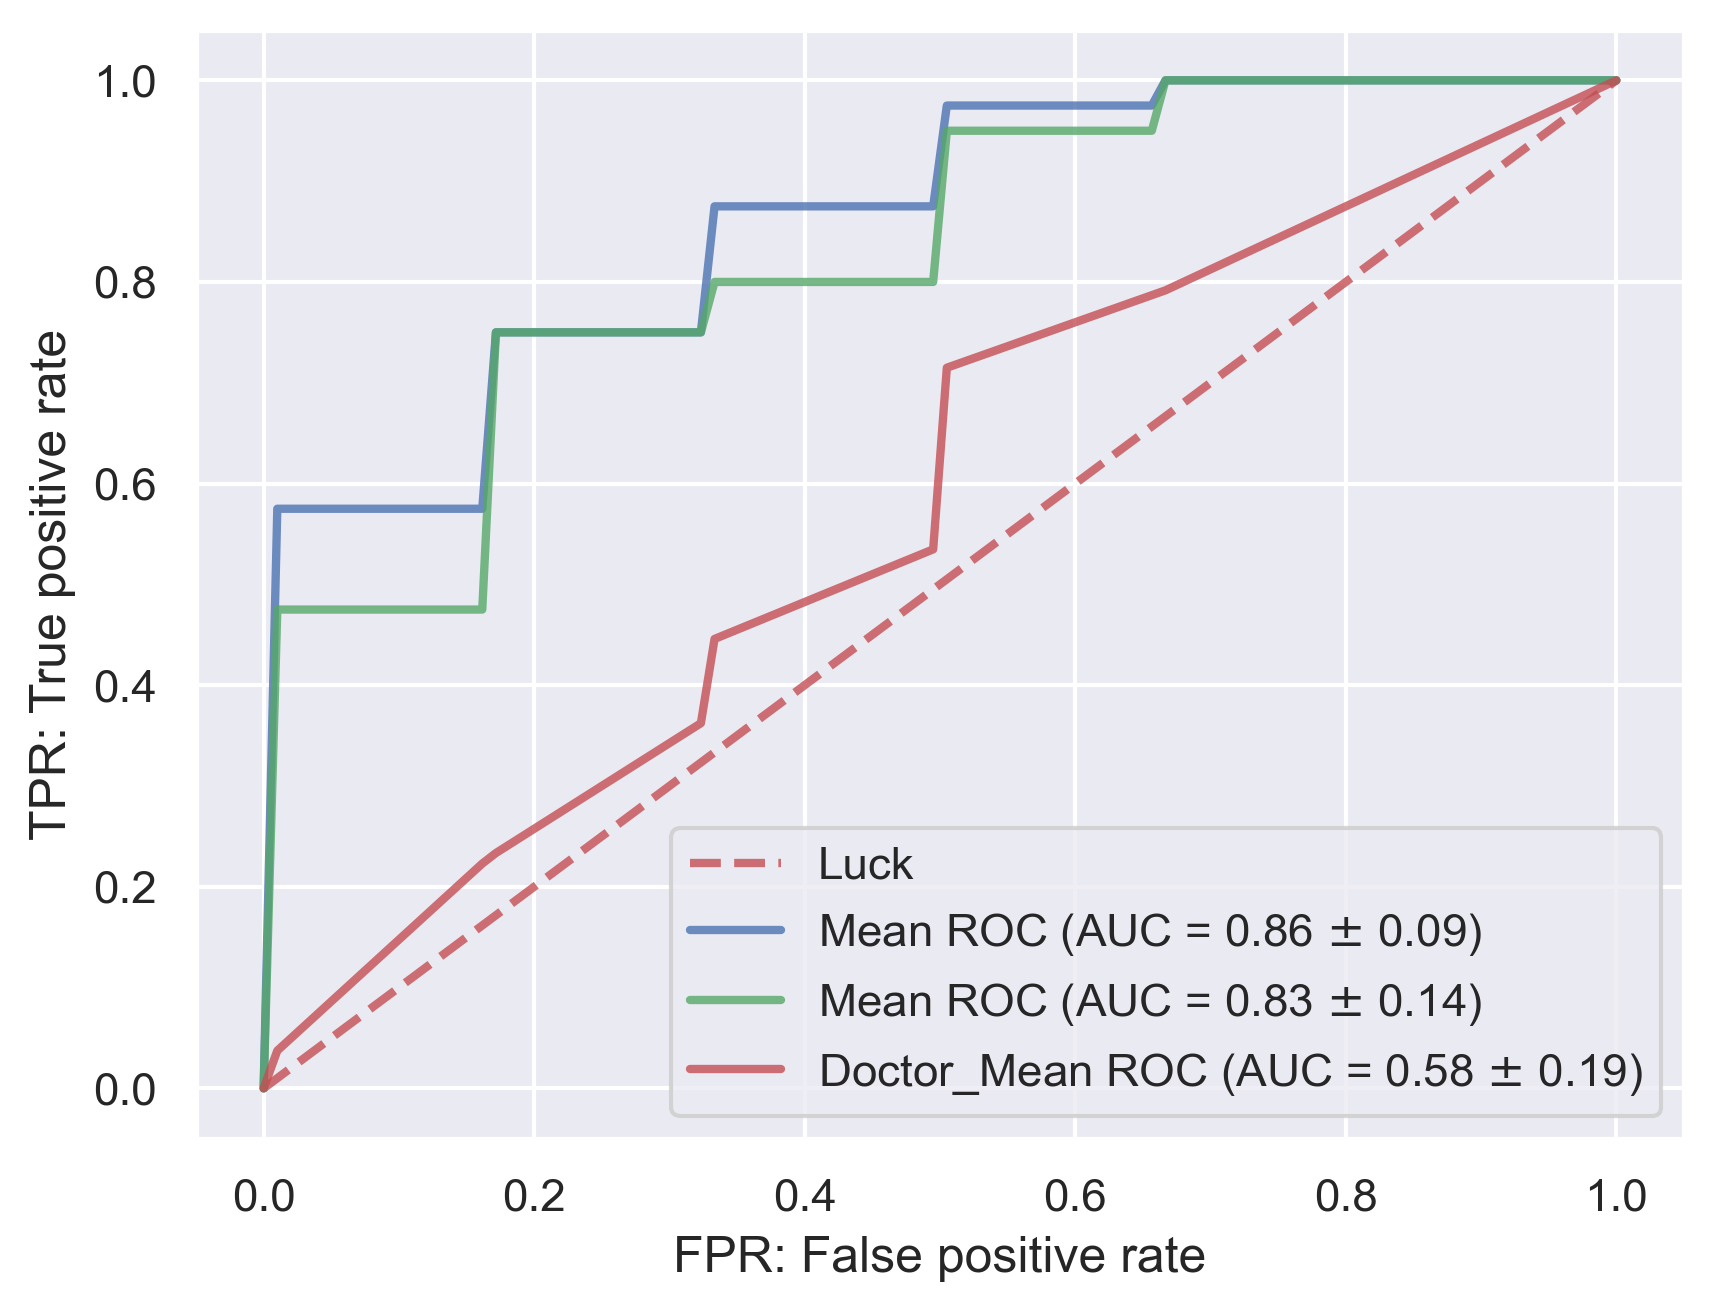

In [53]:

plt.figure(dpi=300)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(JC_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.array(JC_aucs).mean()
std_auc = np.std(JC_aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

mean_auc_on_JC_lw = np.array(JC_aucs_on_JC_lw).mean()
std_auc_on_JC_lw = np.std(JC_aucs_on_JC_lw)
plt.plot(mean_fpr, JC_mean_tpr_on_JC_lw, color='g',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_on_JC_lw, std_auc_on_JC_lw),
             lw=2, alpha=.8)


plt.plot(doctor_mean_fpr, doctor_mean_tpr, color='r',
             label=r'Doctor_Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (doctor_mean_auc,
                                                            doctor_std_auc),
             lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

# Calcultate accuracy with threshold

In [54]:
def get_report_with_thresh(true, array, thresh=0.5):
    threshed = np.where(array>thresh, 1, 0)
    accuracy = accuracy_score(true, threshed)
    recall = recall_score(true, threshed)
    f1 = f1_score(true, threshed)
    return accuracy, recall, f1

In [55]:
TCGA_Machine_score

NameError: name 'TCGA_Machine_score' is not defined

In [56]:
TCGA_accuracys =[]
TCGA_recall = []
TCGA_F1 = []
for i in range(10):
    score_name = 'Score_fold%d'%i
    accuracy, recall, f1 = get_report_with_thresh(TCGA_test_true, cnn_TCGA_merged[score_name])
    print('Fold %d: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(i+1, accuracy, recall,f1))
    TCGA_accuracys.append(accuracy)
    TCGA_recall.append(recall)
    TCGA_F1.append(f1)

Fold 1: Accuracy:0.60, recall:0.43, F1:0.60, 
Fold 2: Accuracy:0.60, recall:0.43, F1:0.60, 
Fold 3: Accuracy:0.80, recall:0.71, F1:0.83, 
Fold 4: Accuracy:0.70, recall:0.86, F1:0.80, 
Fold 5: Accuracy:0.80, recall:0.71, F1:0.83, 
Fold 6: Accuracy:0.80, recall:0.71, F1:0.83, 
Fold 7: Accuracy:0.80, recall:0.86, F1:0.86, 
Fold 8: Accuracy:1.00, recall:1.00, F1:1.00, 
Fold 9: Accuracy:0.80, recall:0.86, F1:0.86, 
Fold 10: Accuracy:0.80, recall:0.71, F1:0.83, 


In [57]:
print(np.array(TCGA_accuracys).mean())
print(np.array(TCGA_accuracys).std())
print(np.array(TCGA_recall).mean())
print(np.array(TCGA_recall).std())
print(np.array(TCGA_F1).mean())
print(np.array(TCGA_F1).std())

0.77
0.11000000000000001
0.7285714285714284
0.1743793659390529
0.8047619047619048
0.11434522260231421


In [58]:
TCGA_accuracys =[]
TCGA_recall = []
TCGA_F1 = []
for i in range(10):
    score_name = 'Score_fold%d'%i
    accuracy, recall, f1 = get_report_with_thresh(TCGA_test_true, vi_TCGA_merged[score_name])
    print('Fold %d: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(i+1, accuracy, recall,f1))
    TCGA_accuracys.append(accuracy)
    TCGA_recall.append(recall)
    TCGA_F1.append(f1)

Fold 1: Accuracy:1.00, recall:1.00, F1:1.00, 
Fold 2: Accuracy:0.80, recall:0.86, F1:0.86, 
Fold 3: Accuracy:0.90, recall:0.86, F1:0.92, 
Fold 4: Accuracy:1.00, recall:1.00, F1:1.00, 
Fold 5: Accuracy:0.70, recall:0.57, F1:0.73, 
Fold 6: Accuracy:0.90, recall:0.86, F1:0.92, 
Fold 7: Accuracy:0.90, recall:0.86, F1:0.92, 
Fold 8: Accuracy:0.80, recall:0.71, F1:0.83, 
Fold 9: Accuracy:0.80, recall:0.71, F1:0.83, 
Fold 10: Accuracy:1.00, recall:1.00, F1:1.00, 


In [59]:
print(np.array(TCGA_accuracys).mean())
print(np.array(TCGA_accuracys).std())
print(np.array(TCGA_recall).mean())
print(np.array(TCGA_recall).std())
print(np.array(TCGA_F1).mean())
print(np.array(TCGA_F1).std())

0.8800000000000001
0.09797958971132713
0.8428571428571429
0.13477115902938006
0.902031302031302
0.08492155532209657


In [60]:
for i in range(len(Clinicians_TCGA)):
    cl_name = Clinicians_TCGA.index[i]
    cl_answer = np.array(Clinicians_TCGA.iloc[i,:])
    accuracy, recall, f1 = get_report_with_thresh(TCGA_test_true, cl_answer)
    print('%s: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(cl_name, accuracy, recall,f1))

Makoto_Ohno: Accuracy:0.40, recall:0.29, F1:0.40, 
Shota_Tanaka: Accuracy:0.80, recall:0.71, F1:0.83, 
Shunsuke_Yanagisawa: Accuracy:0.30, recall:0.29, F1:0.36, 
Takaya_Tazawa: Accuracy:0.60, recall:0.57, F1:0.67, 
Takayuki_Mukai: Accuracy:0.60, recall:0.57, F1:0.67, 
Yasuji_Miyakita: Accuracy:0.60, recall:0.57, F1:0.67, 
Yuki_Kawaguchi: Accuracy:0.20, recall:0.14, F1:0.20, 
Yuki_Nakamura: Accuracy:0.50, recall:0.43, F1:0.55, 
daisuke_sato: Accuracy:0.40, recall:0.29, F1:0.40, 
shunsaku_takayanagi: Accuracy:0.60, recall:0.57, F1:0.67, 


In [61]:
pro_TCGA_accuracys =[]
pro_TCGA_recall = []
pro_TCGA_F1 = []
for i in range(len(pro_TCGA)):
    cl_name = pro_TCGA.index[i]
    cl_answer = np.array(pro_TCGA.iloc[i,:])
    accuracy, recall, f1 = get_report_with_thresh(TCGA_test_true, cl_answer)
    print('%s: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(cl_name, accuracy, recall,f1))
    pro_TCGA_accuracys.append(accuracy)
    pro_TCGA_recall.append(recall)
    pro_TCGA_F1.append(f1)
    
big_TCGA_accuracys =[]
big_TCGA_recall = []
big_TCGA_F1 = []
for i in range(len(big_TCGA)):
    cl_name = big_TCGA.index[i]
    cl_answer = np.array(big_TCGA.iloc[i,:])
    accuracy, recall, f1 = get_report_with_thresh(TCGA_test_true, cl_answer)
    print('%s: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(cl_name, accuracy, recall,f1))
    big_TCGA_accuracys.append(accuracy)
    big_TCGA_recall.append(recall)
    big_TCGA_F1.append(f1)

Makoto_Ohno: Accuracy:0.40, recall:0.29, F1:0.40, 
Shota_Tanaka: Accuracy:0.80, recall:0.71, F1:0.83, 
Shunsuke_Yanagisawa: Accuracy:0.30, recall:0.29, F1:0.36, 
Yasuji_Miyakita: Accuracy:0.60, recall:0.57, F1:0.67, 
shunsaku_takayanagi: Accuracy:0.60, recall:0.57, F1:0.67, 
Takaya_Tazawa: Accuracy:0.60, recall:0.57, F1:0.67, 
Takayuki_Mukai: Accuracy:0.60, recall:0.57, F1:0.67, 
Yuki_Kawaguchi: Accuracy:0.20, recall:0.14, F1:0.20, 
Yuki_Nakamura: Accuracy:0.50, recall:0.43, F1:0.55, 
daisuke_sato: Accuracy:0.40, recall:0.29, F1:0.40, 


In [62]:
JC_accuracys =[]
JC_recall = []
JC_F1 = []
for i in range(10):
    score_name = 'Score_fold%d'%i
    accuracy, recall, f1 = get_report_with_thresh(JC_test_true, cnn_JC_test_merged[score_name])
    print('Fold %d: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(i+1, accuracy, recall,f1))
    JC_accuracys.append(accuracy)
    JC_recall.append(recall)
    JC_F1.append(f1)

Fold 1: Accuracy:0.72, recall:0.36, F1:0.41, 
Fold 2: Accuracy:0.73, recall:0.53, F1:0.52, 
Fold 3: Accuracy:0.67, recall:0.45, F1:0.43, 
Fold 4: Accuracy:0.58, recall:0.70, F1:0.47, 
Fold 5: Accuracy:0.78, recall:0.52, F1:0.56, 
Fold 6: Accuracy:0.75, recall:0.30, F1:0.40, 
Fold 7: Accuracy:0.72, recall:0.51, F1:0.50, 
Fold 8: Accuracy:0.49, recall:0.77, F1:0.45, 
Fold 9: Accuracy:0.66, recall:0.25, F1:0.28, 
Fold 10: Accuracy:0.65, recall:0.53, F1:0.46, 


In [63]:
print(np.array(JC_accuracys).mean())
print(np.array(JC_accuracys).std())
print(np.array(JC_recall).mean())
print(np.array(JC_recall).std())
print(np.array(JC_F1).mean())
print(np.array(JC_F1).std())

0.6762081784386618
0.08124951830582008
0.4917808219178082
0.1547945205479452
0.4472912803104361
0.07274101292932314


In [64]:
JC_accuracys =[]
JC_recall = []
JC_F1 = []
for i in range(10):
    score_name = 'Score_fold%d'%i
    accuracy, recall, f1 = get_report_with_thresh(JC_test_true, vi_JC_test_merged[score_name])
    print('Fold %d: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(i+1, accuracy, recall,f1))
    JC_accuracys.append(accuracy)
    JC_recall.append(recall)
    JC_F1.append(f1)

Fold 1: Accuracy:0.79, recall:0.63, F1:0.62, 
Fold 2: Accuracy:0.80, recall:0.67, F1:0.64, 
Fold 3: Accuracy:0.78, recall:0.68, F1:0.63, 
Fold 4: Accuracy:0.66, recall:0.86, F1:0.58, 
Fold 5: Accuracy:0.80, recall:0.52, F1:0.58, 
Fold 6: Accuracy:0.74, recall:0.79, F1:0.62, 
Fold 7: Accuracy:0.76, recall:0.71, F1:0.62, 
Fold 8: Accuracy:0.78, recall:0.64, F1:0.61, 
Fold 9: Accuracy:0.78, recall:0.53, F1:0.57, 
Fold 10: Accuracy:0.81, recall:0.71, F1:0.67, 


In [65]:
print(np.array(JC_accuracys).mean())
print(np.array(JC_accuracys).std())
print(np.array(JC_recall).mean())
print(np.array(JC_recall).std())
print(np.array(JC_F1).mean())
print(np.array(JC_F1).std())

0.7695167286245352
0.042287777250735674
0.6767123287671233
0.09957688682403422
0.6148254060707308
0.028396569675837112


In [66]:
for i in range(len(Clinicians_JC)):
    cl_name = Clinicians_JC.index[i]
    cl_answer = np.array(Clinicians_JC.iloc[i,:])
    accuracy, recall, f1 = get_report_with_thresh(JC_test_sampled_true, cl_answer)
    print('%s: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(cl_name, accuracy, recall,f1))

Makoto _Ohno: Accuracy:0.60, recall:0.50, F1:0.50, 
Shota_Tanaka: Accuracy:0.70, recall:1.00, F1:0.73, 
Shunsuke_Yanagisawa: Accuracy:0.40, recall:0.25, F1:0.25, 
Takaya_Tazawa: Accuracy:0.70, recall:1.00, F1:0.73, 
Takayuki_Mukai: Accuracy:0.70, recall:0.75, F1:0.67, 
Yasuji_Miyakita: Accuracy:0.60, recall:0.50, F1:0.50, 
Yuki_Kawaguchi: Accuracy:0.30, recall:0.00, F1:0.00, 
Yuki_Nakamura: Accuracy:0.80, recall:1.00, F1:0.80, 
daisuke_sato: Accuracy:0.40, recall:0.00, F1:0.00, 
shunsaku_takayanagi: Accuracy:0.70, recall:1.00, F1:0.73, 


In [67]:
pro_JC_accuracys =[]
pro_JC_recall = []
pro_JC_F1 = []
for i in range(len(pro_JC)):
    cl_name = pro_JC.index[i]
    cl_answer = np.array(pro_JC.iloc[i,:])
    accuracy, recall, f1 = get_report_with_thresh(JC_test_sampled_true, cl_answer)
    print('%s: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(cl_name, accuracy, recall,f1))
    pro_JC_accuracys.append(accuracy)
    pro_JC_recall.append(recall)
    pro_JC_F1.append(f1)
    
big_JC_accuracys =[]
big_JC_recall = []
big_JC_F1 = []
for i in range(len(big_JC)):
    cl_name = big_JC.index[i]
    cl_answer = np.array(big_JC.iloc[i,:])
    accuracy, recall, f1 = get_report_with_thresh(JC_test_sampled_true, cl_answer)
    print('%s: Accuracy:%0.2f, recall:%0.2f, F1:%0.2f, '%(cl_name, accuracy, recall,f1))
    big_JC_accuracys.append(accuracy)
    big_JC_recall.append(recall)
    big_JC_F1.append(f1)

Makoto _Ohno: Accuracy:0.60, recall:0.50, F1:0.50, 
Shota_Tanaka: Accuracy:0.70, recall:1.00, F1:0.73, 
Shunsuke_Yanagisawa: Accuracy:0.40, recall:0.25, F1:0.25, 
Yasuji_Miyakita: Accuracy:0.60, recall:0.50, F1:0.50, 
shunsaku_takayanagi: Accuracy:0.70, recall:1.00, F1:0.73, 
Takaya_Tazawa: Accuracy:0.70, recall:1.00, F1:0.73, 
Takayuki_Mukai: Accuracy:0.70, recall:0.75, F1:0.67, 
Yuki_Kawaguchi: Accuracy:0.30, recall:0.00, F1:0.00, 
Yuki_Nakamura: Accuracy:0.80, recall:1.00, F1:0.80, 
daisuke_sato: Accuracy:0.40, recall:0.00, F1:0.00, 


# Accuracy

### TCGA U test Accuracy

In [68]:
import scipy

In [69]:
pro_TCGA_accuracys + big_JC_accuracys

[0.4, 0.8, 0.3, 0.6, 0.6, 0.7, 0.7, 0.3, 0.8, 0.4]

In [70]:
TCGA_machie = np.array(TCGA_accuracys)
TCGA_human = np.array(pro_TCGA_accuracys + big_TCGA_accuracys)

In [71]:
scipy.stats.mannwhitneyu(TCGA_machie, TCGA_human)[1]

0.00032784081133412367

### TCGA test in Accuracy  1 sample t-test

In [55]:
scipy.stats.ttest_1samp(TCGA_human, popmean=TCGA_machie.mean() )

Ttest_1sampResult(statistic=-4.840675867804294, pvalue=0.0009201602287716588)

### JC U test Accuracy

In [82]:
JC_machie = np.array(JC_accuracys)
JC_human = np.array(pro_JC_accuracys + big_JC_accuracys)

In [83]:
scipy.stats.mannwhitneyu(JC_machie, JC_human)

MannwhitneyuResult(statistic=63.0, pvalue=0.3194406211670152)

In [84]:
JC_machie_lw =np.array([0.8, 0.7, 0.7, 1.0, 0.7, 0.8, 0.8, 0.7, 0.6, 0.7])

In [85]:
scipy.stats.mannwhitneyu(JC_machie_lw, JC_human)

MannwhitneyuResult(statistic=77.5, pvalue=0.031302092613510274)

### JC test in Accuracy  1 sample t-test

In [87]:
scipy.stats.ttest_1samp(JC_human, popmean=JC_machie.mean() )

Ttest_1sampResult(statistic=-1.3308209261014048, pvalue=0.2159771846840148)

In [88]:
scipy.stats.ttest_1samp(JC_human, popmean=JC_machie_lw.mean() )

Ttest_1sampResult(statistic=-3.0418764025174947, pvalue=0.013975400094629938)

# AUC

In [109]:
TCGA_machine_aucs = np.array(AUCS)
JC_machine_aucs = np.array(JC_aucs)
JC_machine_aucs_lws = np.array([1.0,
 0.5416666666666667,
 0.75,
 1.0,
 0.75,
 0.875,
 0.9583333333333334,
 0.875,
 0.7083333333333333,
 0.8333333333333333])

In [99]:
doctor_AUCS

[0.4761904761904762,
 0.880952380952381,
 0.4523809523809524,
 0.761904761904762,
 0.5476190476190477,
 0.5,
 0.2380952380952381,
 0.5476190476190477,
 0.6190476190476191,
 0.6428571428571429]

In [100]:
doctor_JC_aucs

[0.625,
 0.8541666666666666,
 0.4375,
 0.6875,
 0.6666666666666666,
 0.4583333333333333,
 0.25,
 0.8333333333333334,
 0.33333333333333337,
 0.625]

### TCGA U test 

In [103]:
scipy.stats.mannwhitneyu(TCGA_machine_aucs, np.array(doctor_AUCS))

MannwhitneyuResult(statistic=95.0, pvalue=0.0006937041555363686)

### TCGA 1 sample t-test

In [107]:
scipy.stats.ttest_1samp(np.array(doctor_AUCS), popmean=TCGA_machine_aucs.mean())

Ttest_1sampResult(statistic=-6.405085600982685, pvalue=0.00012452644649546288)

### JC U test

In [108]:
scipy.stats.mannwhitneyu(JC_machine_aucs, np.array(doctor_JC_aucs))

MannwhitneyuResult(statistic=78.0, pvalue=0.037204801252293335)

In [110]:
scipy.stats.mannwhitneyu(JC_machine_aucs_lws, np.array(doctor_JC_aucs))

MannwhitneyuResult(statistic=86.0, pvalue=0.0071969210263224115)

### TCGA 1 sample t-test

In [111]:
scipy.stats.ttest_1samp(np.array(doctor_JC_aucs), popmean=JC_machine_aucs.mean())

Ttest_1sampResult(statistic=-2.315627805948394, pvalue=0.0458125370074581)

In [112]:
scipy.stats.ttest_1samp(np.array(doctor_JC_aucs), popmean=JC_machine_aucs_lws.mean())

Ttest_1sampResult(statistic=-3.946351612954301, pvalue=0.0033733136201676076)